In [1]:
import os
import pandas as pd
import numpy as np
import joblib

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None) # show all columns in a dataframe
pd.set_option('display.max_rows', None) # show all rows in a dataframe
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833          60       RL         44.0     9548   Pave   NaN      IR1   
12     277          20       RL        129.0     9196   Pave   NaN      IR1   
13      84          20       RL         80.0     8892   Pave   NaN      IR1   
14     888          50       RL         59.0    16466   Pave   NaN      IR1   
15    1013          70       RL         55.0    10592   Pave   NaN      Reg   
16    1154          30       RM          NaN     5890   Pave   NaN      Reg   
17     728          20       RL         64.0     7314   Pave   NaN      Reg   
18     270          20       RL          NaN     7917   Pave   NaN      IR1   
19    1105         160       RM         24.0     2016   Pave   NaN      Reg   
20     259          60       RL         80.0    12435   Pave   NaN      Reg   
21    1407          85       RL         70.0     8445   Pave   NaN      Reg   
22    1459          20       RL         68.0     9717   Pave   NaN      Reg   
23     997          20       RL          NaN    10659   Pave   NaN      IR1   
24    1094          20       RL         71.0     9230   Pave   NaN      Reg   
25     114          20       RL          NaN    21000   Pave   NaN      Reg   
26    1384          30       RL          NaN    25339   Pave   NaN      Reg   
27     379          20       RL         88.0    11394   Pave   NaN      Reg   
28     556          45       RM         58.0     6380   Pave   NaN      Reg   
29     464          70       RL         74.0    11988   Pave   NaN      IR1   
30      46         120       RL         61.0     7658   Pave   NaN      Reg   
31     426          60       RM         60.0     3378   Pave  Grvl      Reg   
32    1231          90       RL          NaN    18890   Pave   NaN      IR1   
33     171          50       RM          NaN    12358   Pave   NaN      IR1   
34     869          60       RL          NaN    14762   Pave   NaN      IR2   
35     151          20       RL        120.0    10356   Pave   NaN      Reg   
36     859          20       RL         80.0    10400   Pave   NaN      Reg   
37     176          20       RL         84.0    12615   Pave   NaN      Reg   
38     361          85       RL          NaN     7540   Pave   NaN      IR1   
39     590          40       RM         50.0     9100   Pave   NaN      Reg   
40     172          20       RL        141.0    31770   Pave   NaN      IR1   
41     527          20       RL         70.0    13300   Pave   NaN      Reg   
42    1365         160       FV         30.0     3180   Pave  Pave      Reg   
43     146         160       RM         24.0     2522   Pave   NaN      Reg   
44    1006          80       RL         65.0     8385   Pave   NaN      Reg   
45     275          20       RL         76.0     8314   Pave   NaN      Reg   
46     380          60       RL         60.0     8123   Pave   NaN      IR1   
47    1309          20       RM        100.0    12000   Pave   NaN      Reg   
48     534          20       RL         50.0     5000   Pave   NaN      Reg   
49     494          20       RL         70.0     7931   Pa

In [4]:
df.info() #finding all the basic details such as number of columns rows and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

In [6]:
df.drop(["PoolQC"], axis=1, inplace=True)
df.drop(["Id"], axis=1, inplace=True)
df.drop(["PoolArea"], axis=1, inplace=True)

#dropping the following columns for the below reason

#1. ID is having a unique data of 1168 which is no use since its like a name for each and every house booked or purchased.
#2. PoolQC & PoolArea have a very minimal data and almost 1100+ houses dont have Pool so removing those columns wont have much impact and help us in better calculations

In [7]:
df['Alley'].fillna('No alley access', inplace=True) 
df['MiscFeature'].fillna('None', inplace=True) 
df['Fence'].fillna('No Fence', inplace=True)
df['GarageCond'].fillna('No Garage', inplace=True)
df['GarageQual'].fillna('No Garage', inplace=True)
df['GarageFinish'].fillna('No Garage', inplace=True)
df['GarageYrBlt'].fillna('0', inplace=True)
df['GarageType'].fillna('No Garage', inplace=True)
df['FireplaceQu'].fillna('No Fireplace', inplace=True)
df['BsmtQual'].fillna('No Basement', inplace=True)
df['BsmtCond'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Basement', inplace=True)
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtFinType2'].fillna('No Basement', inplace=True)

#replaced the above columns NA cells as per the Data Description file.

#BsmtQual - No Basement
#BsmtCond - No Basement
#BsmtExposure - No Basement
#BsmtFinType1 - No Basement
#BsmtFinType2 - No Basement
#GarageType - No Garage
#GarageYrBlt - No Garage
#GarageFinish - No Garage
#GarageQual - No Garage
#GarageCond - No Garage
#FireplaceQu - No Fireplace
#Fence - No Fence
#Alley - No alley access
#MiscFeature - None

In [8]:
mode = ["MasVnrType", "MasVnrArea"]
mean = ["LotFrontage"]

for i in mode:
    df[i] = df[i].fillna(df[i].mode()[0])
    
for j in mean:
    df[j] = df[j].fillna(df[j].mean())

#replacing the object data type columns in Mode Value
#replacing the numberical data type columns in Mean Value.

In [9]:
df.isna().sum()

#replaced all the missing values successfully.# Below result shows the same.

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [10]:
print("We had {} Rows and {} Columns before dropping duplicates.".format(df.shape[0], df.shape[1]))
df.drop_duplicates(inplace=True)
print("We have {} Rows and {} Columns after dropping duplicates.".format(df.shape[0], df.shape[1]))

#checking for the duplicate values however the below result shows there are no duplicate values.

We had 1168 Rows and 78 Columns before dropping duplicates.
We have 1168 Rows and 78 Columns after dropping duplicates.


In [11]:
df.describe().T

#Using the describe method in transpose format I am taking a look at all the numeric value details and basically the count, mean, standard deviation, min, 25%, 50%, 75% and max quartile values.

count           mean           std      min        25%  \
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage    1168.0      70.988470     22.437056     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1168.0     101.696918    182.218483      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                        50%        75%       max  
MSSubClass         50.00000      70.00     190.0  
LotFrontage        70.98847      79.25     313.0  
LotArea          9522.50000   11515.50  164660.0  
OverallQual         6.00000       7.00      10.0  
OverallCond         5.00000       6.00       9.0  
YearBuilt        1972.00000    2000.00    2010.0  
YearRemodAdd     1993.00000    2004.00    2010.0  
MasVnrArea          0.00000     160.00    1600.0  
BsmtFinSF1        385.50000     714.50    5644.0  
BsmtFinSF2          0.00000       0.00    1474.0  
BsmtUnfSF         474.00000     816.00    2336.0  
TotalBsmtSF      1005.50000    1291.50    6110.0  
1stFlrSF         1096.50000    1392.00    4692.0  
2ndFlrSF            0.00000     729.00    2065.0  
LowQualFinSF        0.00000       0.00     572.0  
GrLivArea        1468.50000    1795.00    5642.0  
BsmtFullBath        0.00000       1.00       3.0  
BsmtHalfBath        0.00000       0.00       2.0  
FullBath            2.00000       2.00       3.0  
HalfBath            0.00000       1.00       2.0  
BedroomAbvGr        3.00000       3.00       8.0  
KitchenAbvGr        1.00000       1.00       3.0  
TotRmsAbvGrd        6.00000       7.00      14.0  
Fireplaces          1.00000       1.00       3.0  
GarageCars          2.00000       2.00       4.0  
GarageArea        480.000

In [12]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)        
print(f"Object Datatype Column Names", object_datatype)

numeric_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64' or df.dtypes[x] == 'float64':
        numeric_datatype.append(x)
print(f"\nNumeric Datatype Column Names:", numeric_datatype)

#Segregating the columns types.

Object Datatype Column Names ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Numeric Datatype Column Names: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',

In [14]:
df.nunique() #checking for the unique values in order to remove the unnecessary columns.

MSSubClass        15
MSZoning           5
LotFrontage      107
LotArea          892
Street             2
Alley              3
LotShape           4
LandContour        4
Utilities          1
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
OverallQual       10
OverallCond        9
YearBuilt        110
YearRemodAdd      61
RoofStyle          6
RoofMatl           8
Exterior1st       14
Exterior2nd       15
MasVnrType         4
MasVnrArea       283
ExterQual          4
ExterCond          5
Foundation         6
BsmtQual           5
BsmtCond           5
BsmtExposure       5
BsmtFinType1       7
BsmtFinSF1       551
BsmtFinType2       7
BsmtFinSF2       122
BsmtUnfSF        681
TotalBsmtSF      636
Heating            6
HeatingQC          5
CentralAir         2
Electrical         5
1stFlrSF         669
2ndFlrSF         351
LowQualFinSF      21
GrLivArea        746
BsmtFullBath       4
BsmtHalfBath 

In [15]:
#segregating the columns as per the Unique Values for better visualization.

singleuniquevalues = ["MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallCond", "RoofStyle", "RoofMatl", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "Functional", "Fireplaces", "FireplaceQu", "GarageType", "GarageFinish", "GarageCars", "GarageQual", "GarageCond", "PavedDrive", "Fence", "MiscFeature", "YrSold", "SaleType", "SaleCondition"]

doubleuniquevalues = ["MSSubClass", "Neighborhood", "OverallQual", "YearRemodAdd", "Exterior1st", "Exterior2nd", "LowQualFinSF", "TotRmsAbvGrd", "GarageYrBlt", "3SsnPorch", "ScreenPorch", "MiscVal", "MoSold"]

tripleuniquevalues = ["LotFrontage", "LotArea", "YearBuilt", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "SalePrice"]


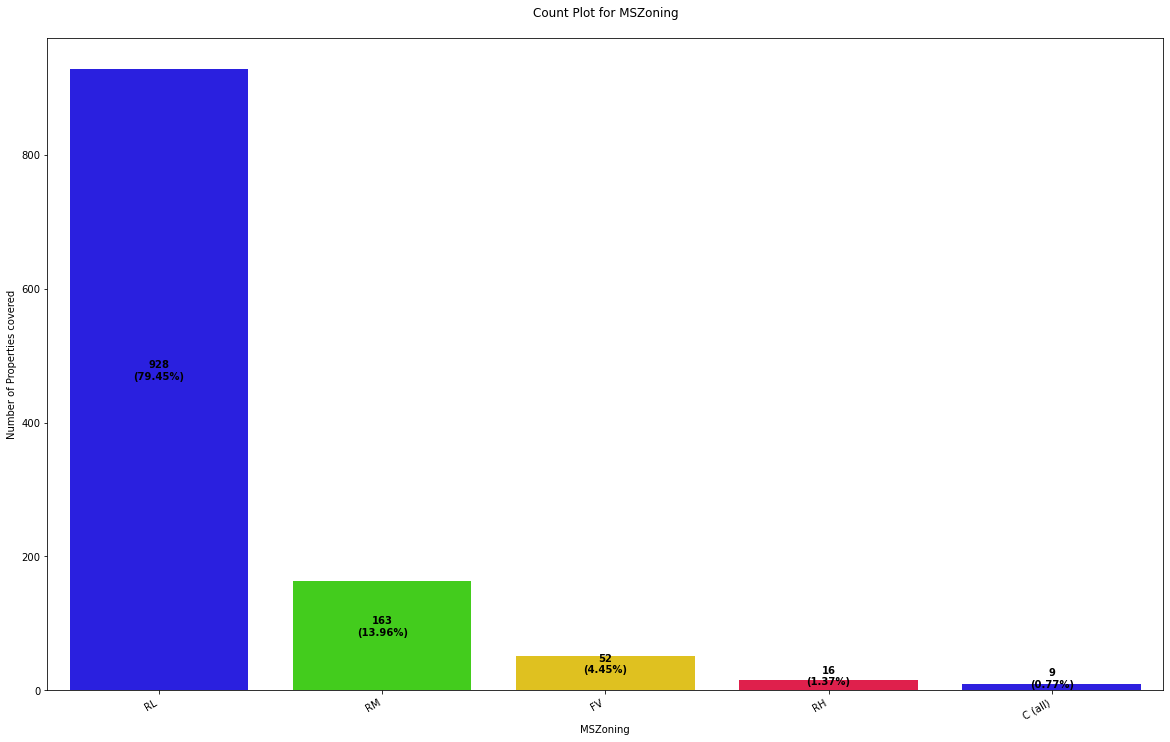

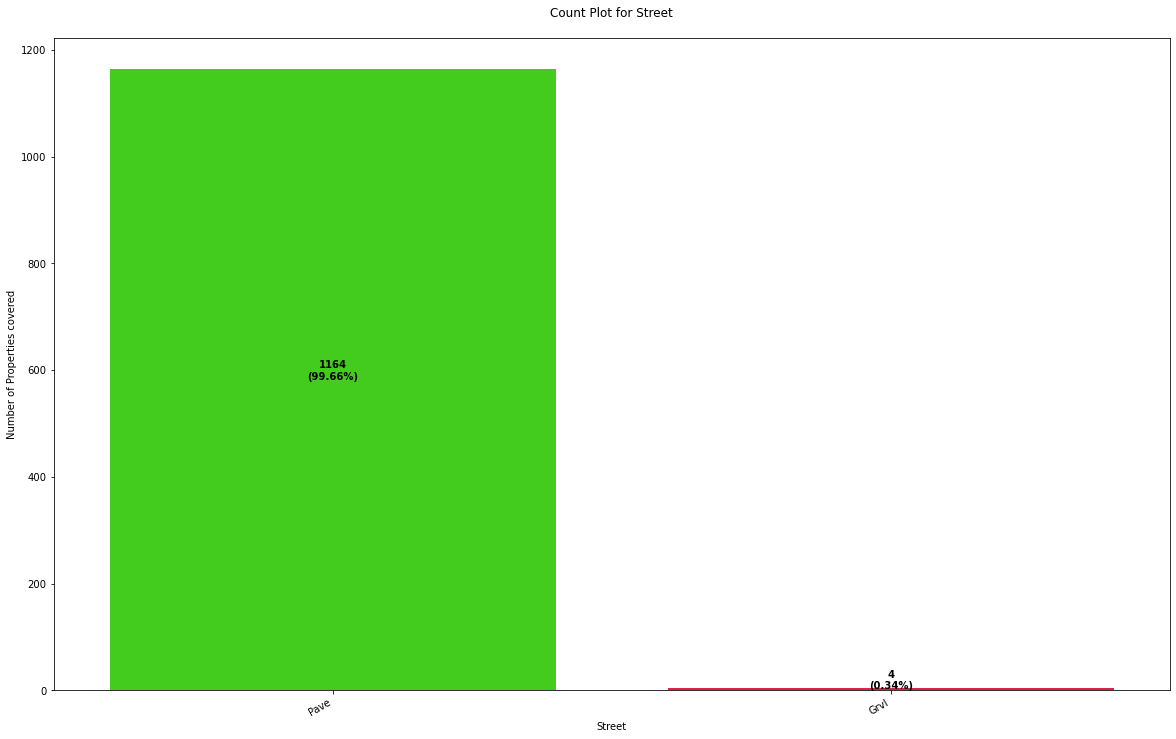

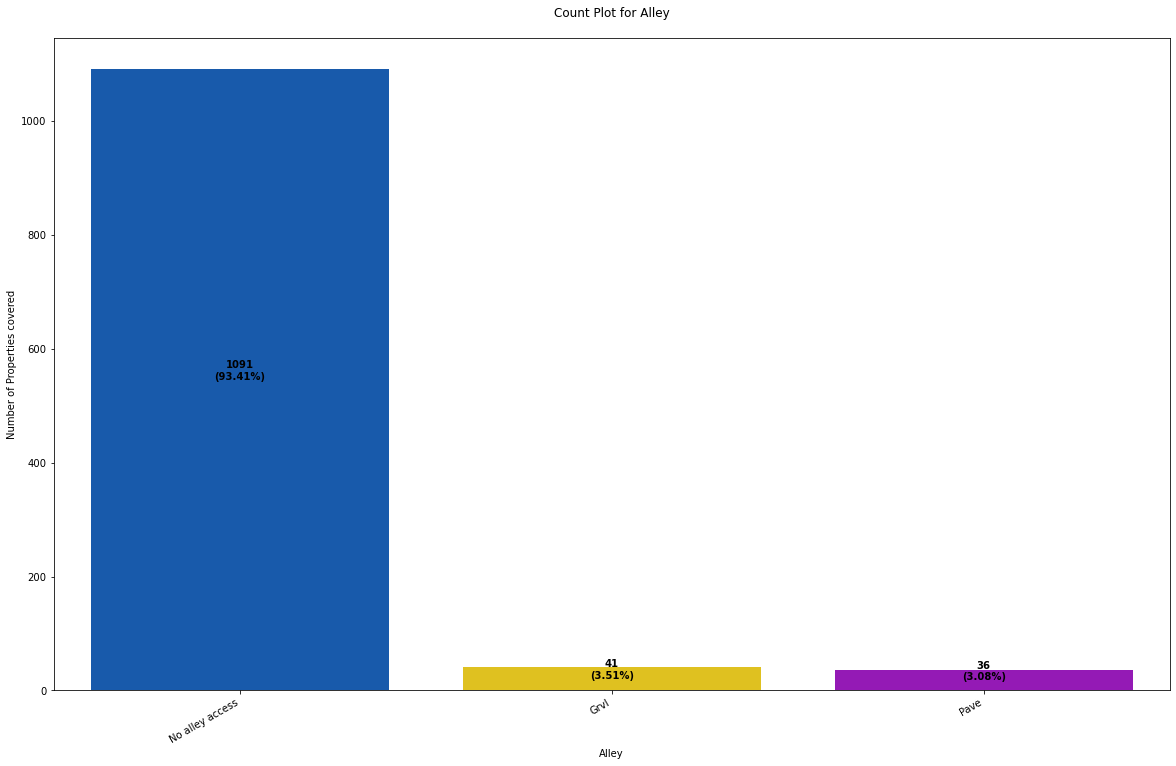

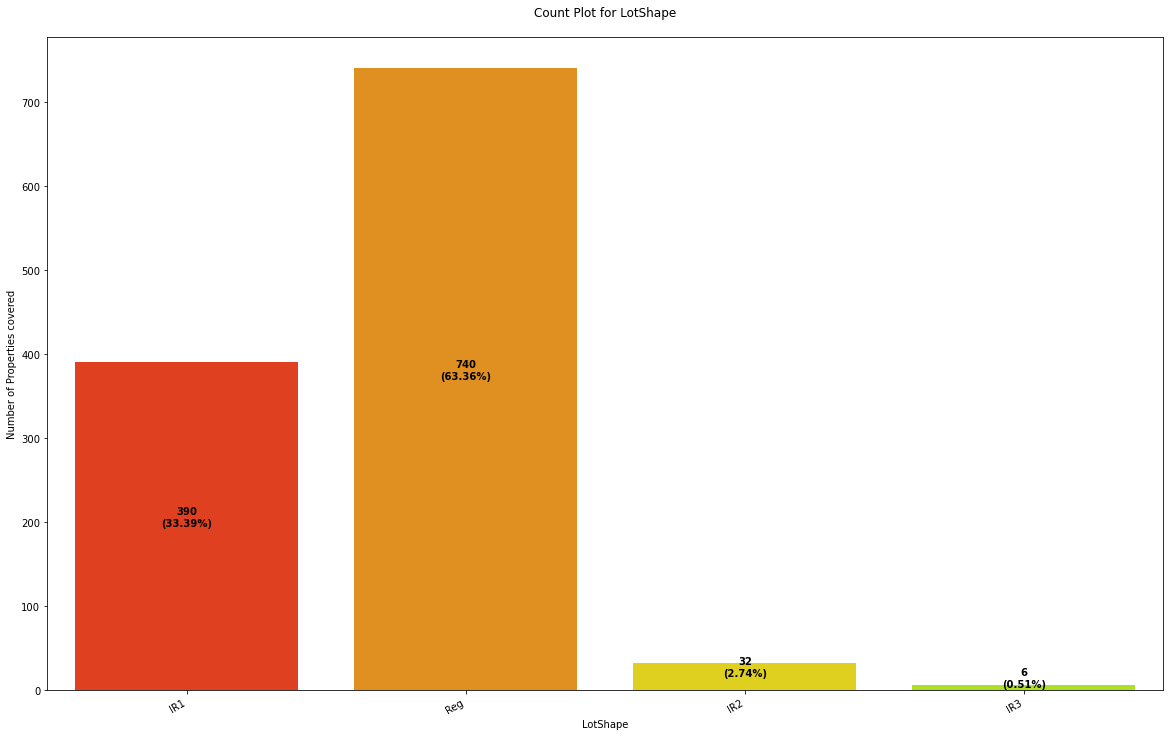

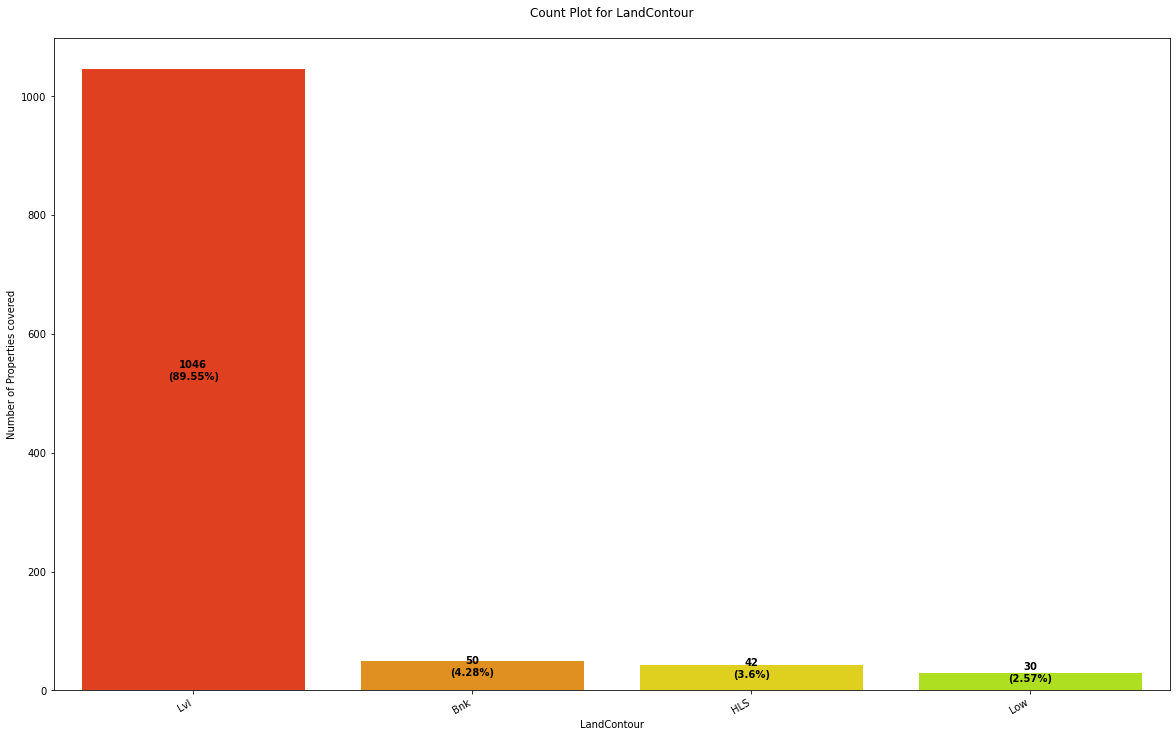

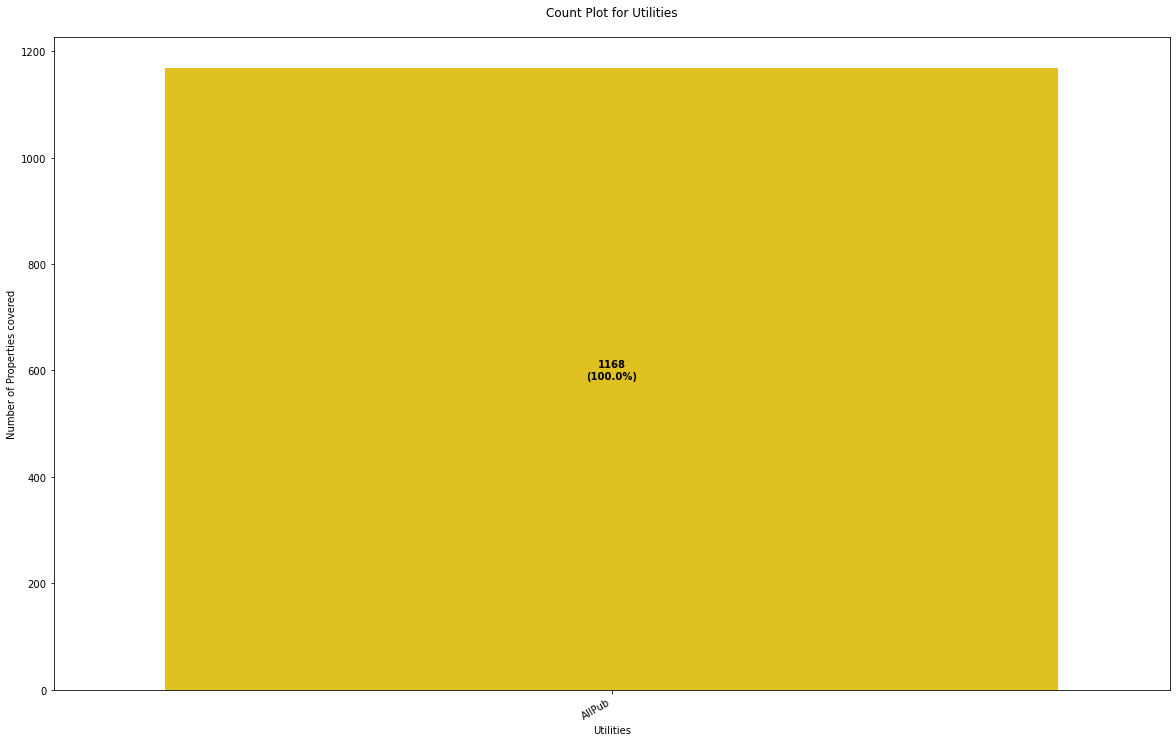

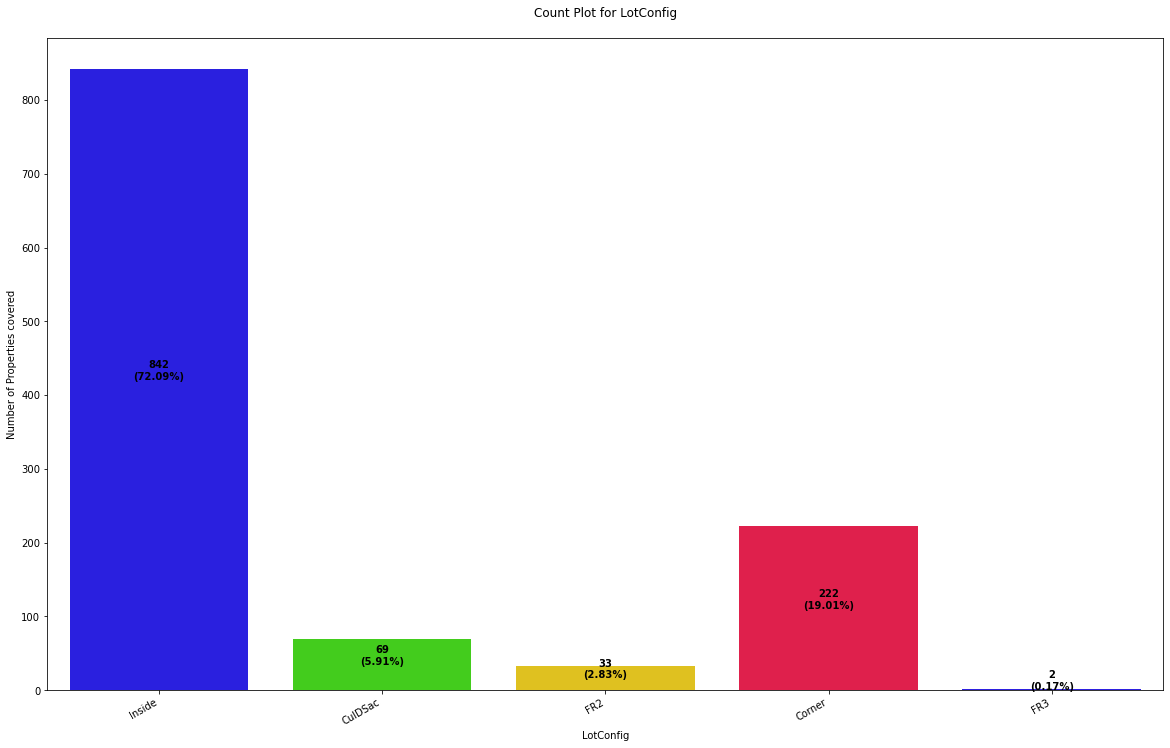

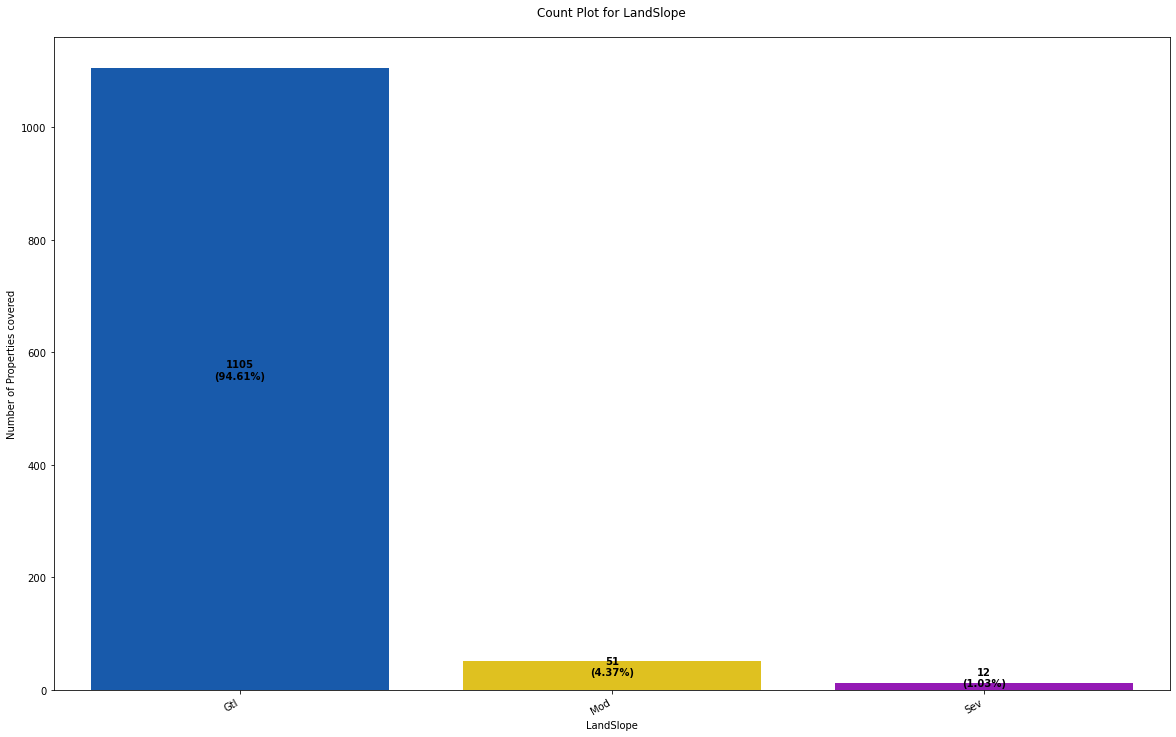

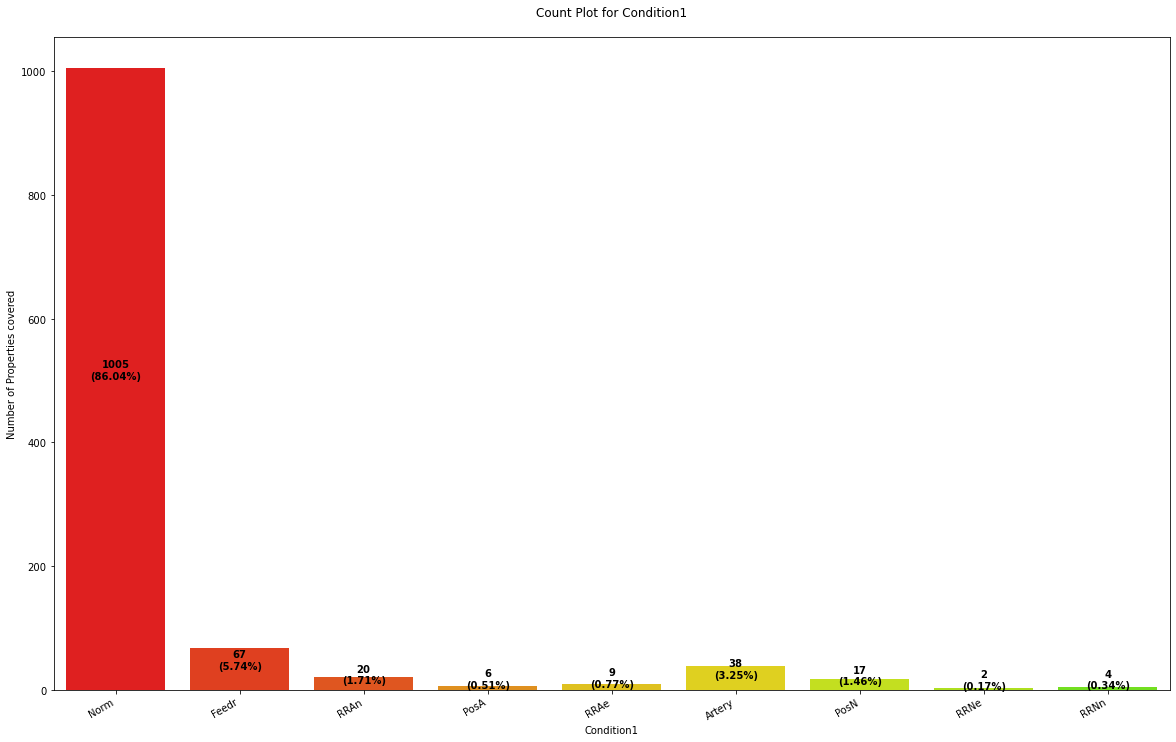

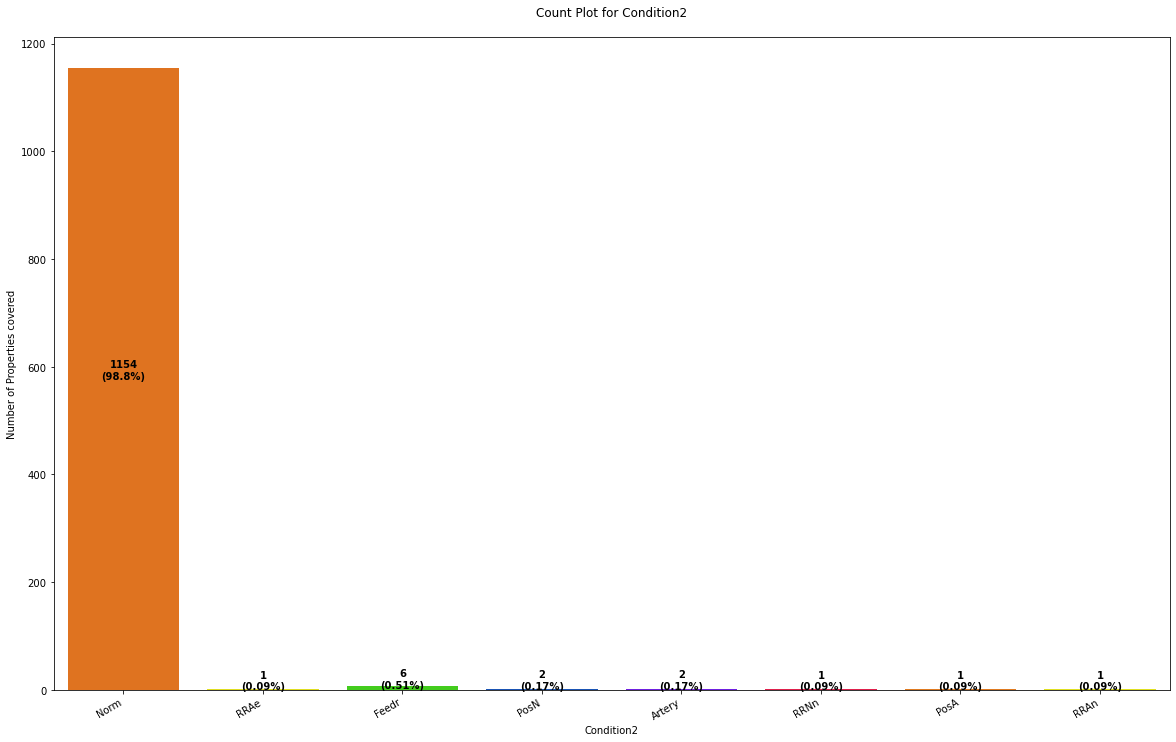

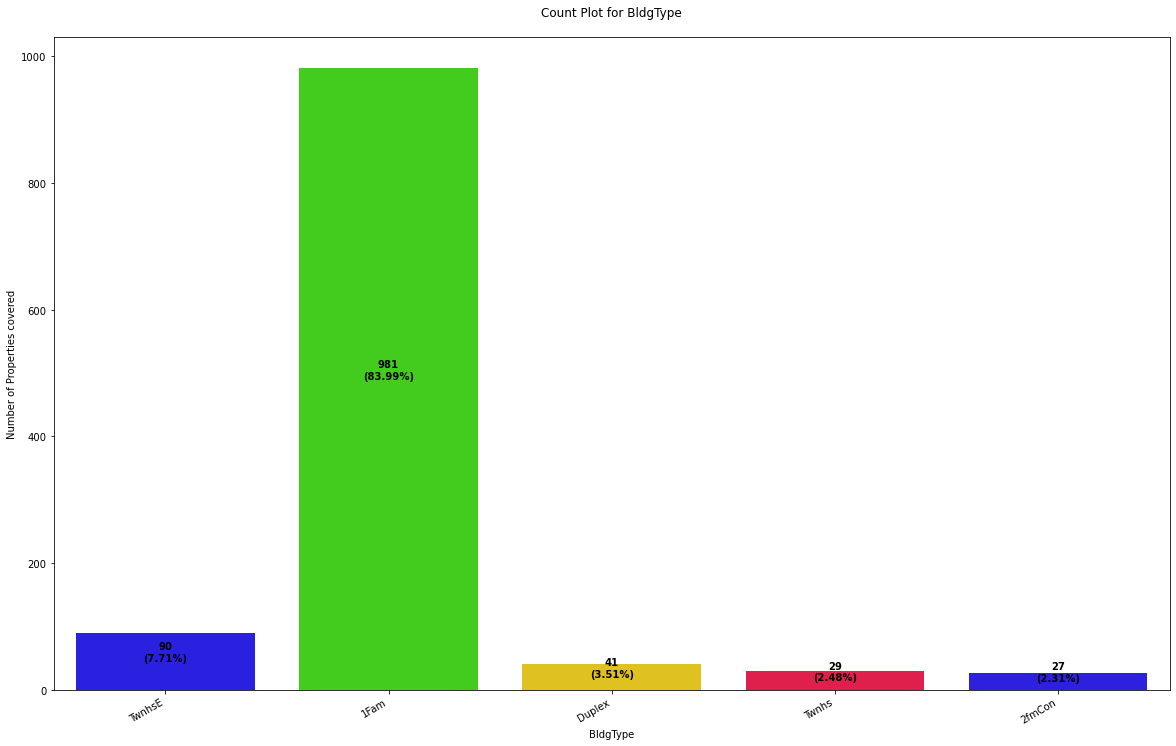

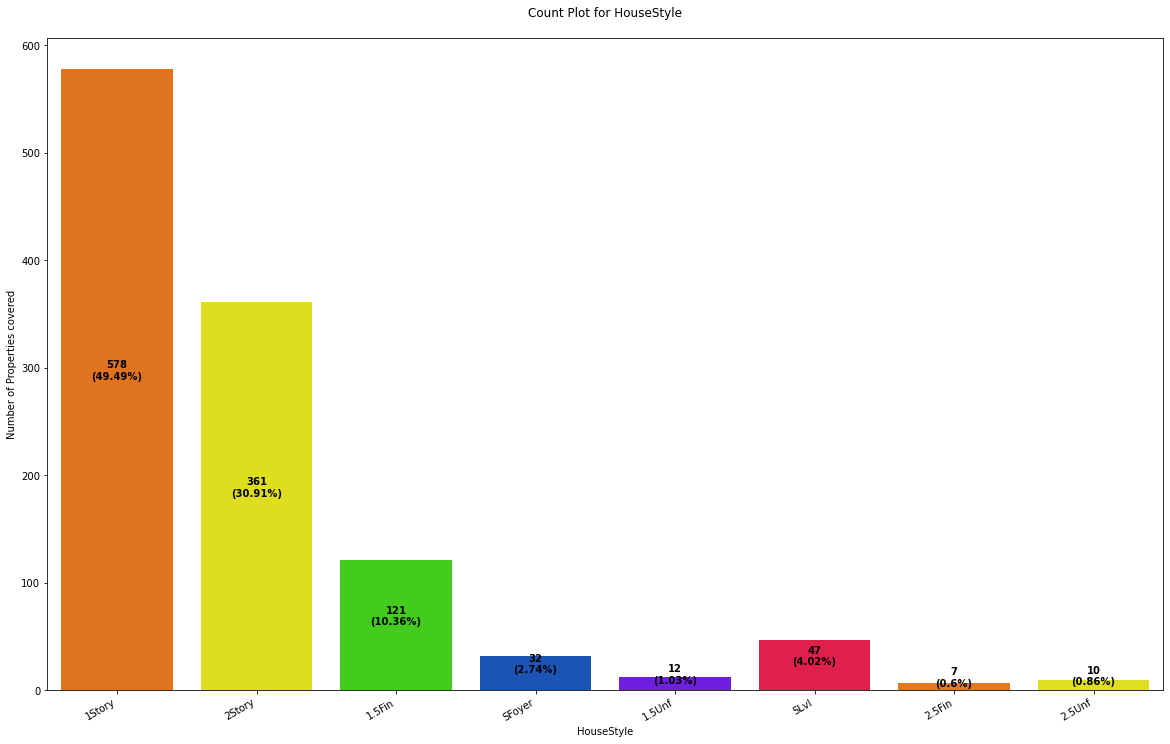

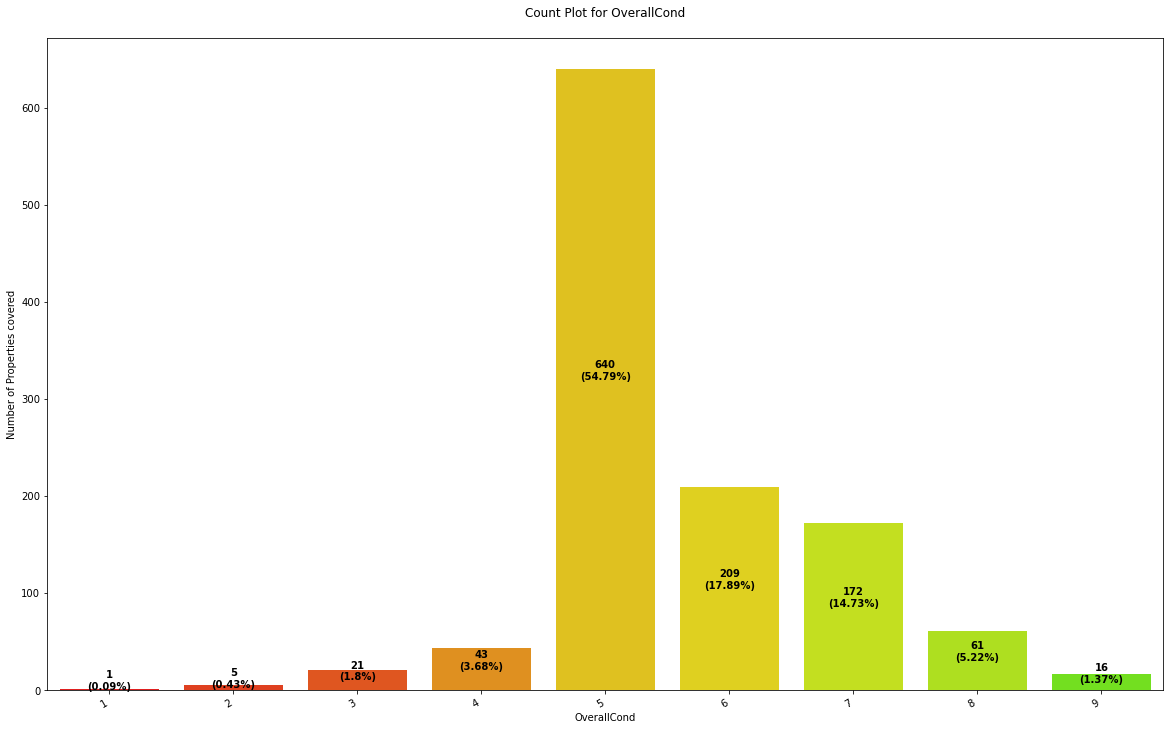

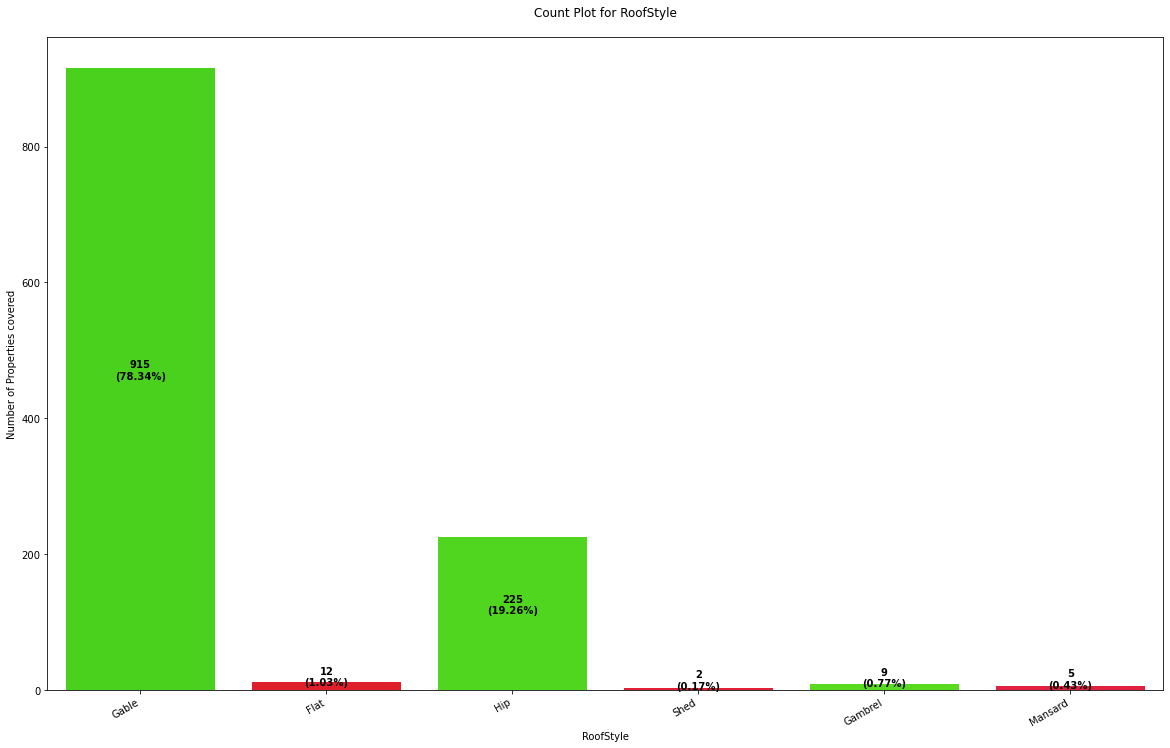

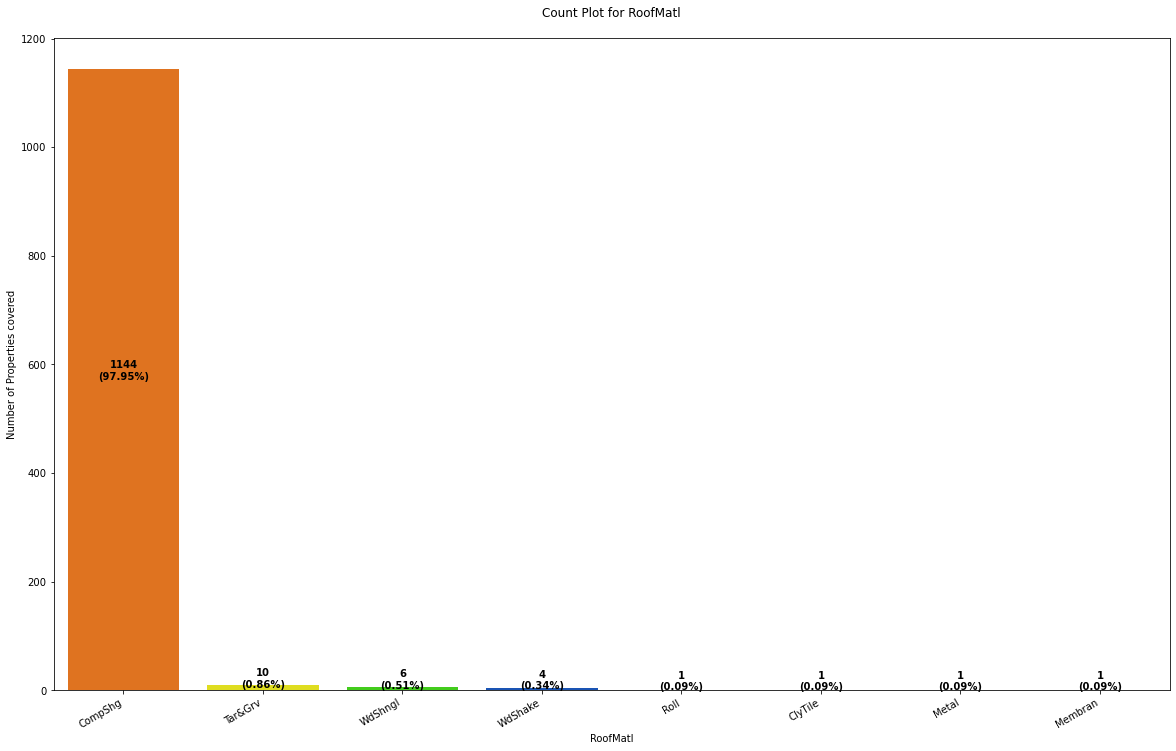

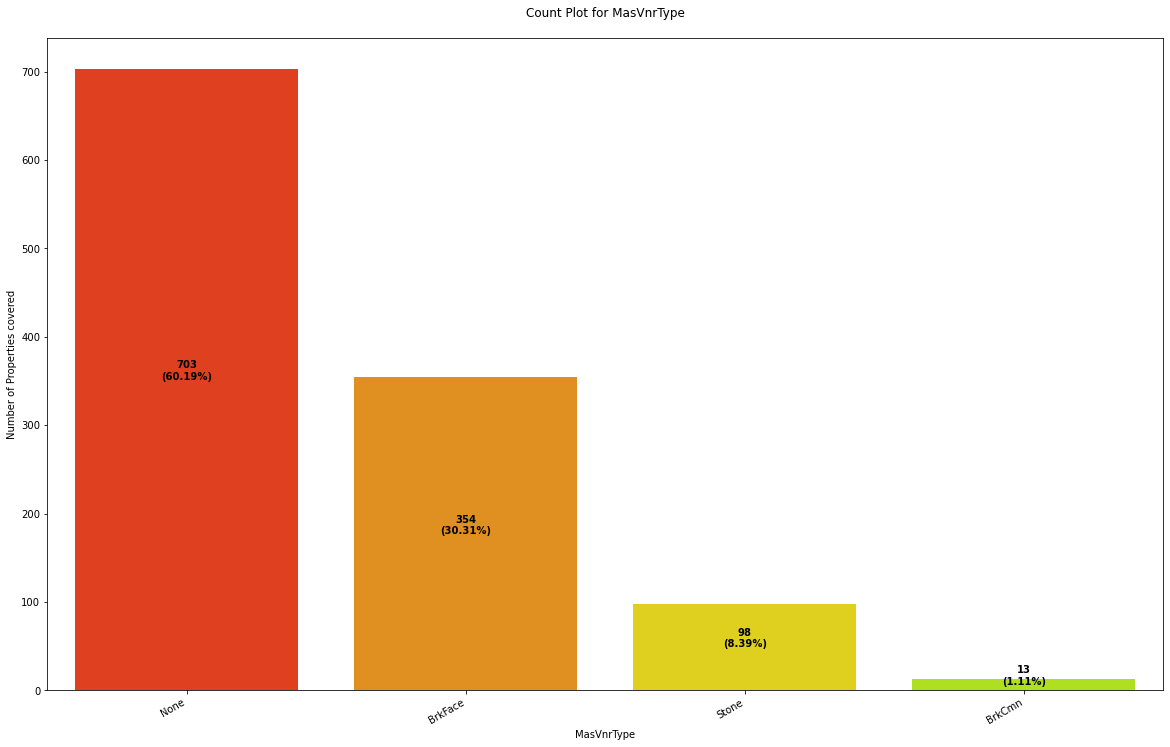

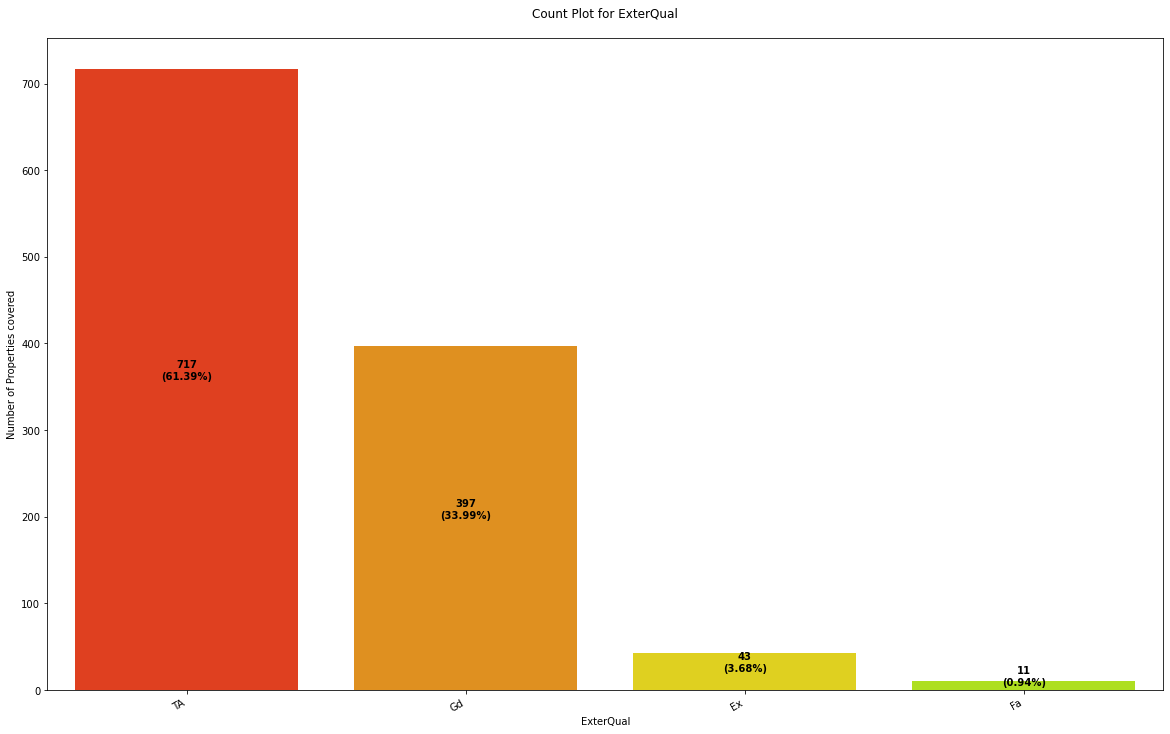

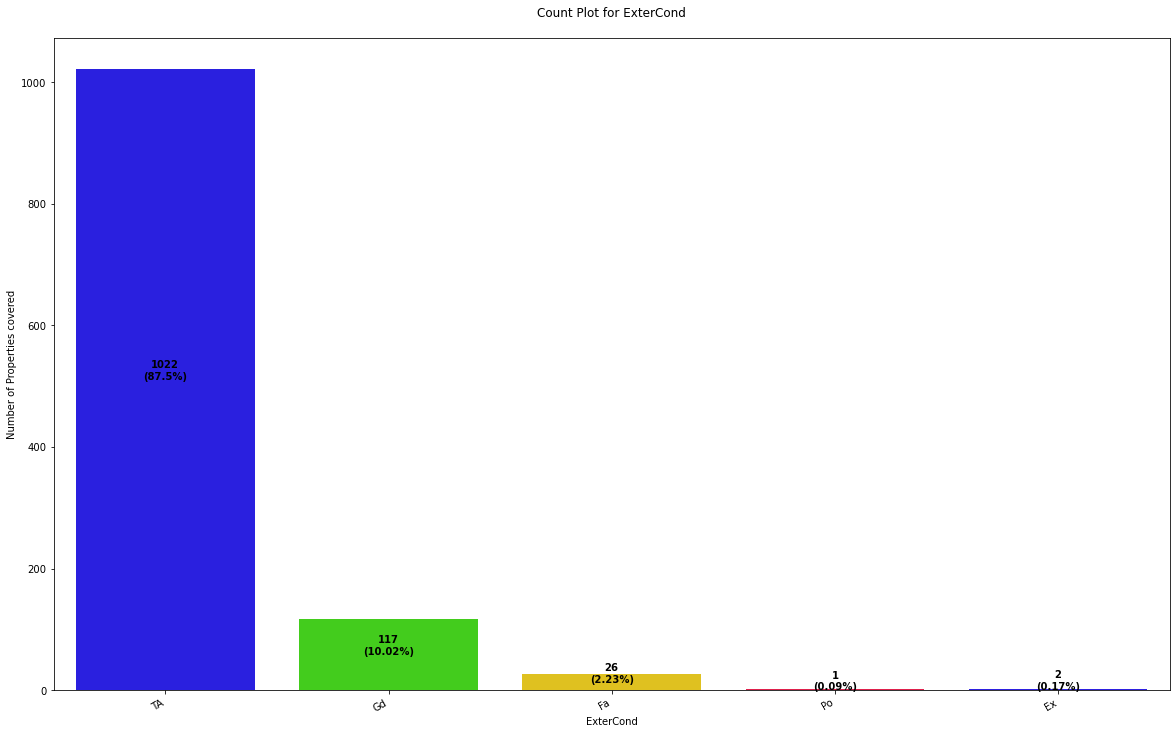

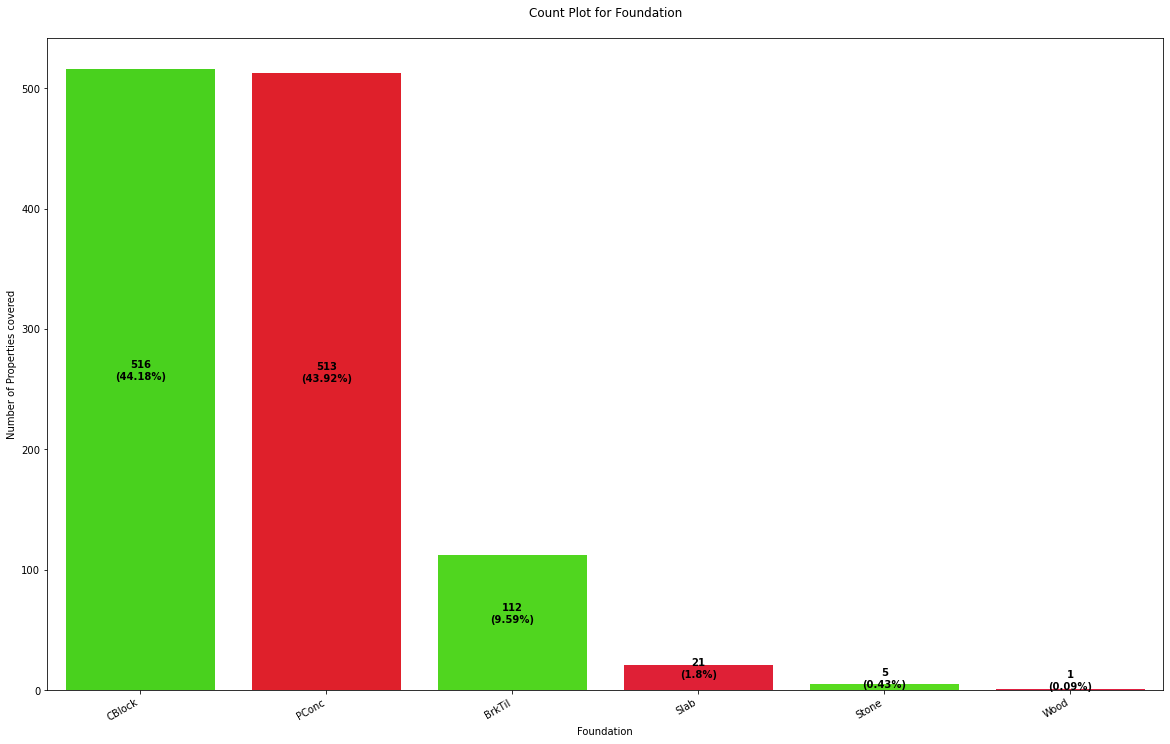

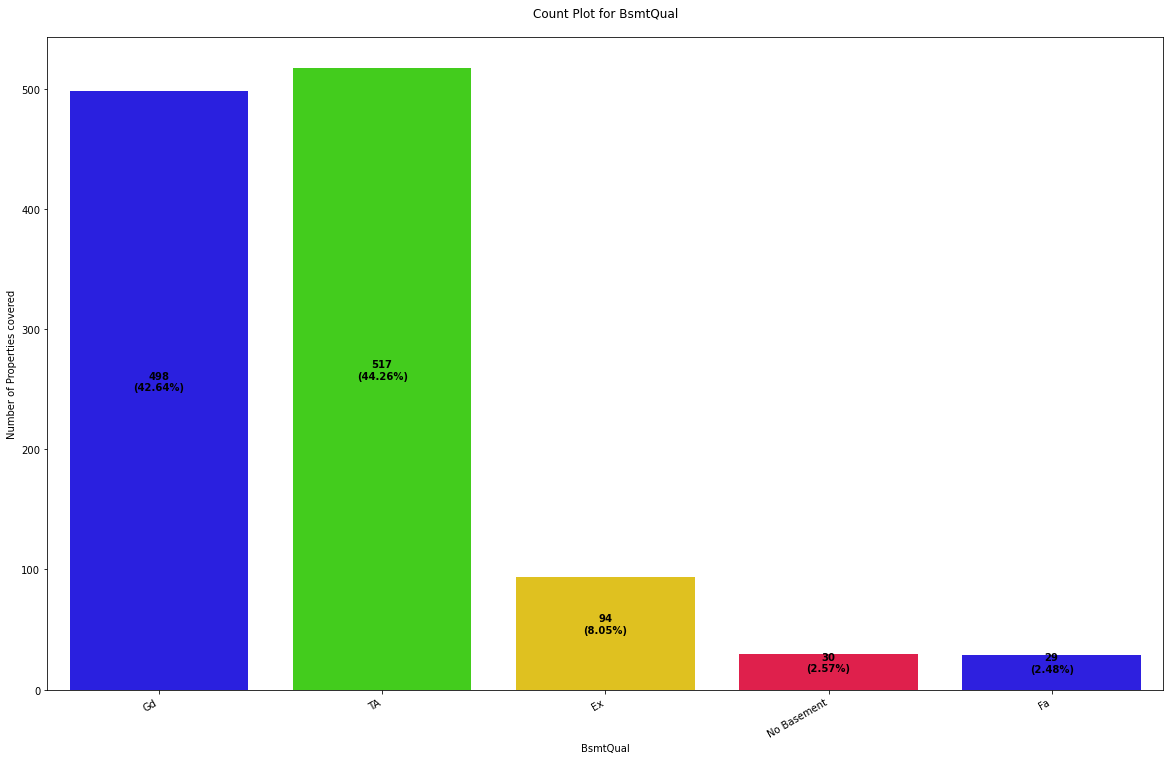

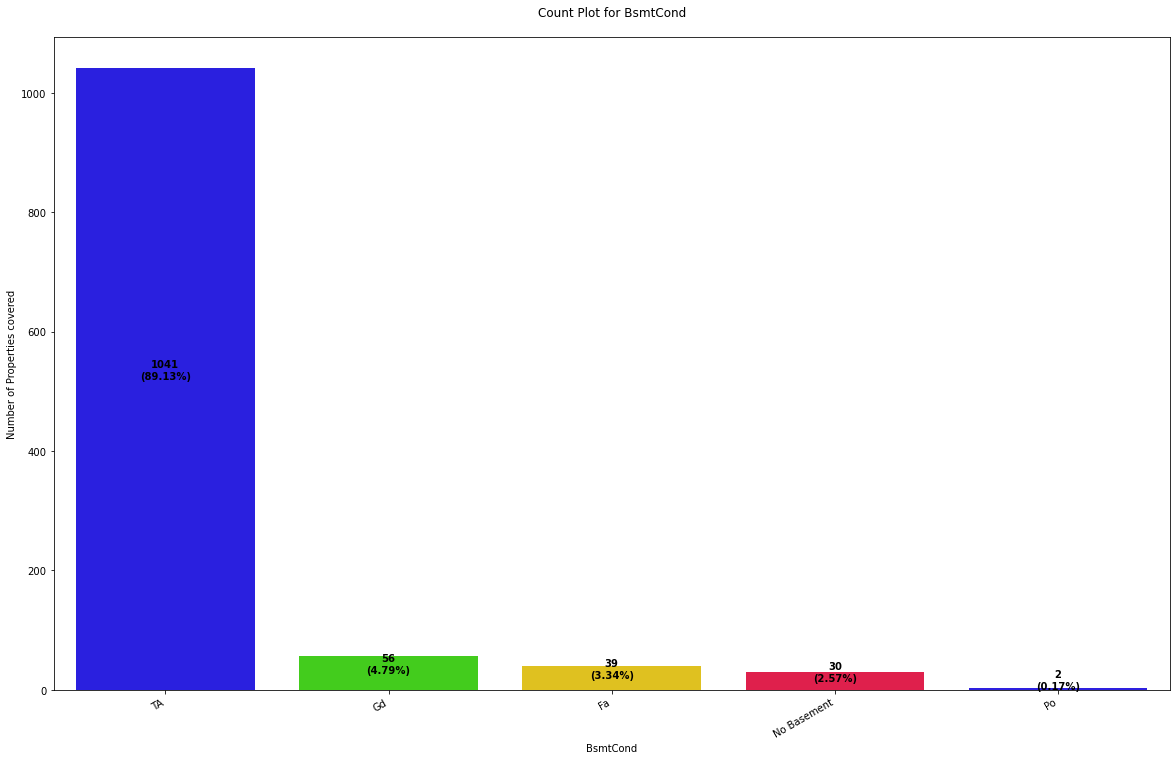

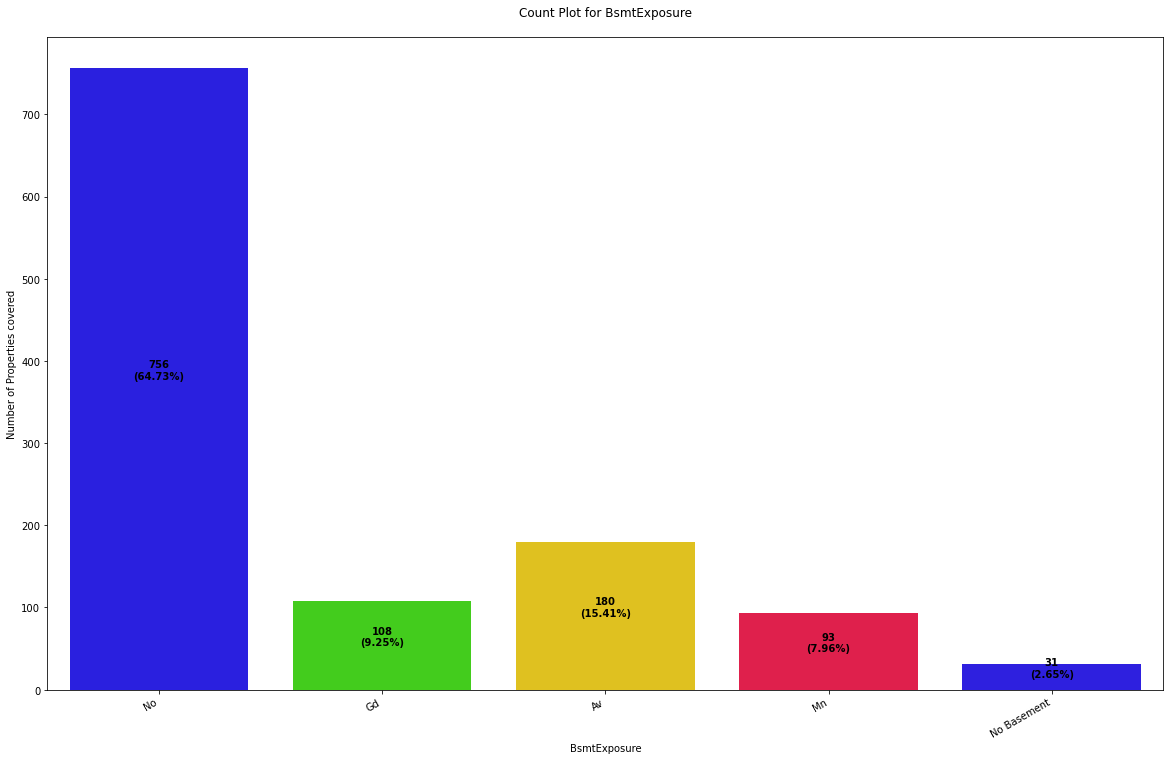

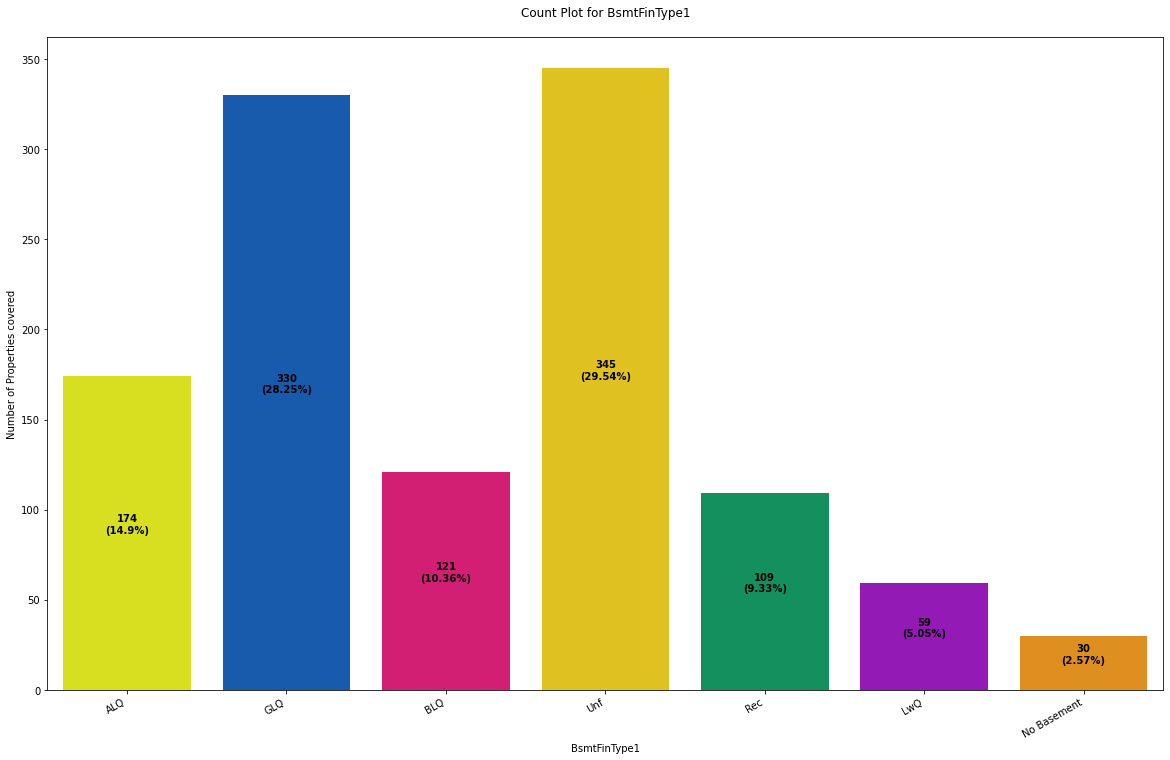

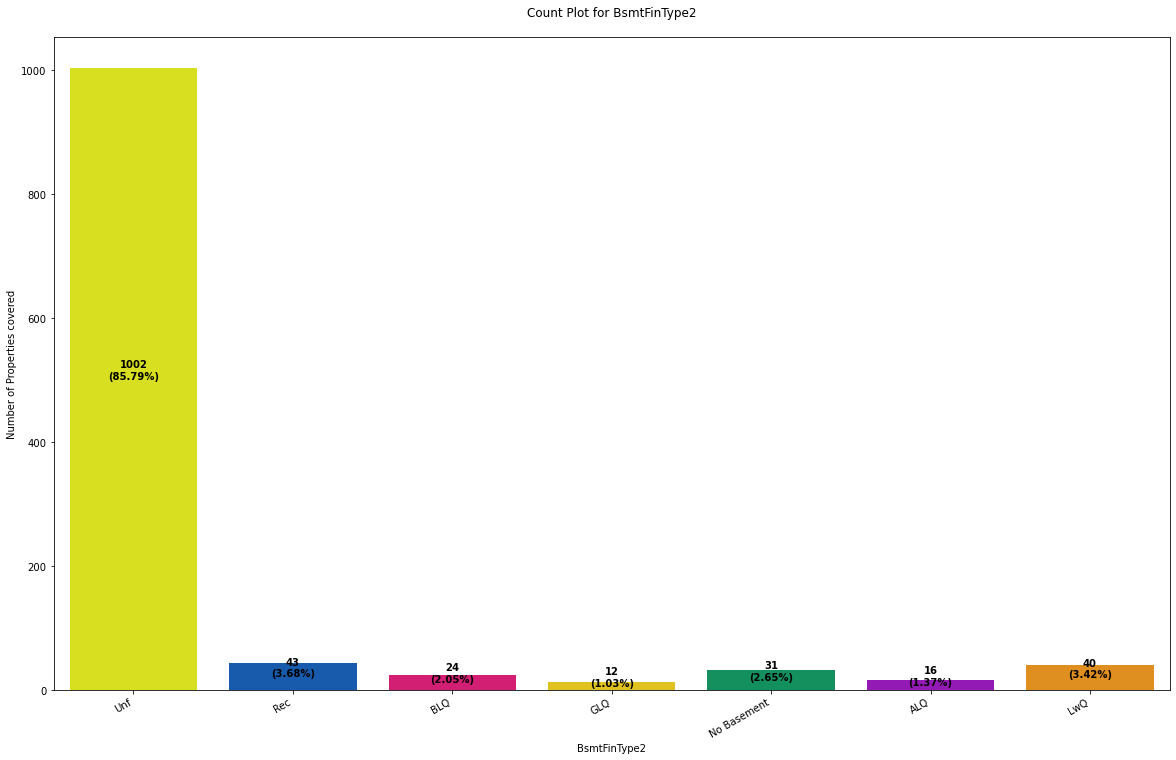

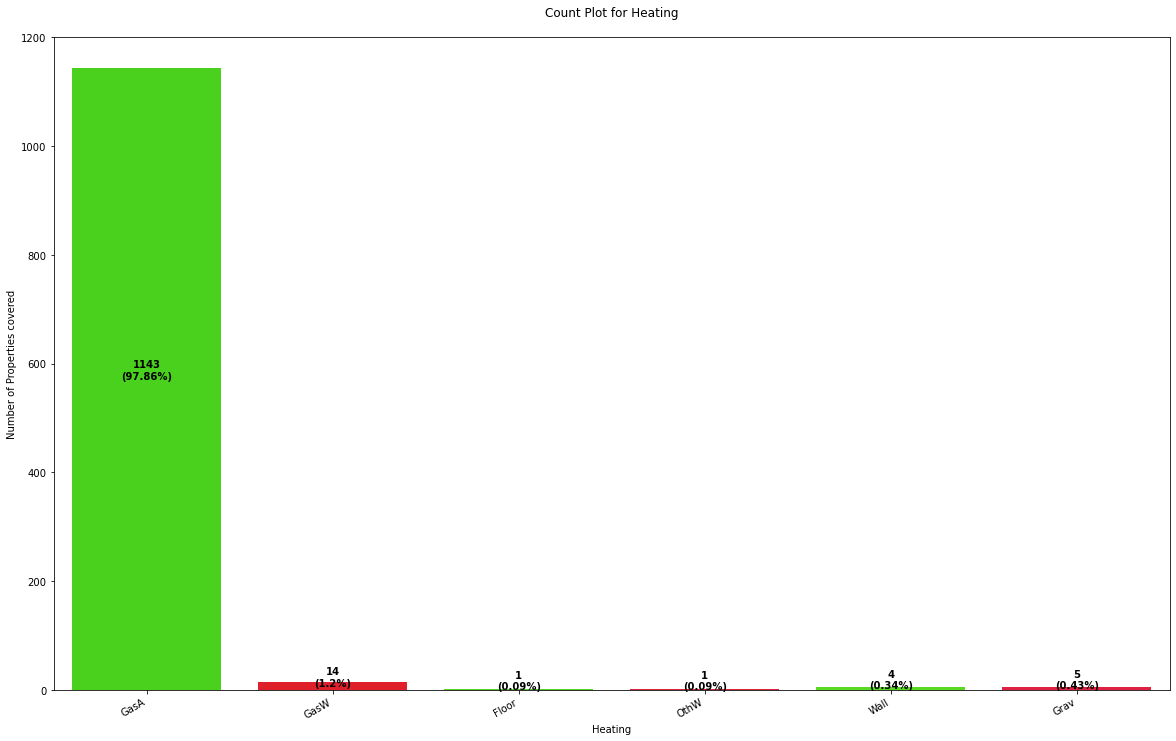

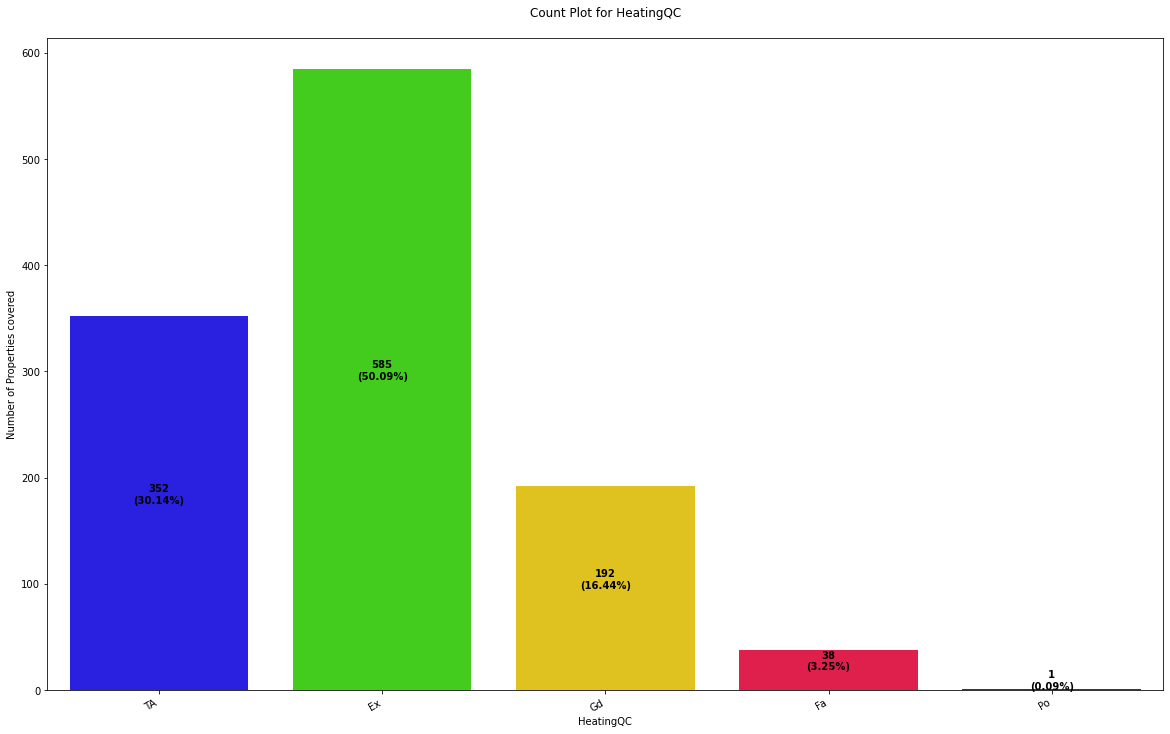

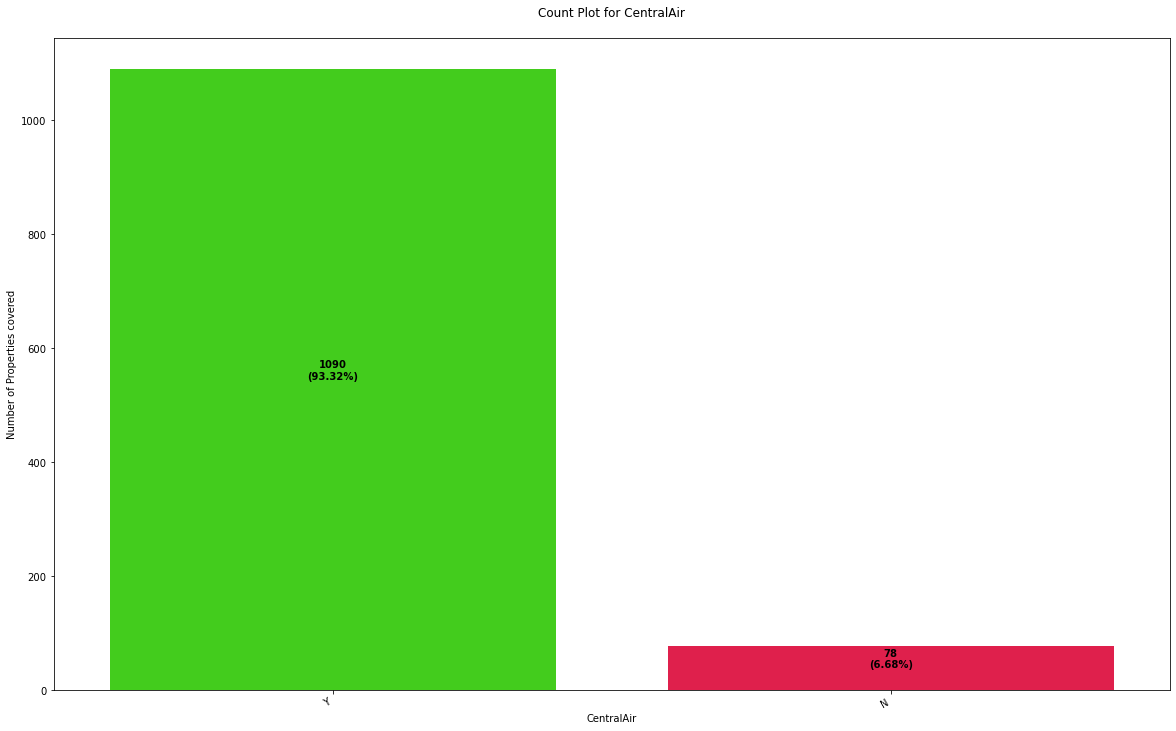

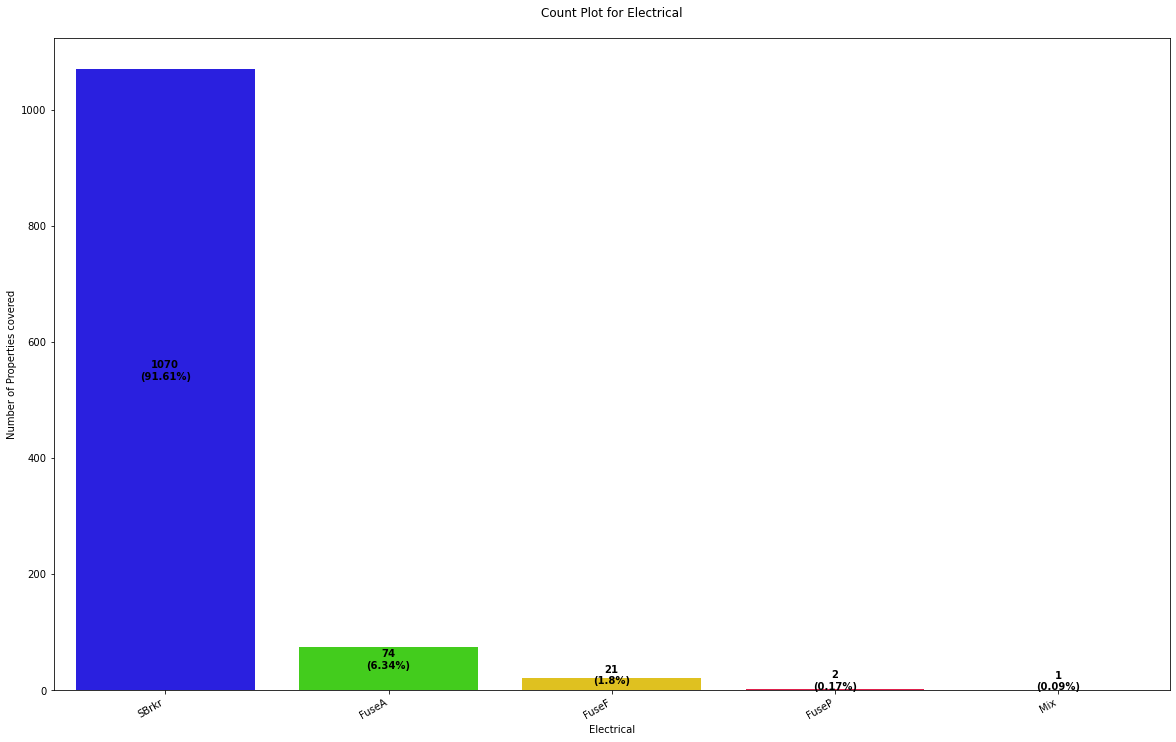

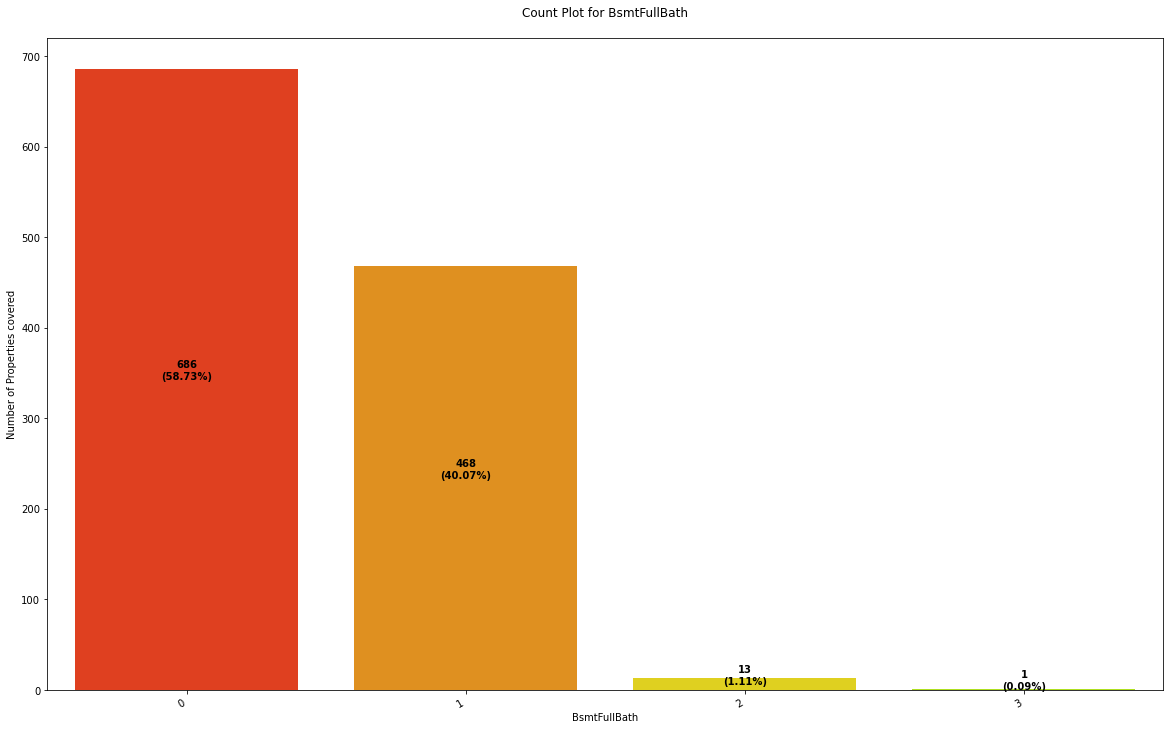

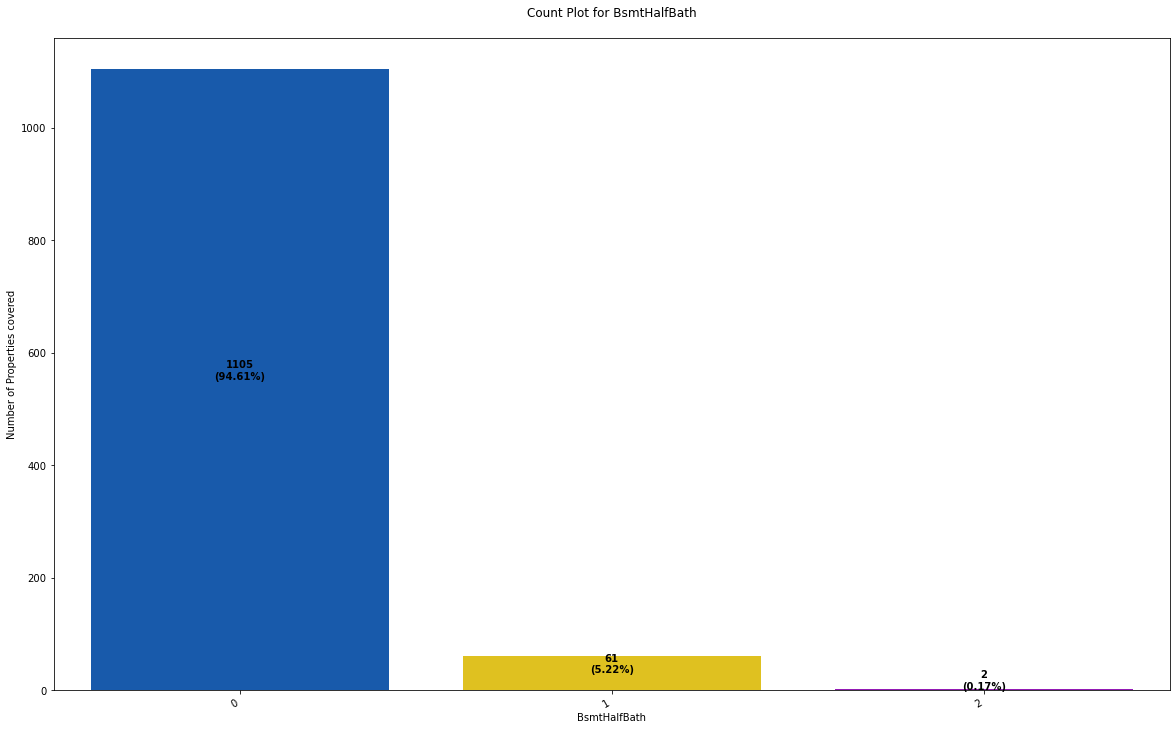

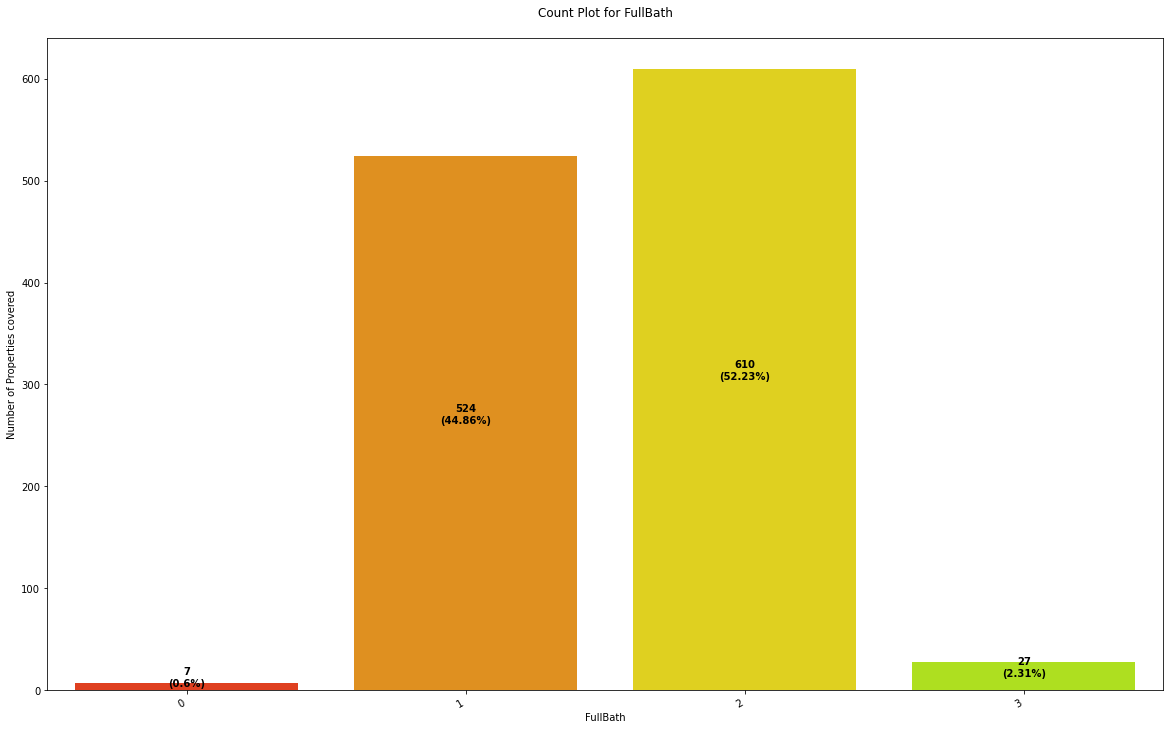

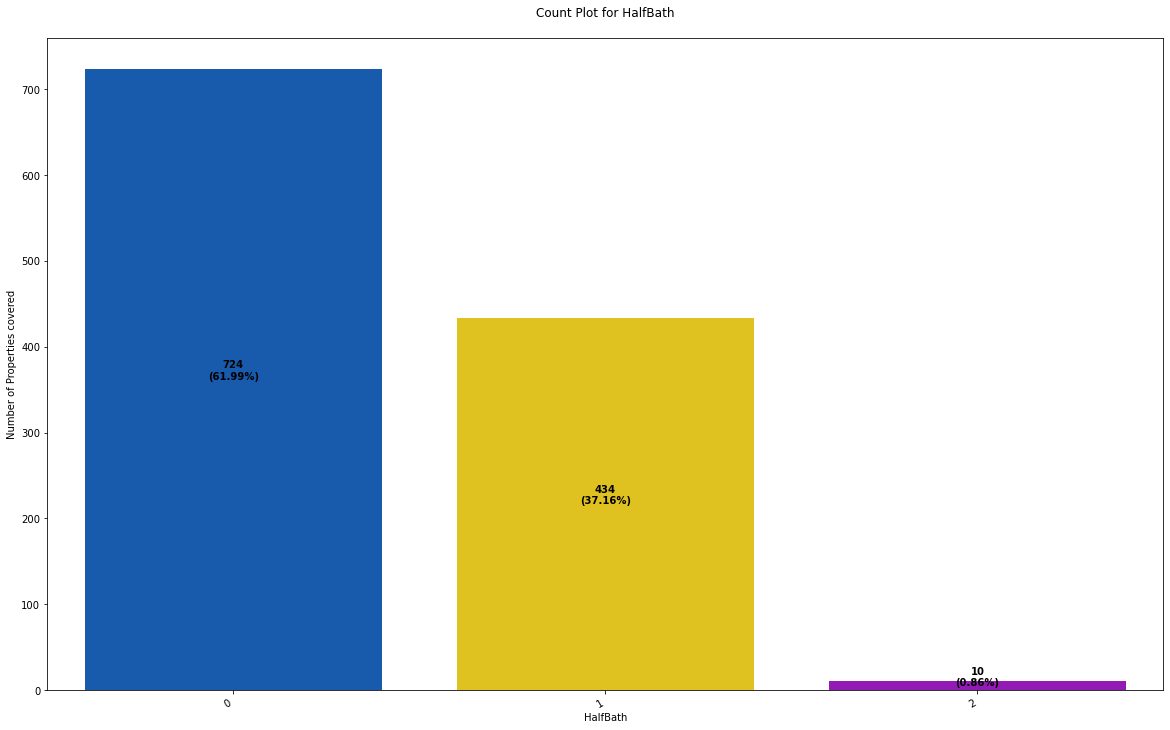

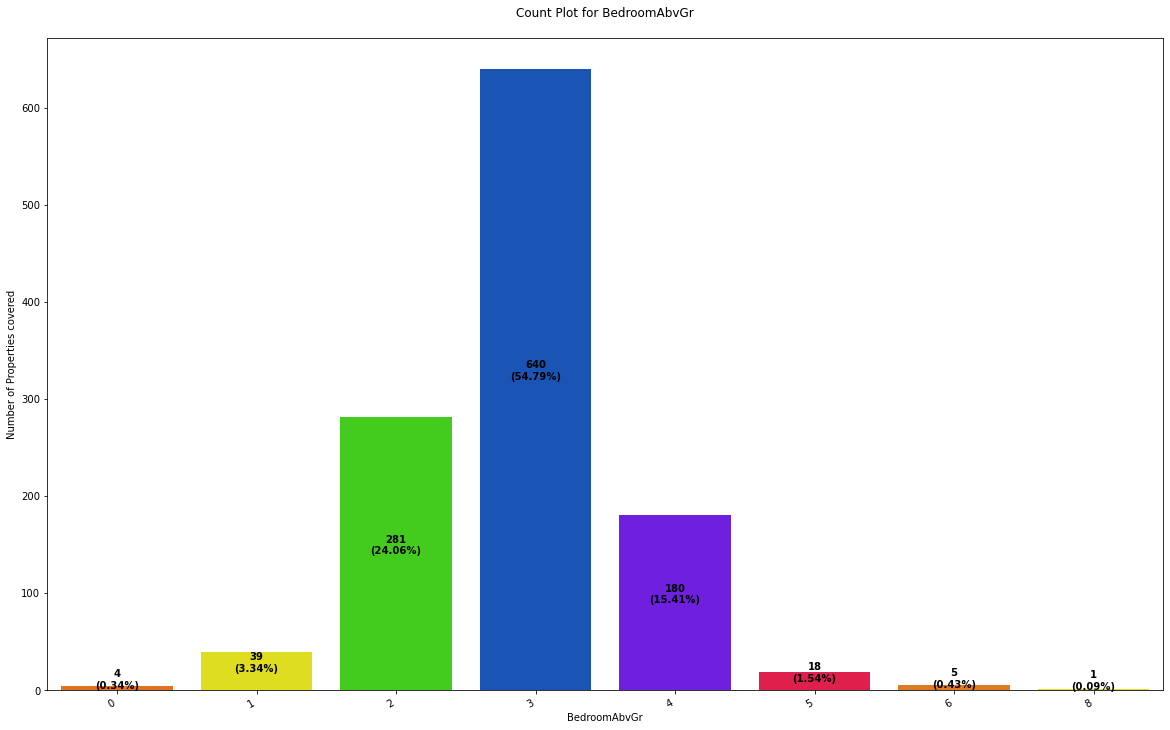

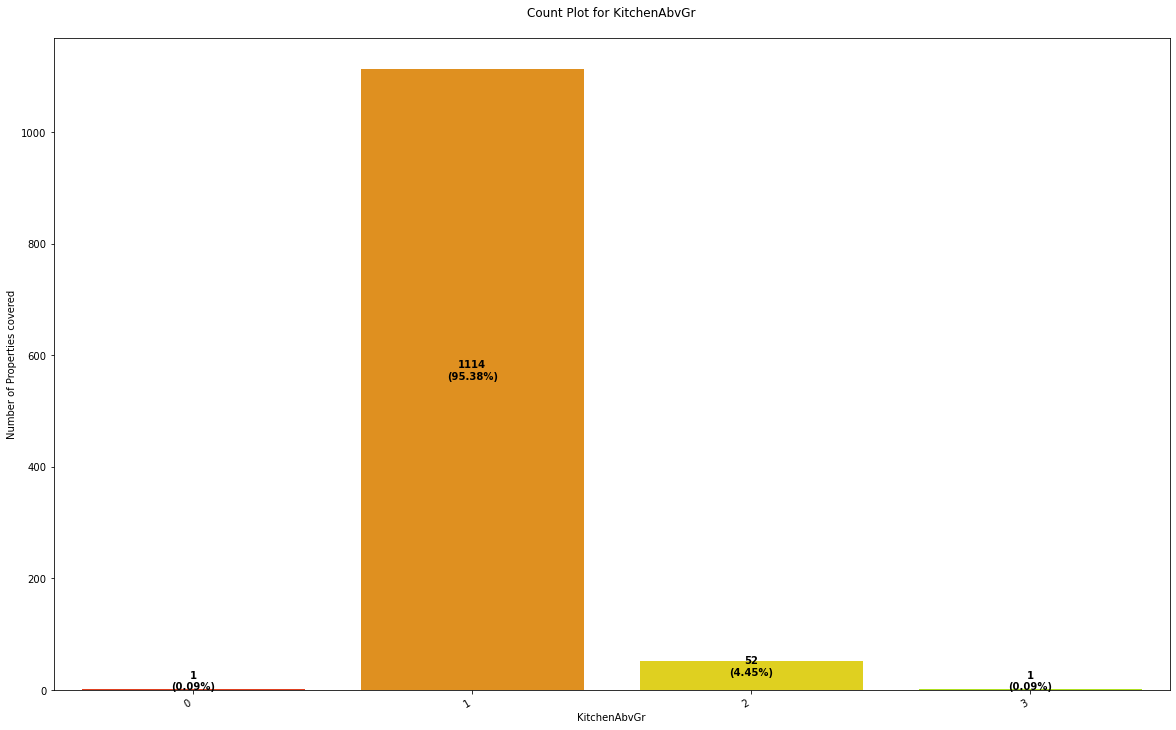

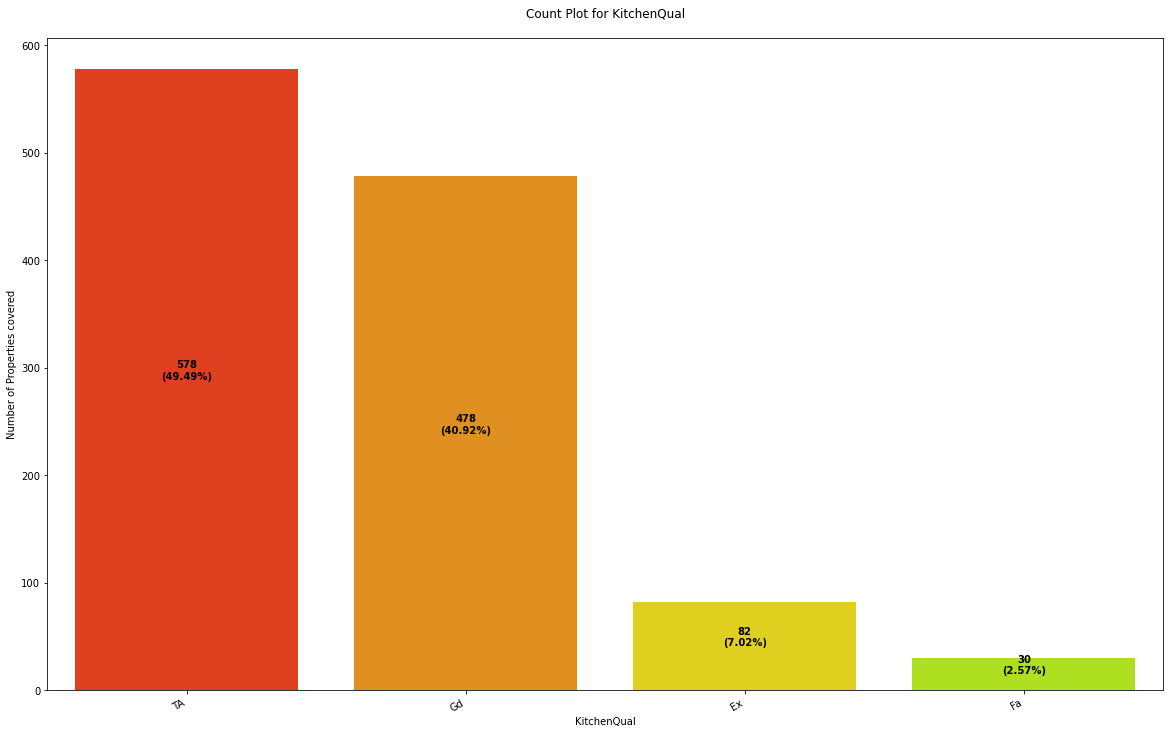

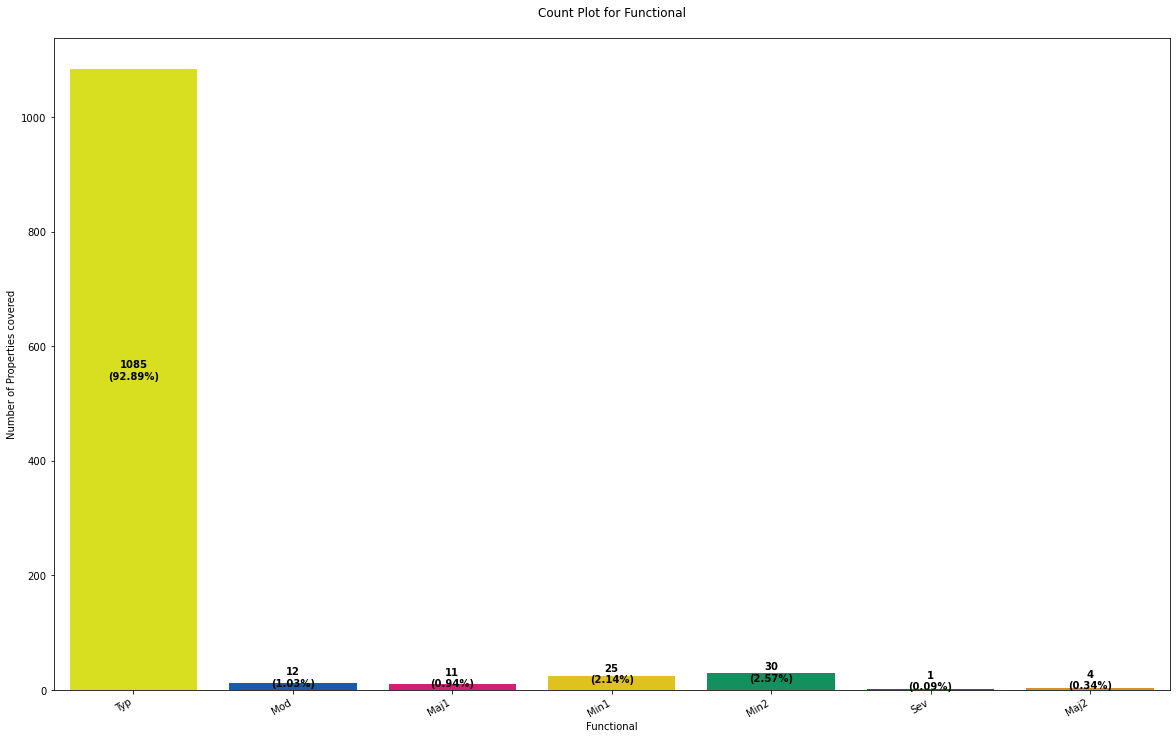

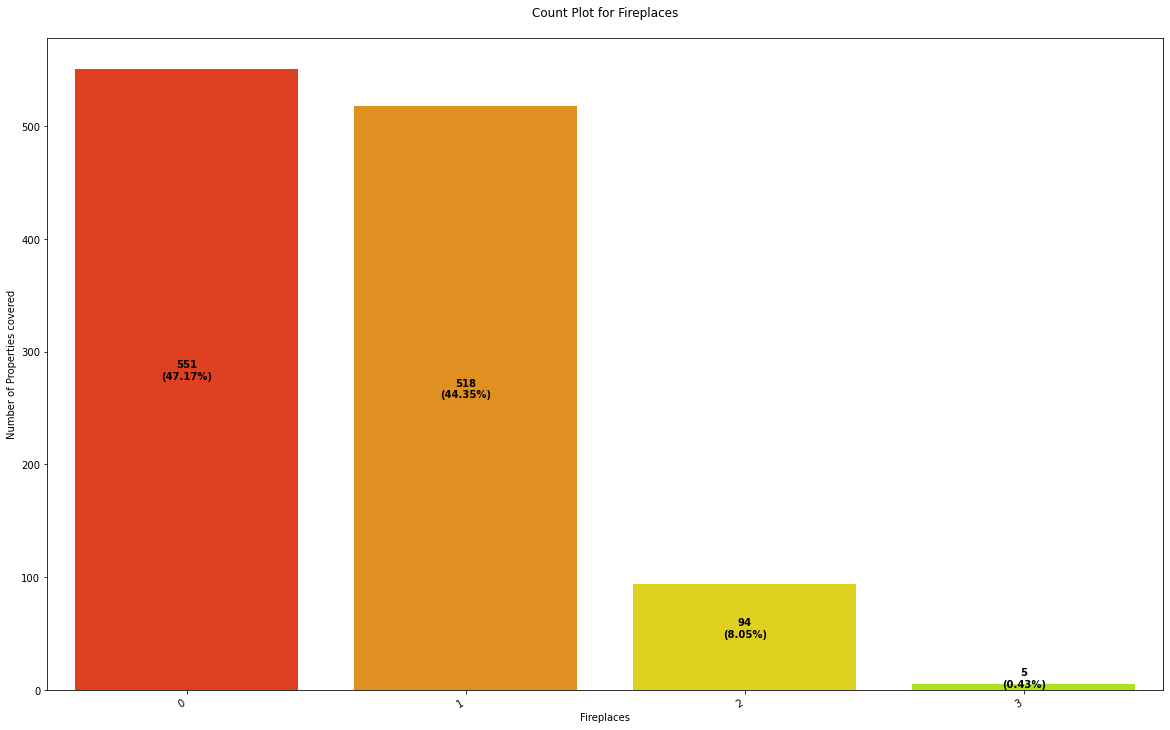

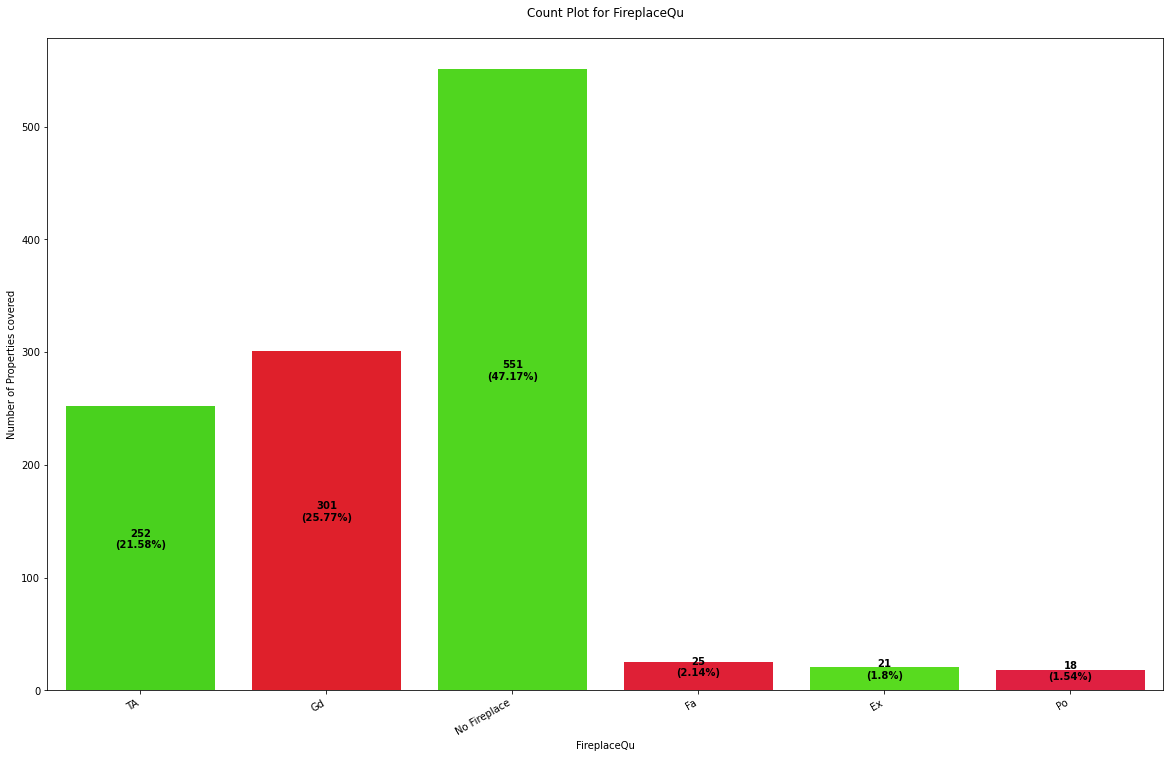

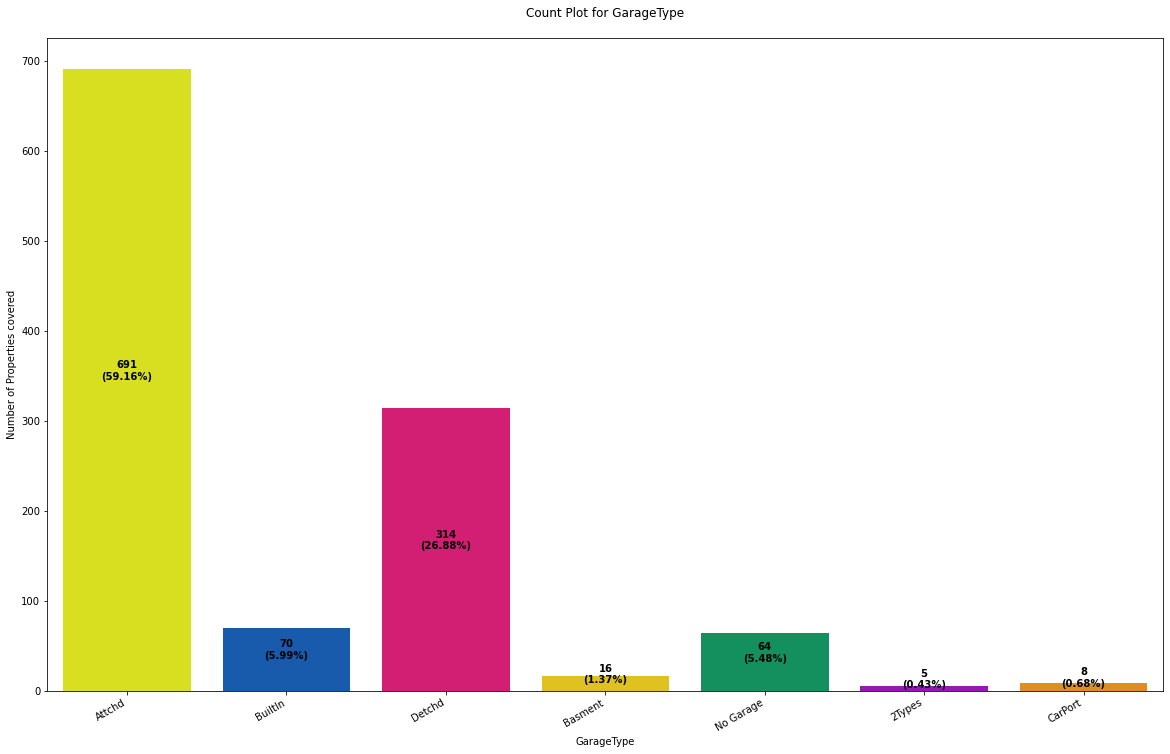

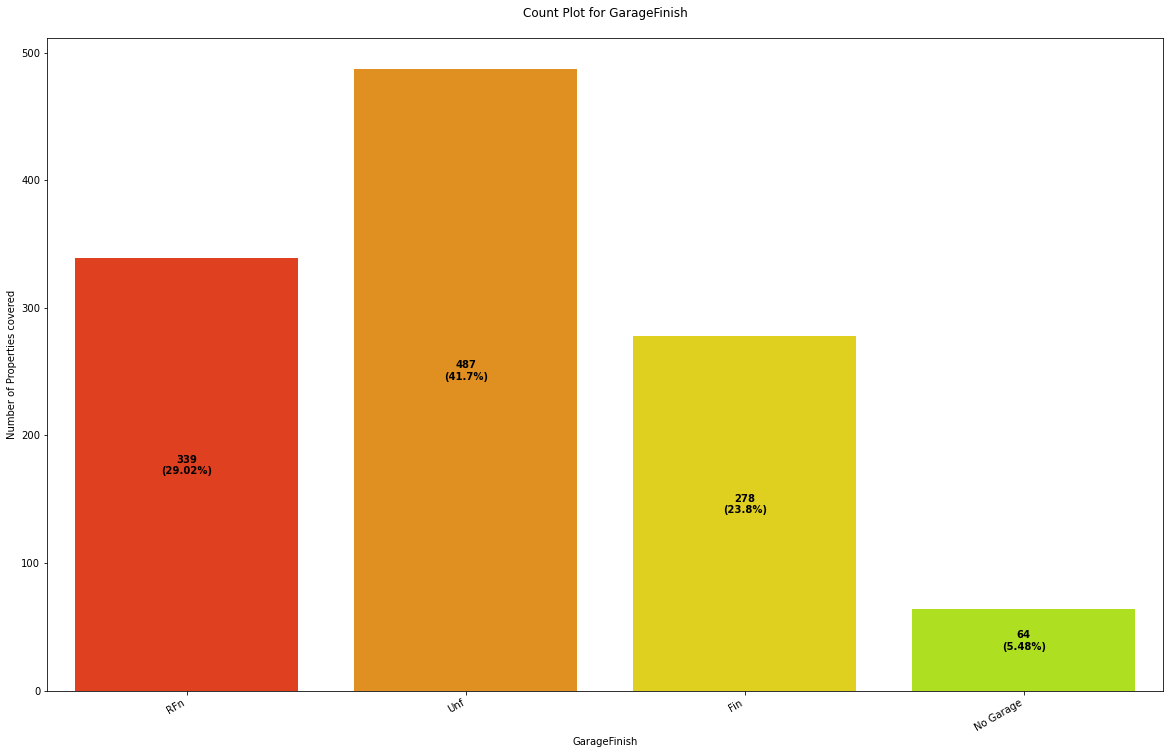

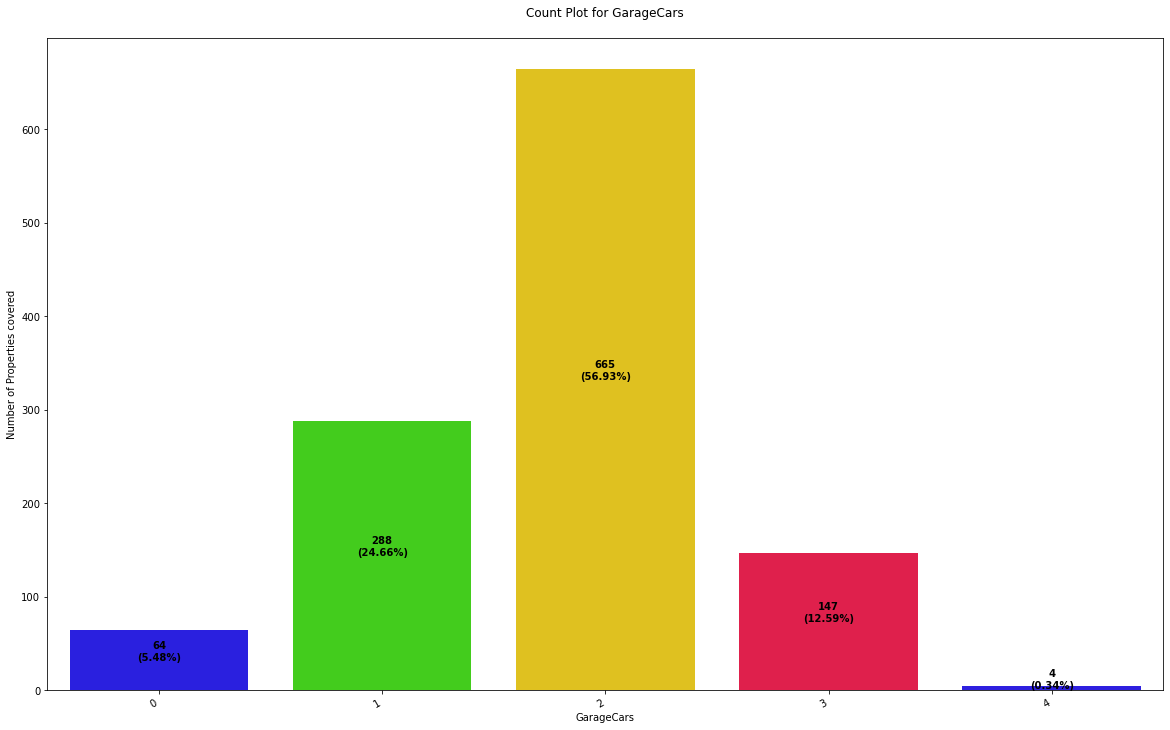

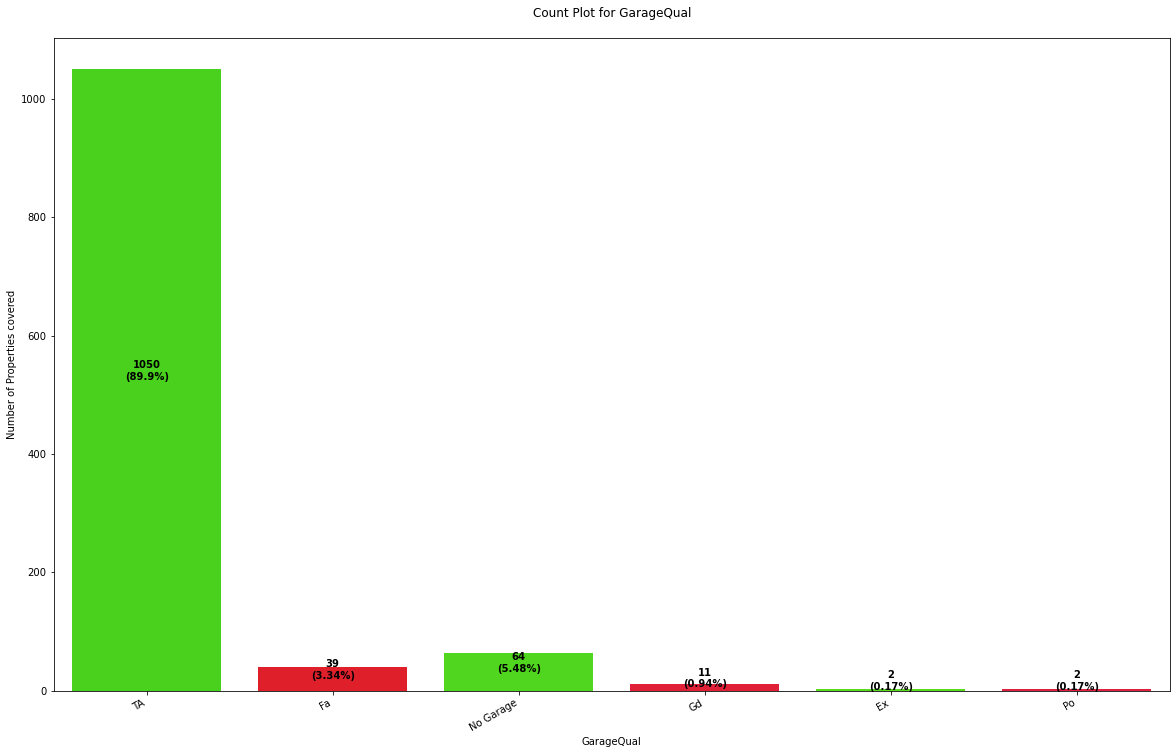

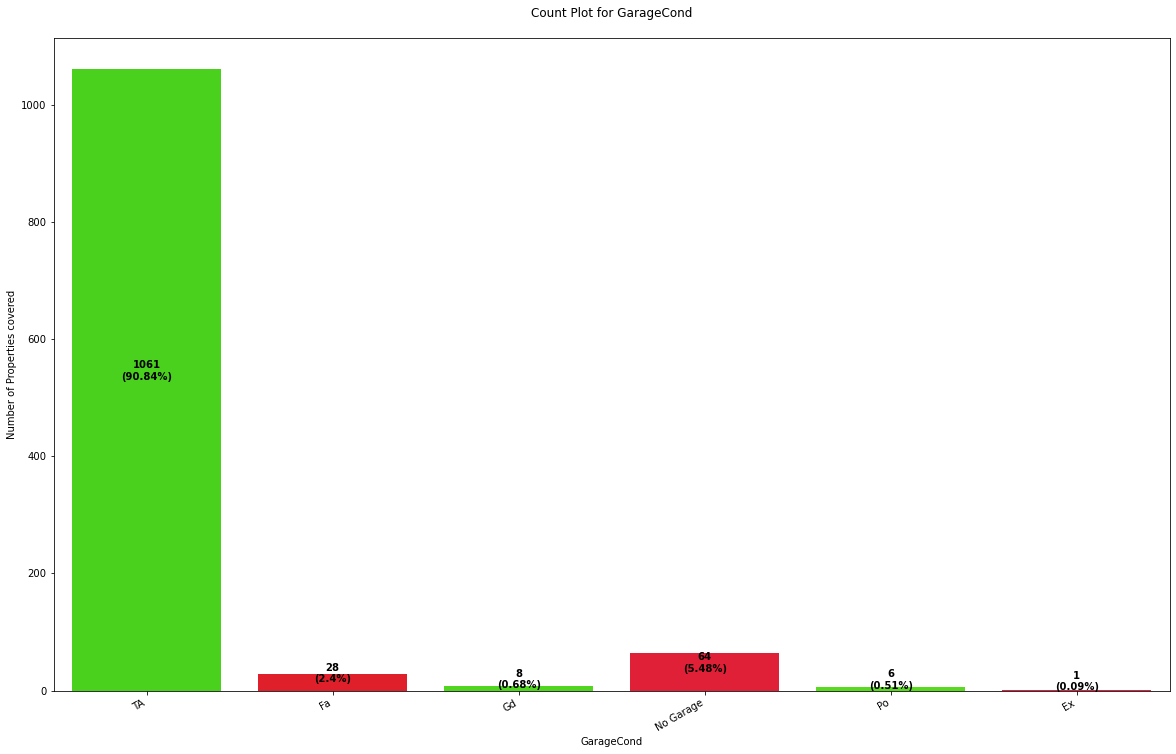

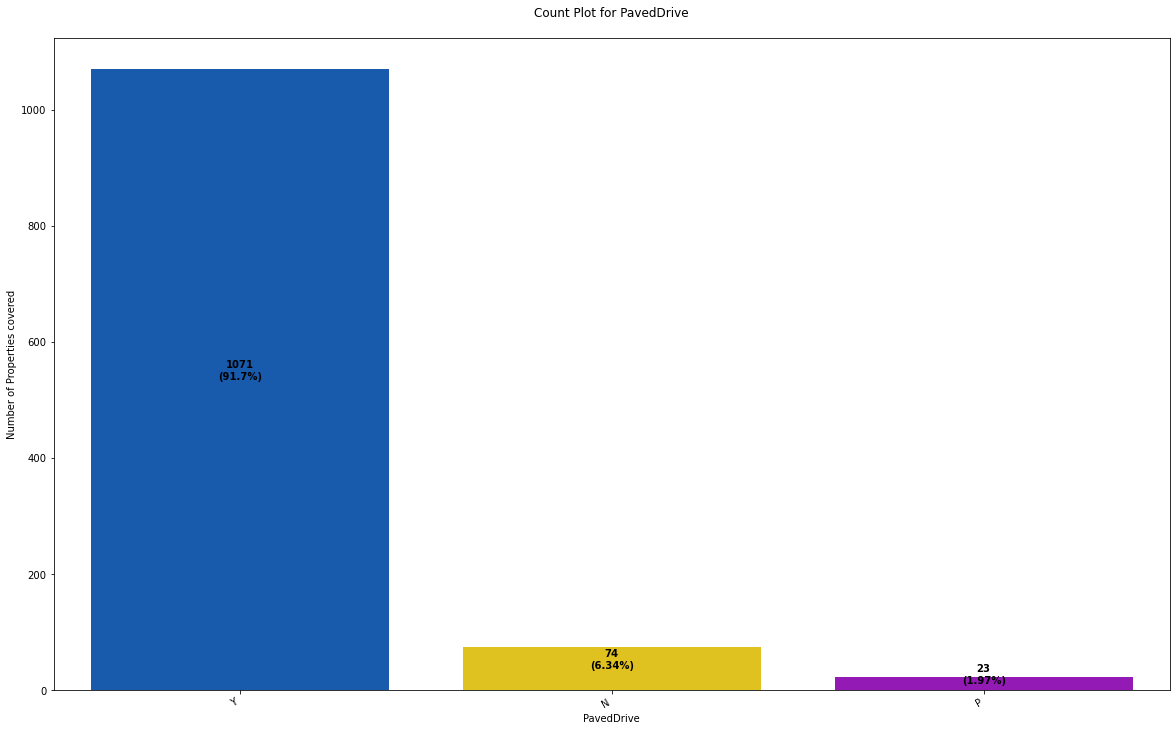

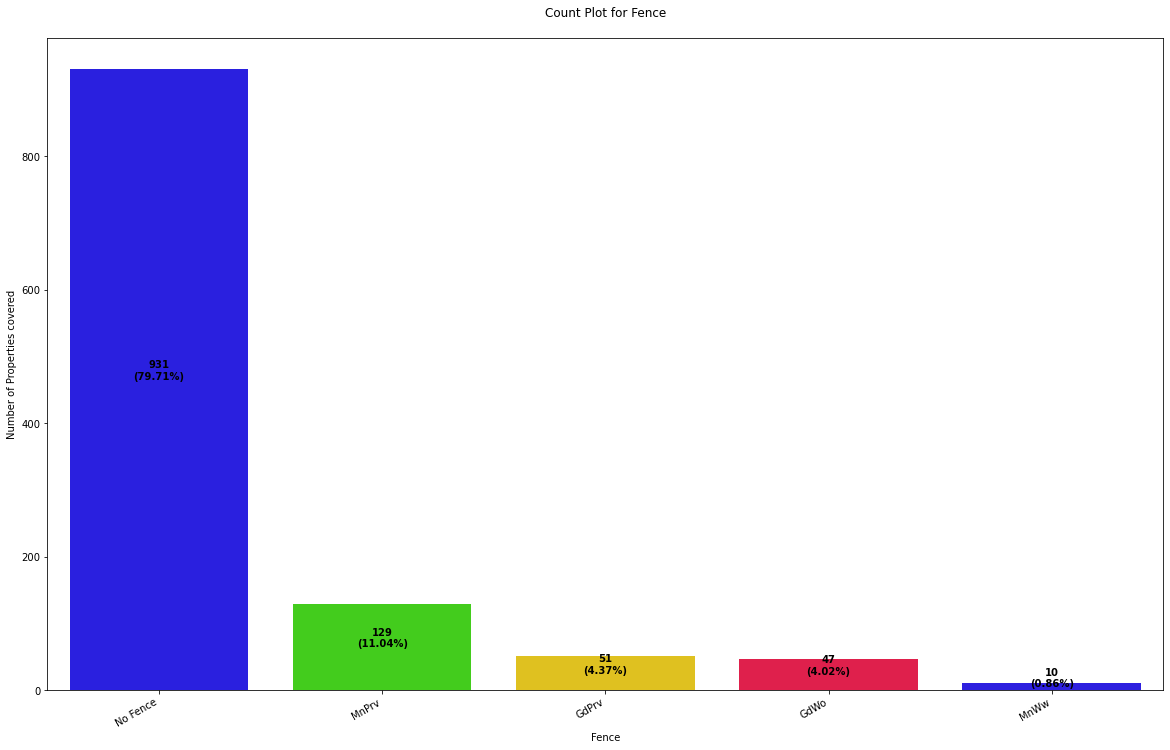

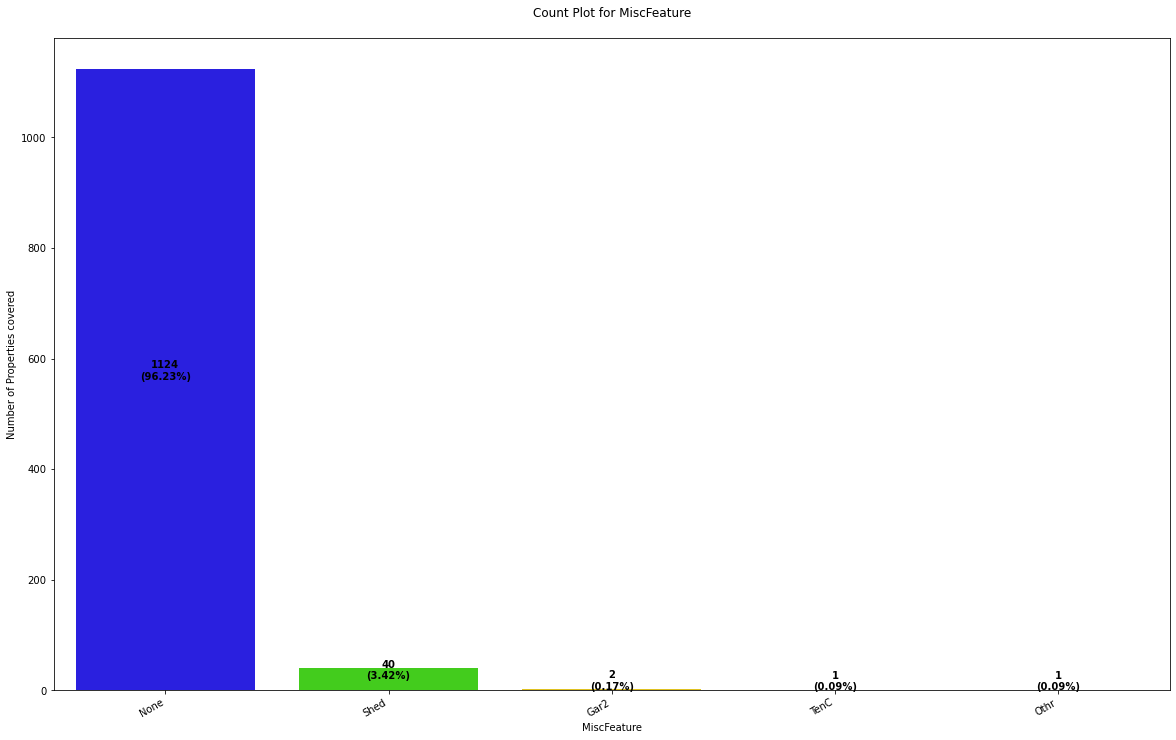

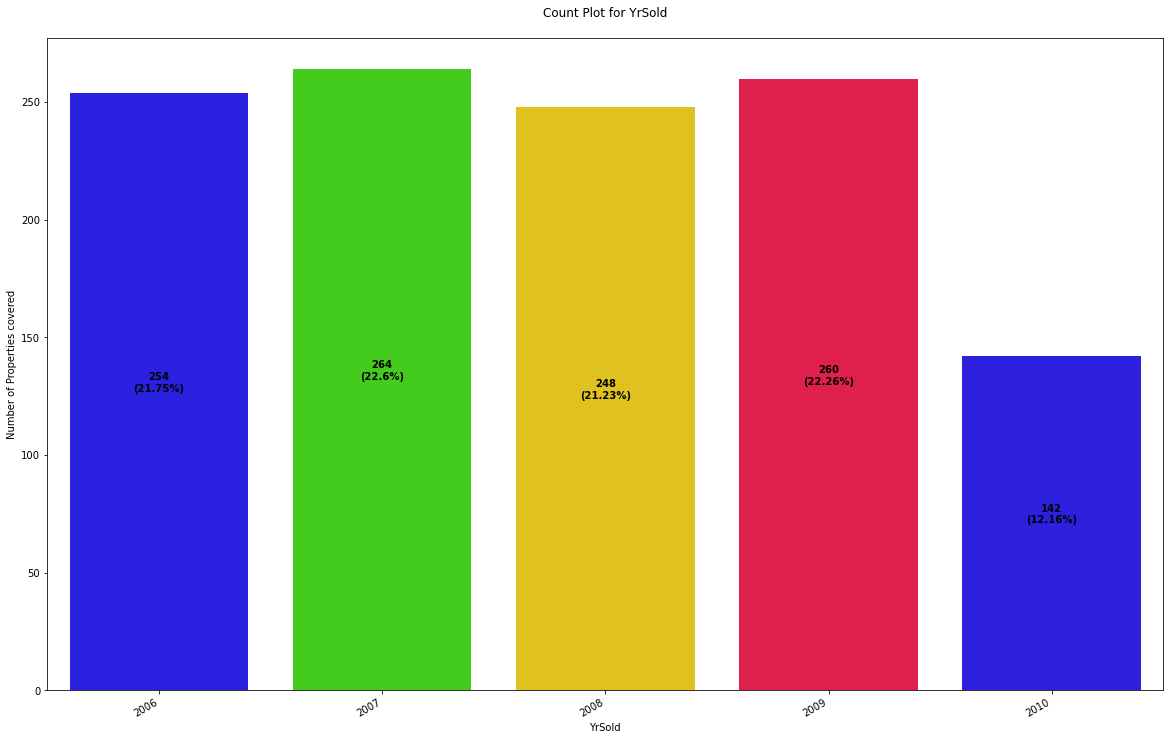

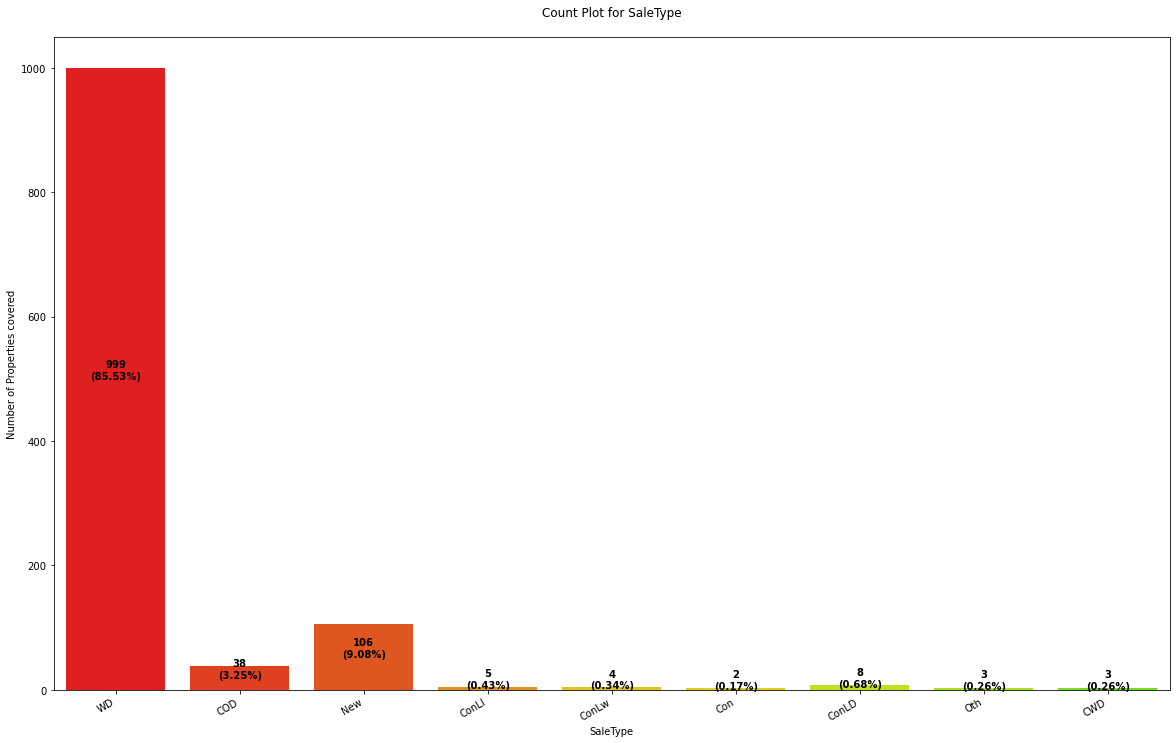

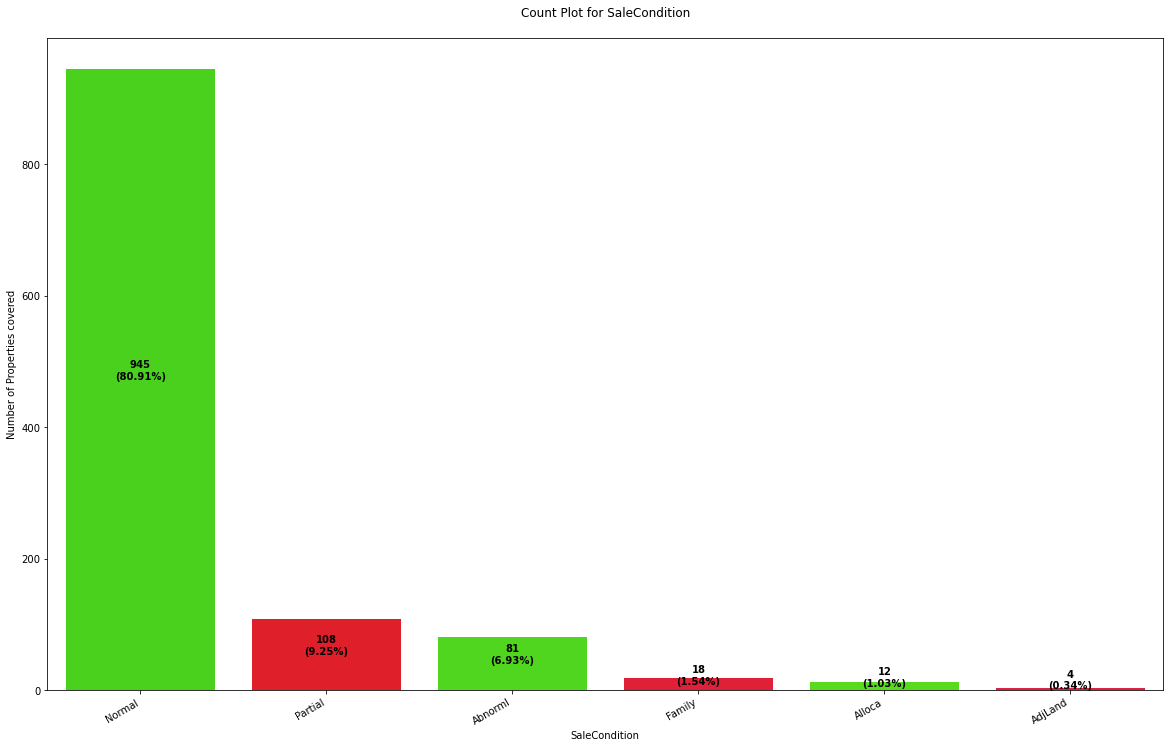

In [18]:
for col in df[singleuniquevalues]:
    plt.figure(figsize=(20,12))
    col_name = col
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.patches:
        h = i.get_height() # getting the count of each value
        t = len(df[col_name]) # getting the total number of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" # making the string for displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xlabel(col_name)
    plt.ylabel(f"Number of Properties covered")
    plt.xticks(rotation = 30, ha='right')
    plt.show()

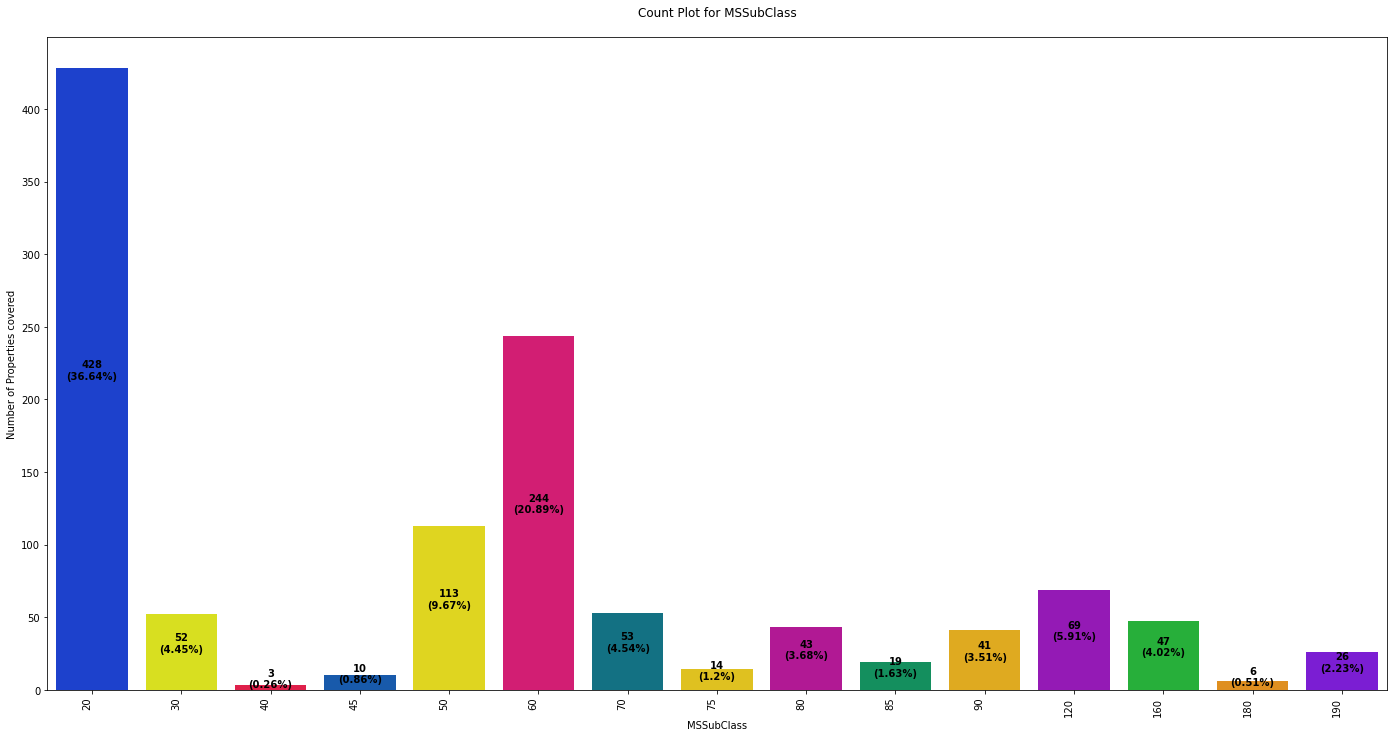

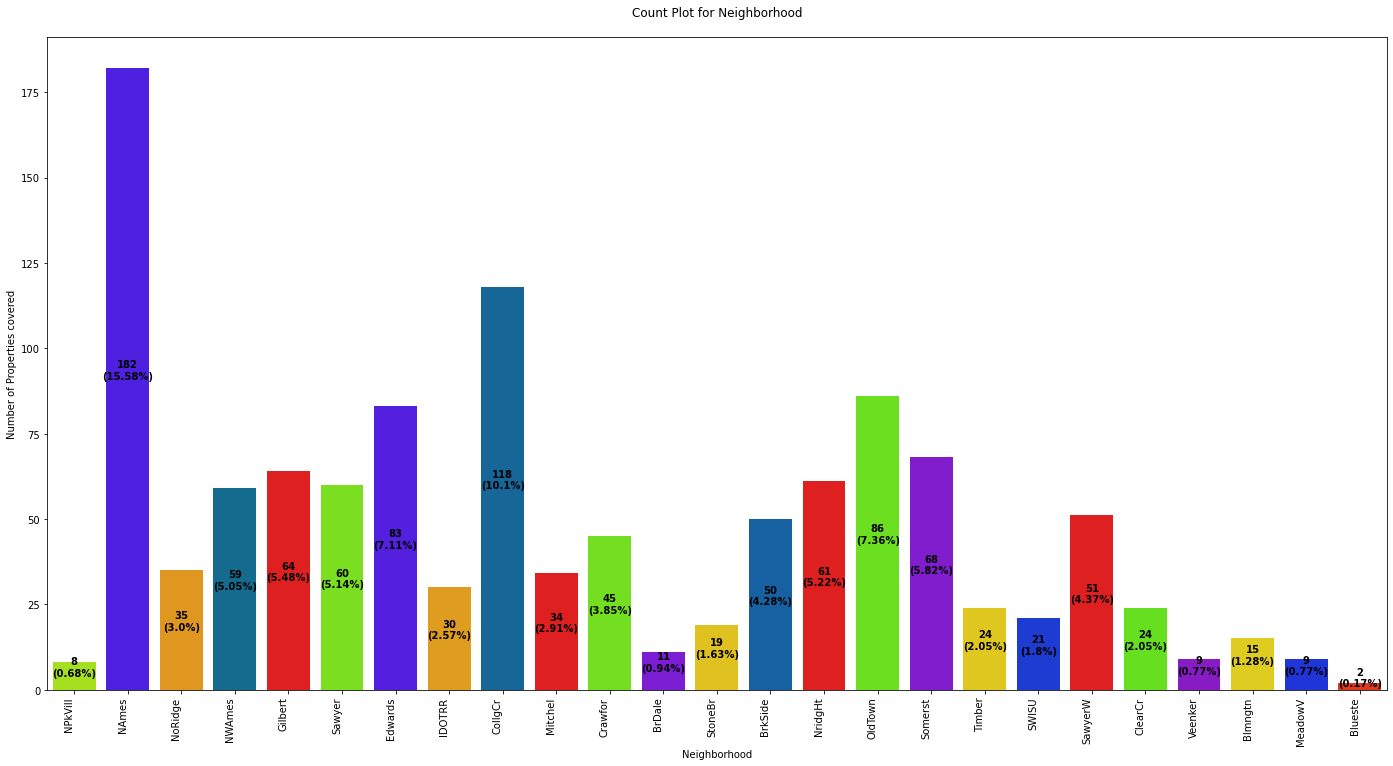

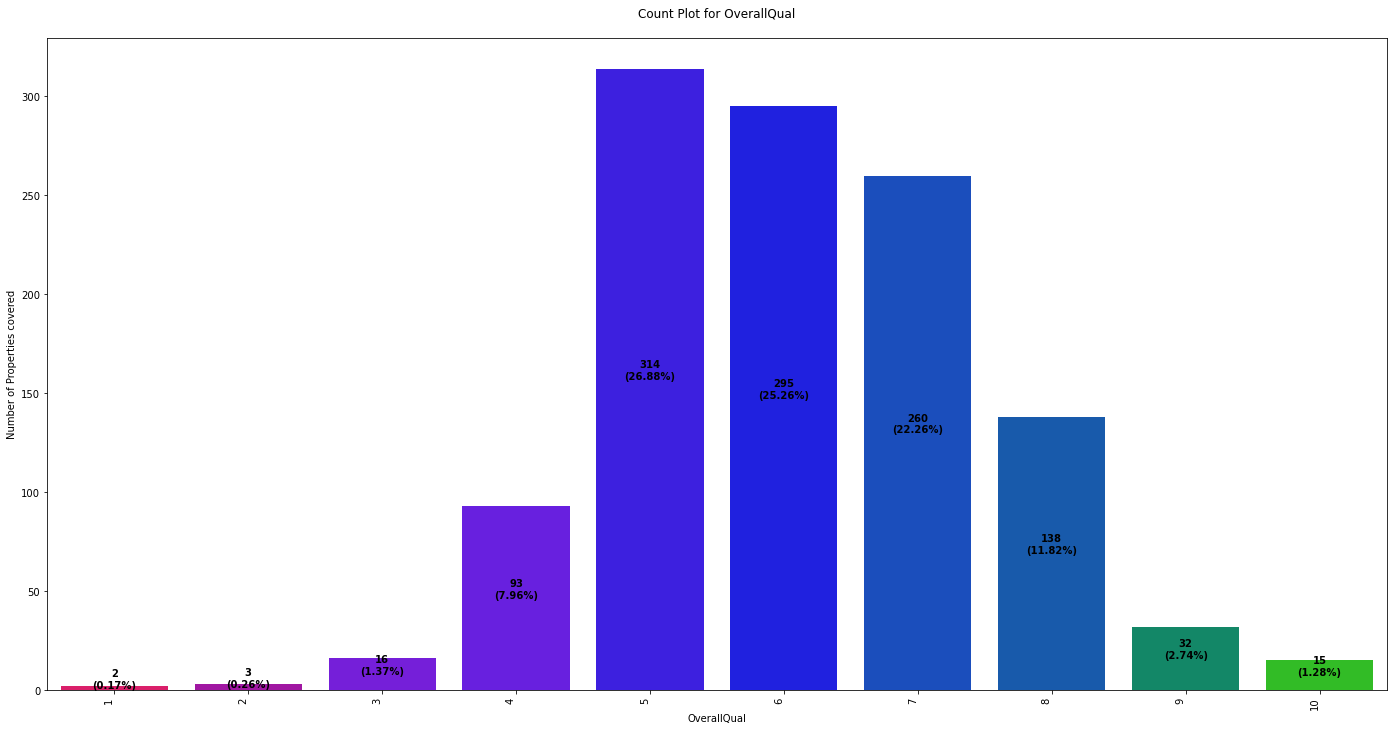

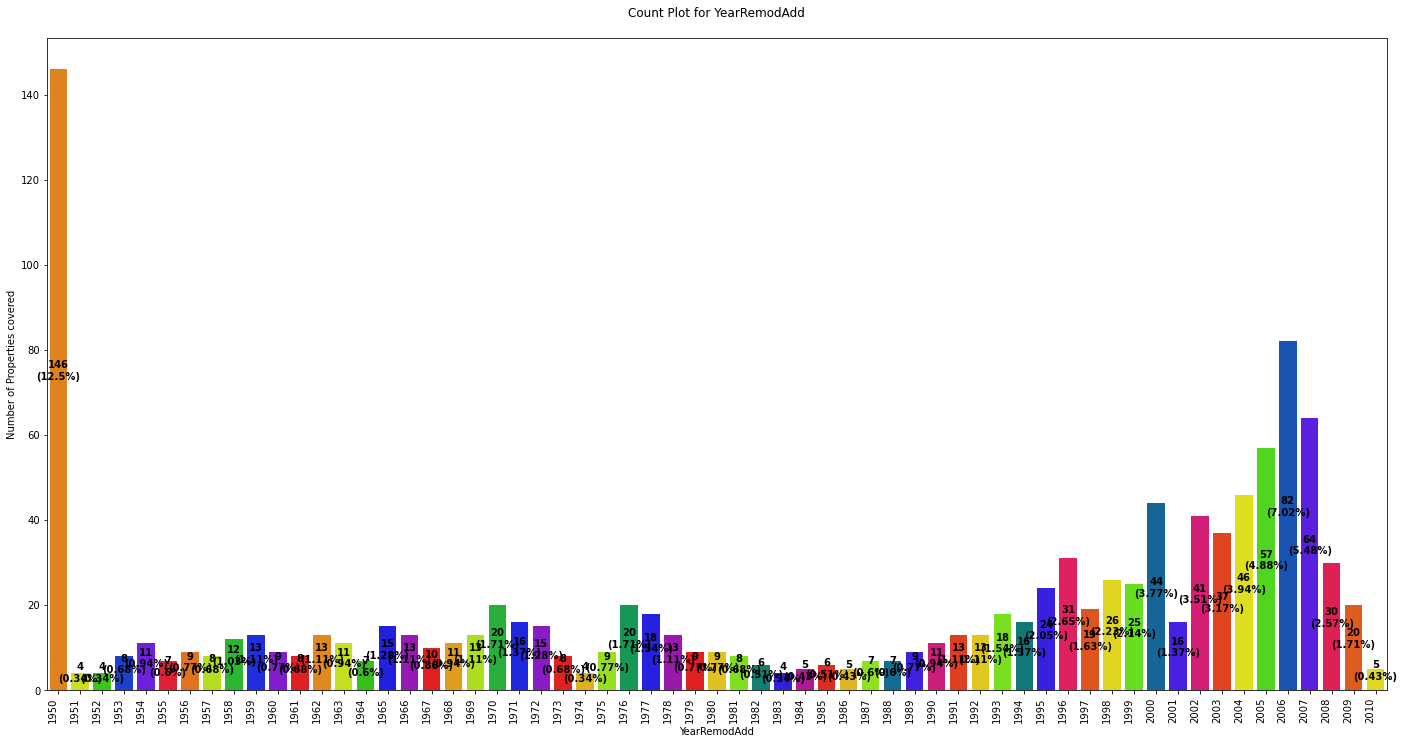

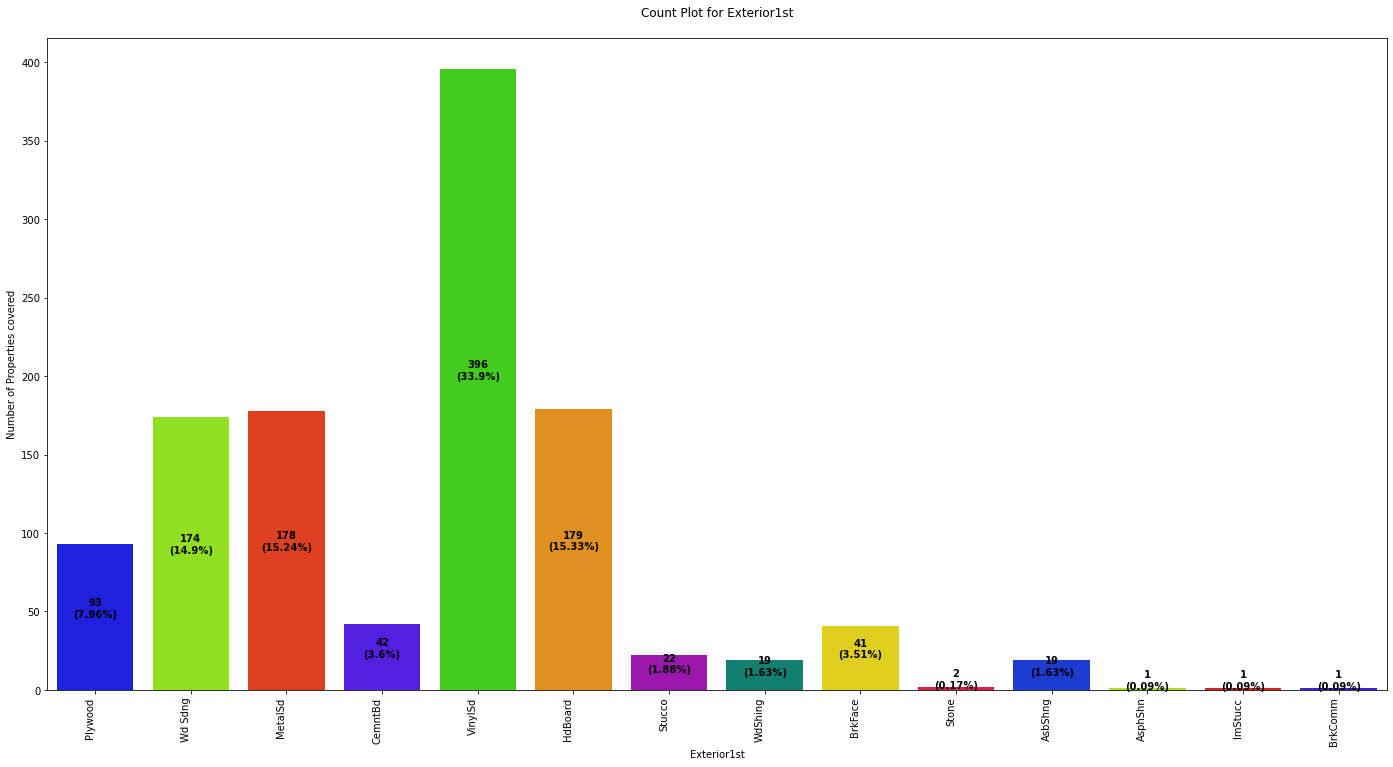

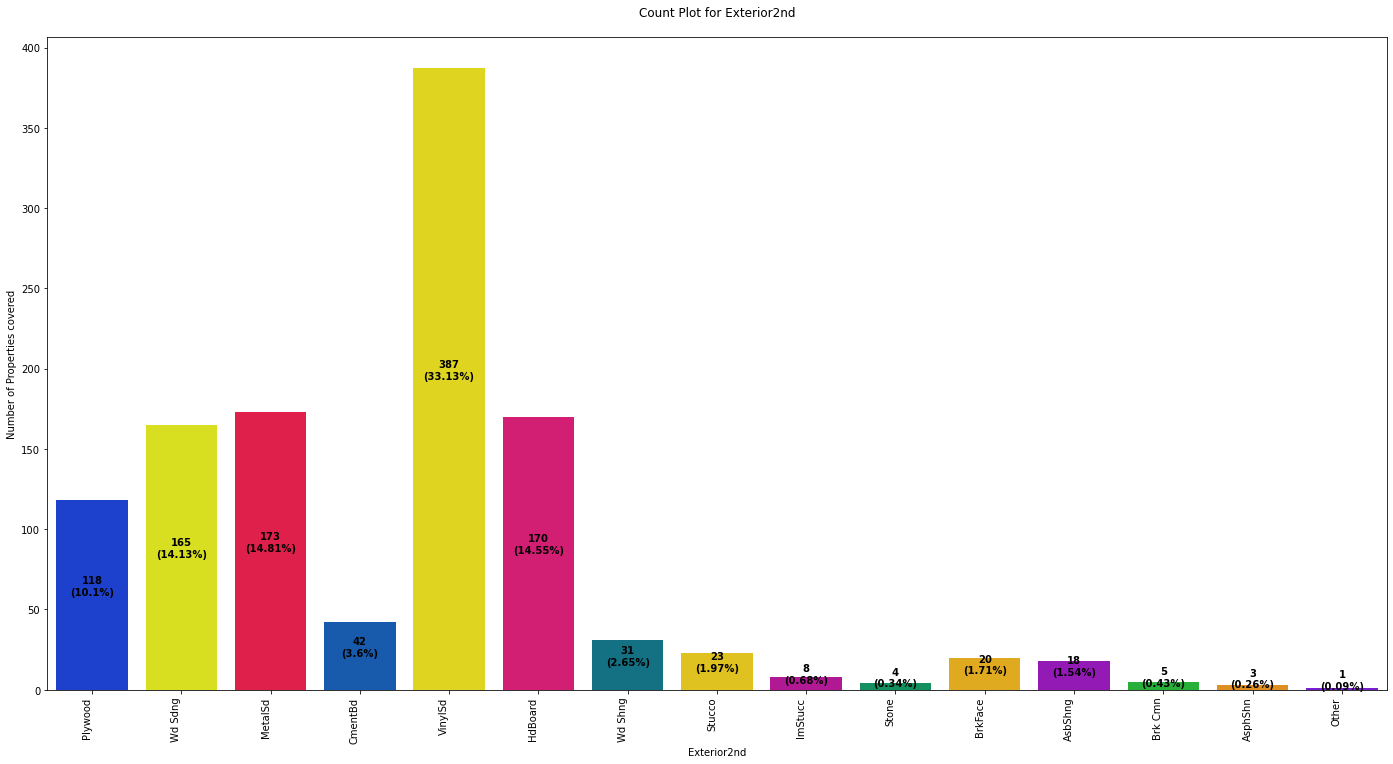

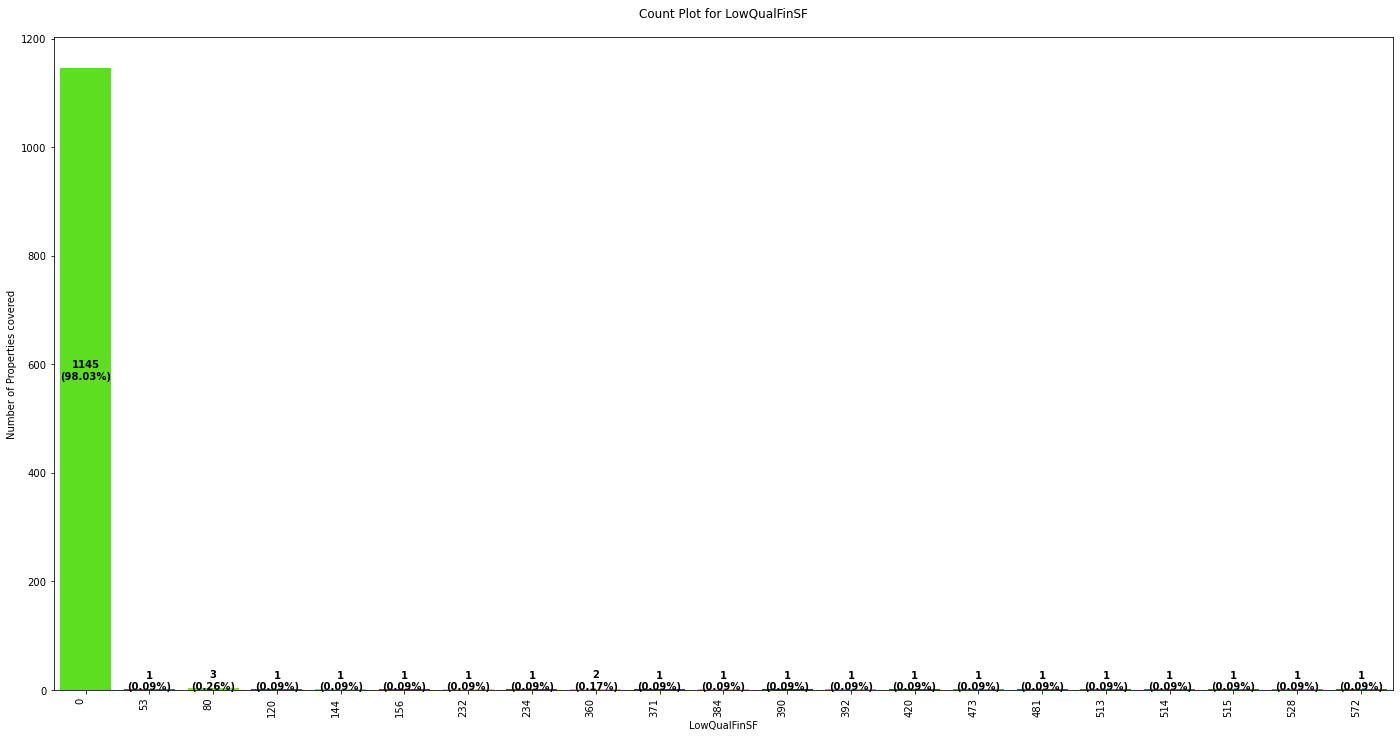

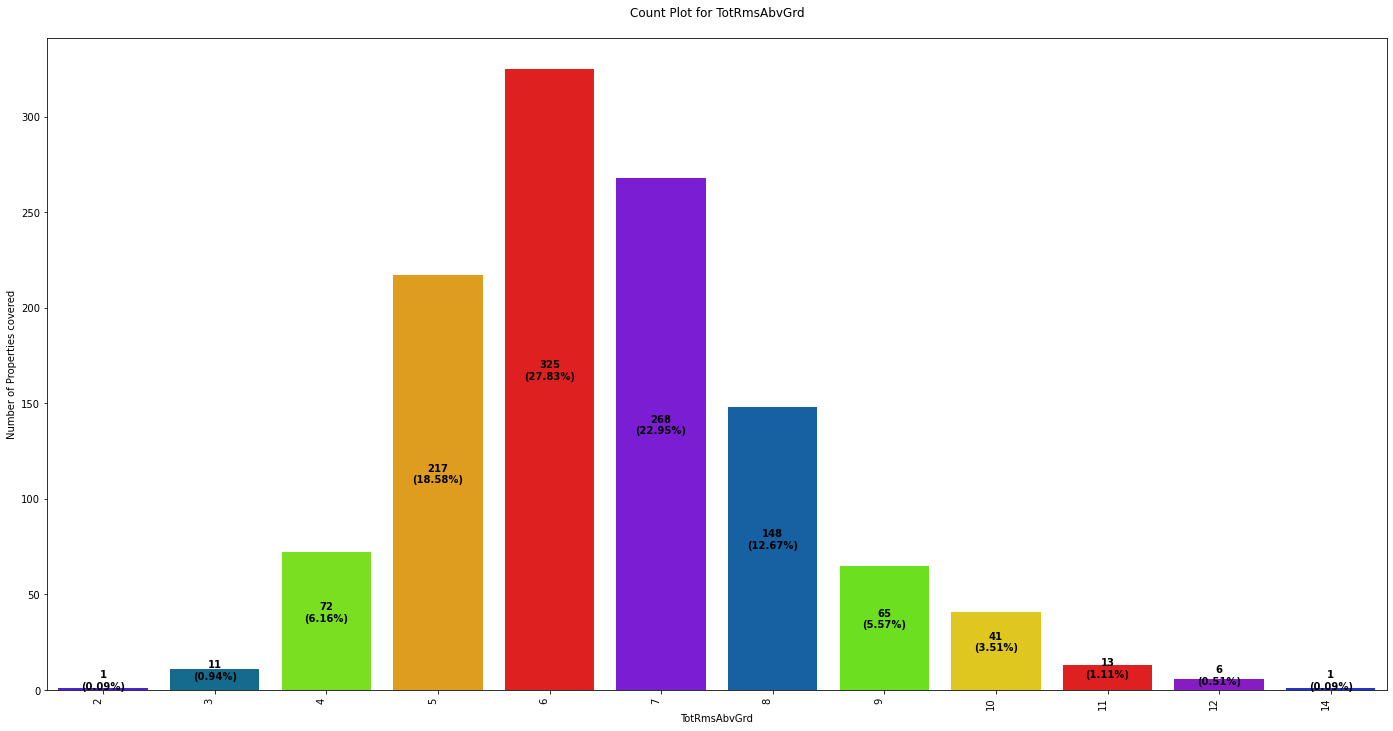

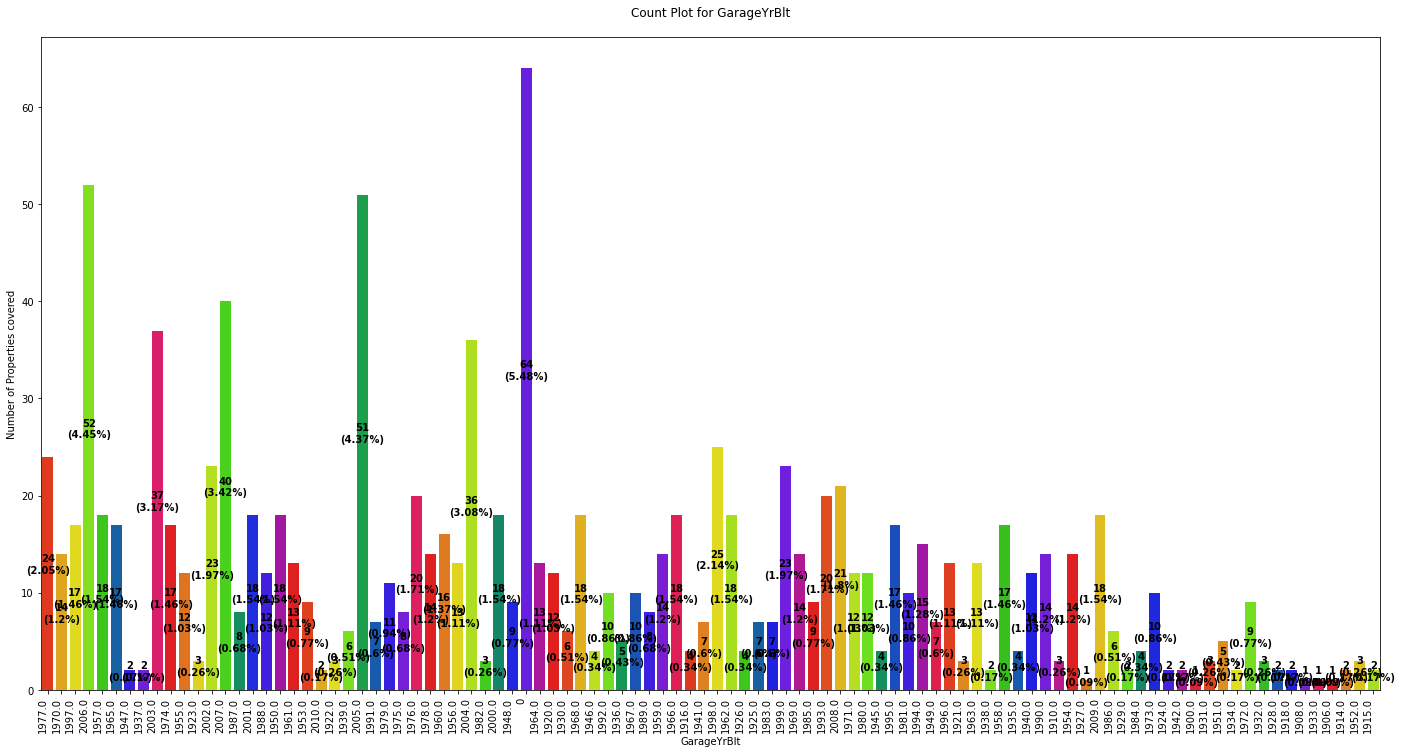

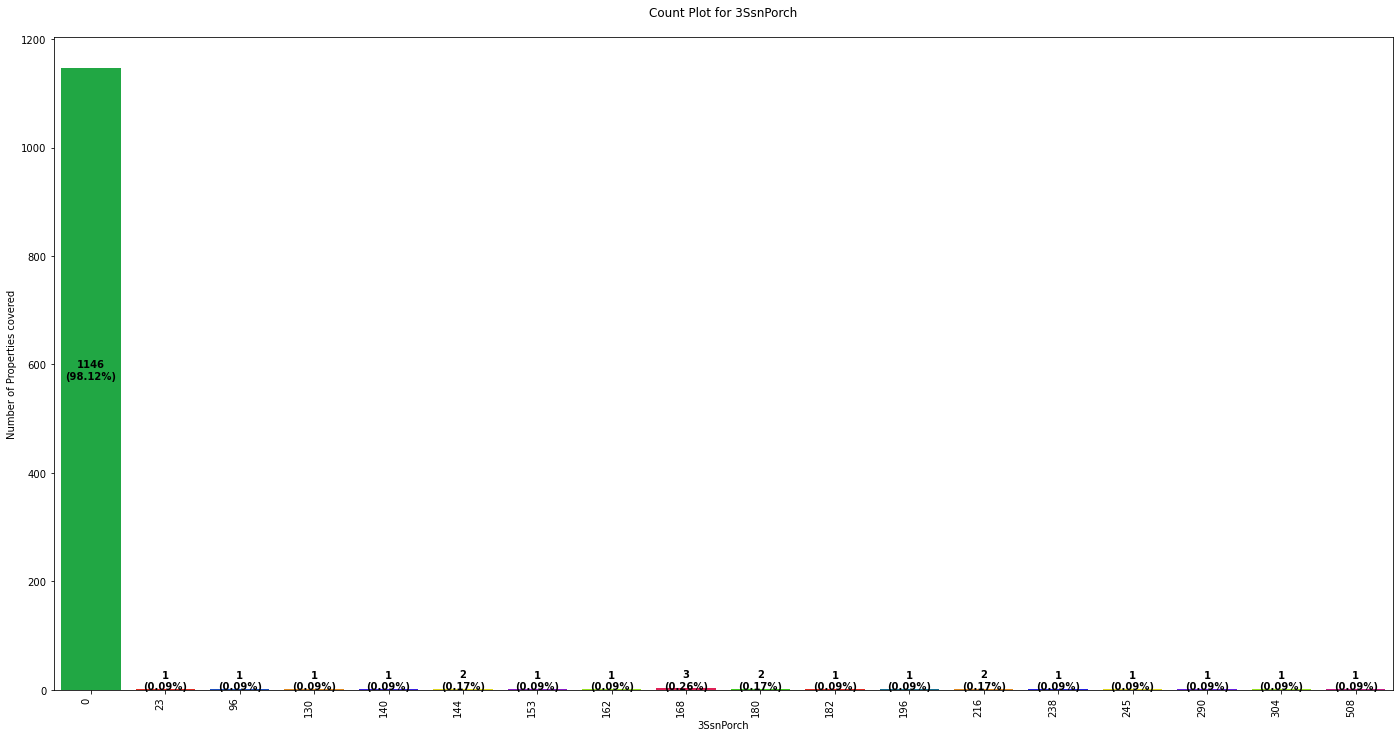

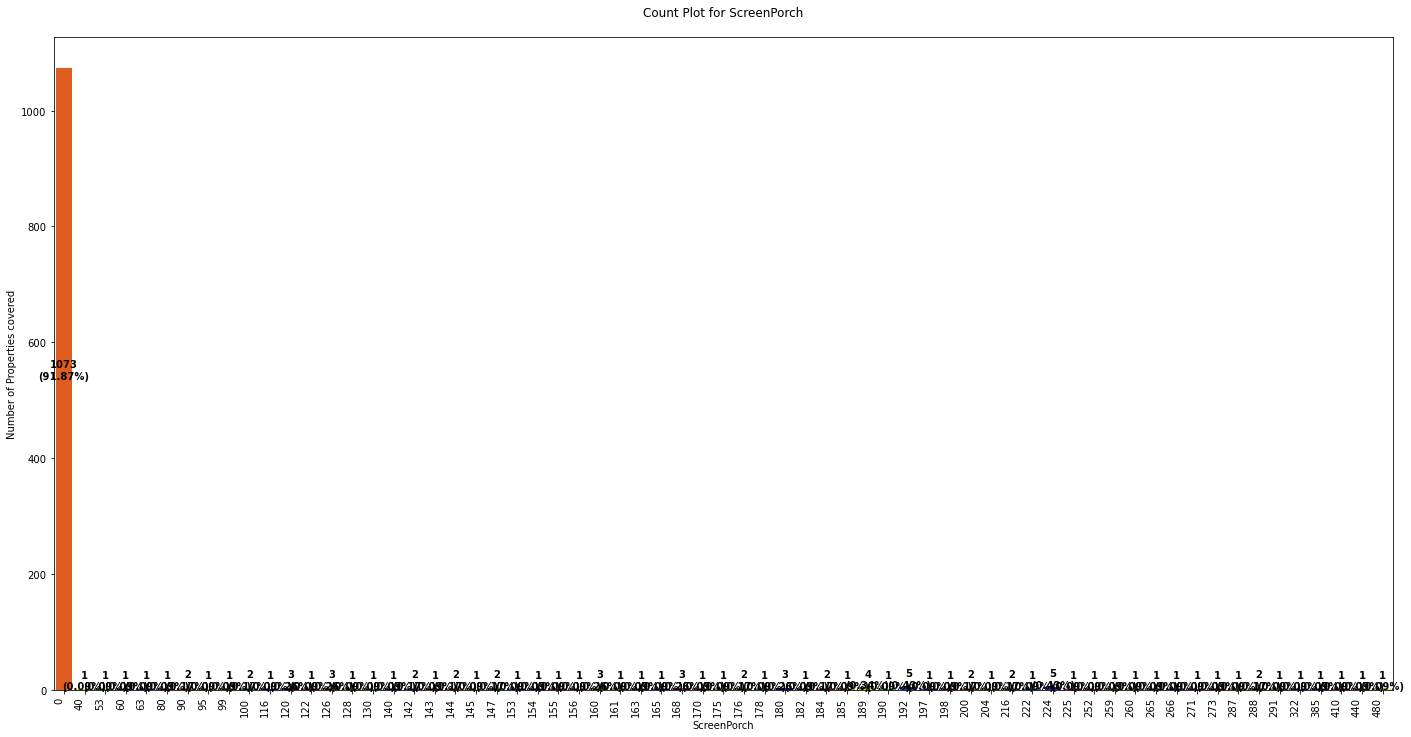

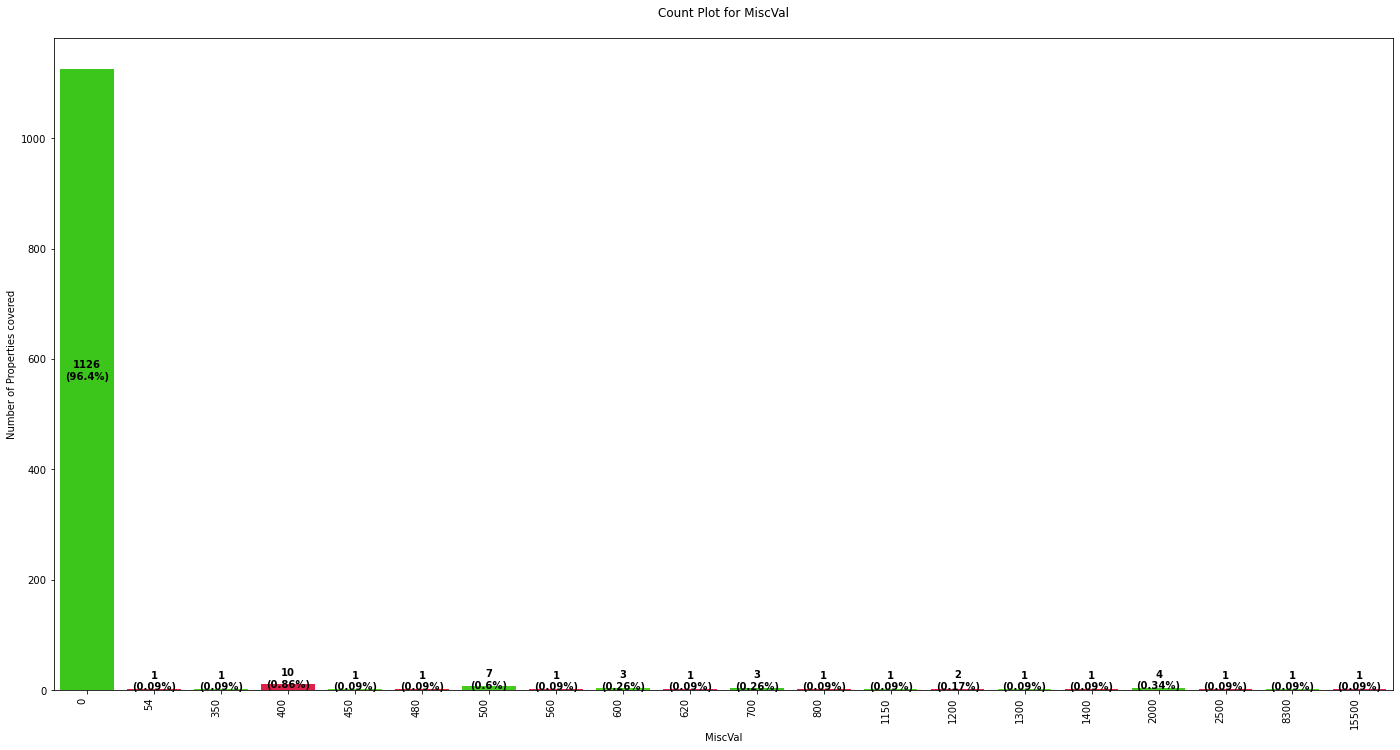

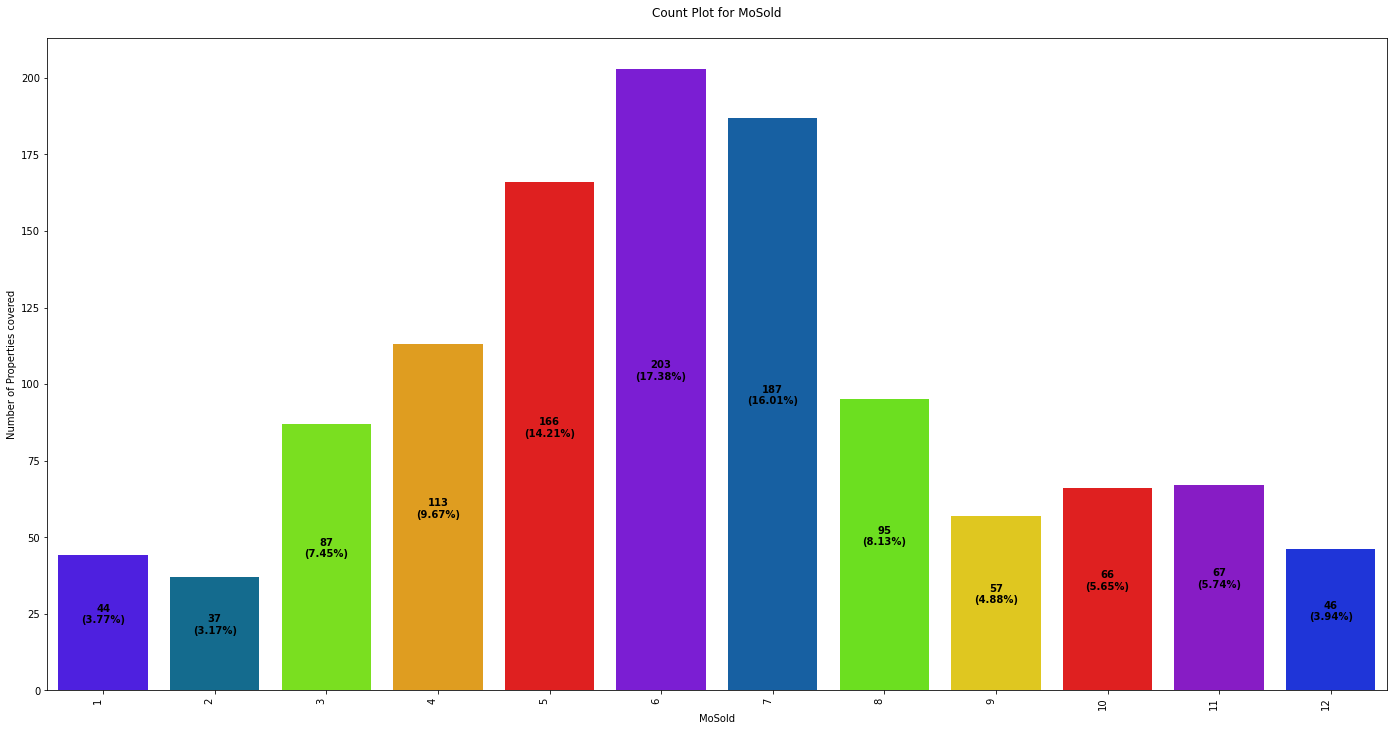

In [29]:
for col in df[doubleuniquevalues]:
    plt.figure(figsize=(24,12))
    col_name = col
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.patches:
        h = i.get_height() # getting the count of each value
        t = len(df[col_name]) # getting the total number of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" # making the string for displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xlabel(col_name)
    plt.ylabel(f"Number of Properties covered")
    plt.xticks(rotation = 90, ha='right')
    plt.show()

Scatter plot for LotFrontage column


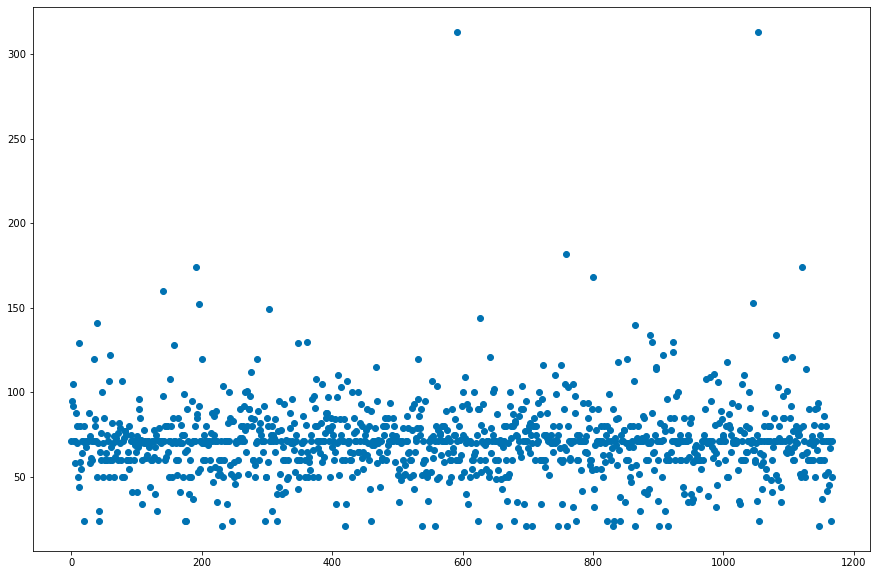

Scatter plot for LotArea column


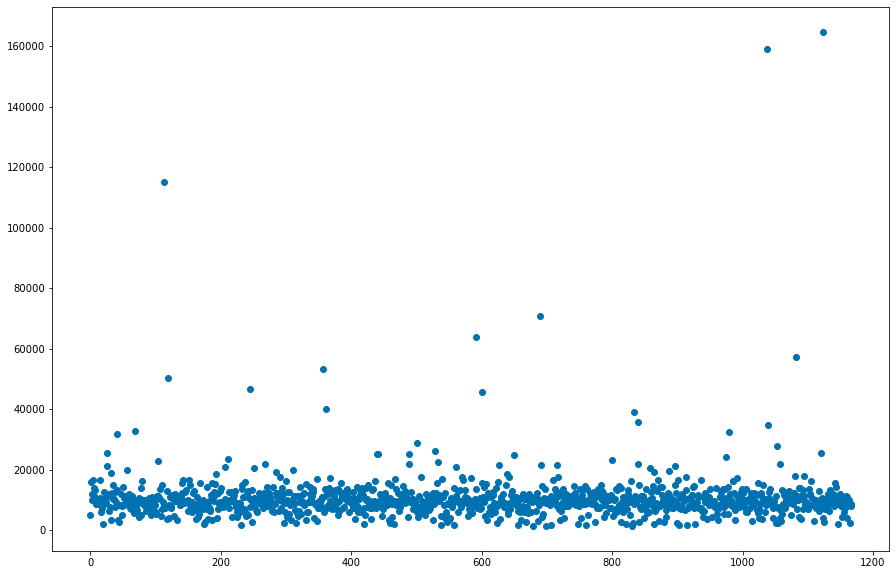

Scatter plot for YearBuilt column


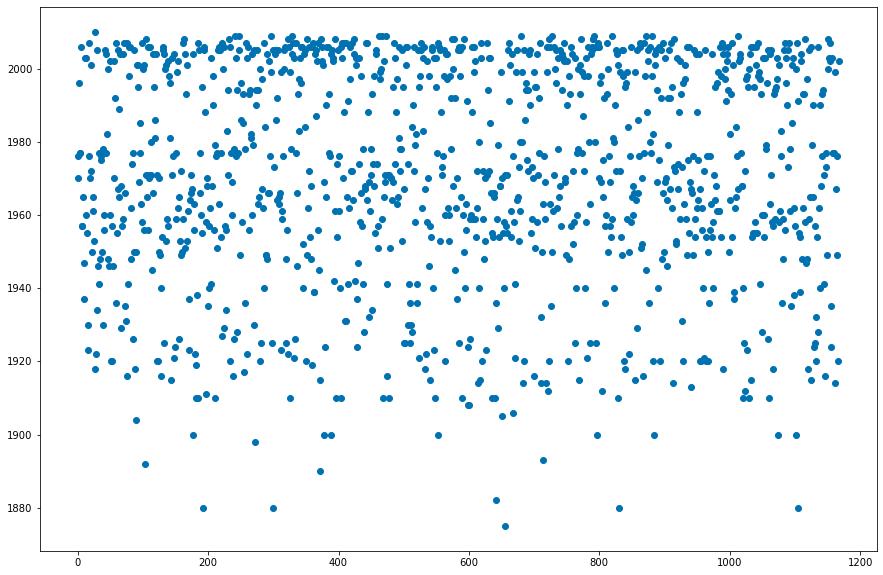

Scatter plot for MasVnrArea column


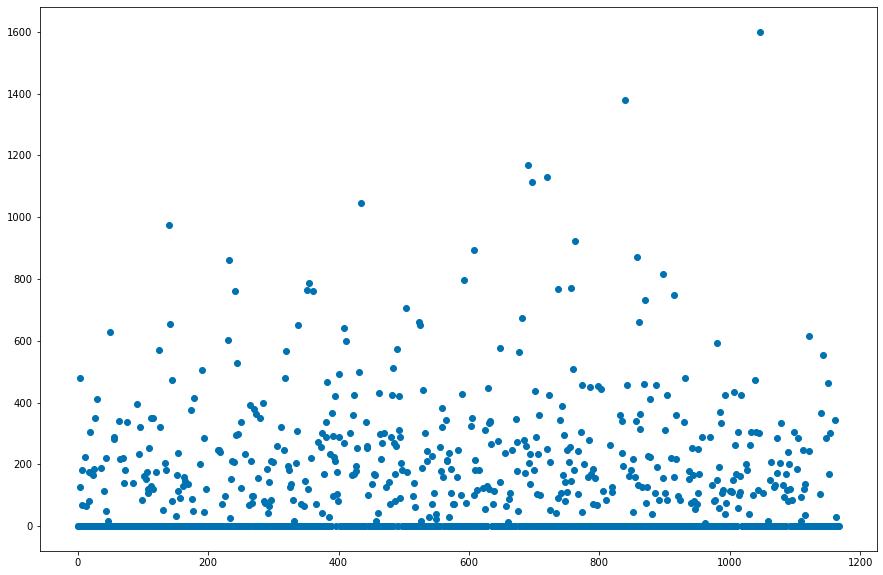

Scatter plot for BsmtFinSF1 column


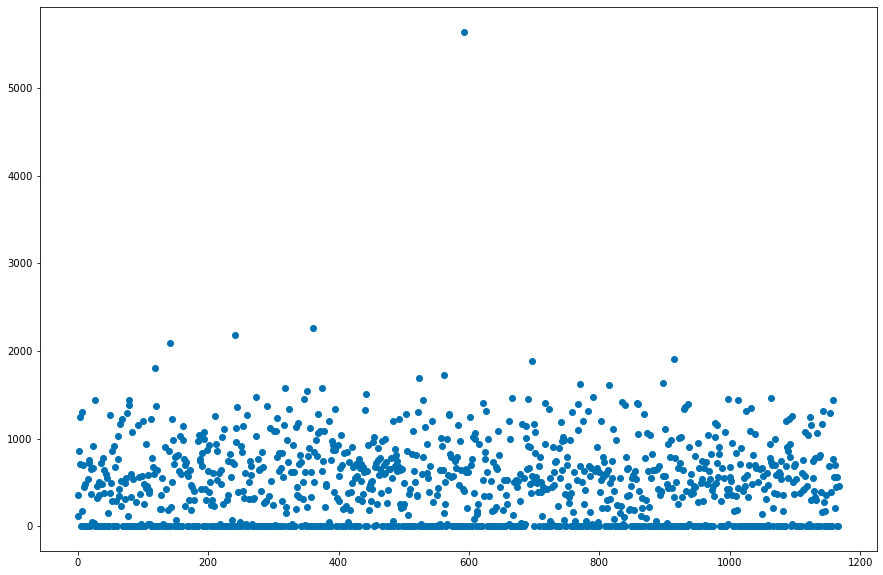

Scatter plot for BsmtFinSF2 column


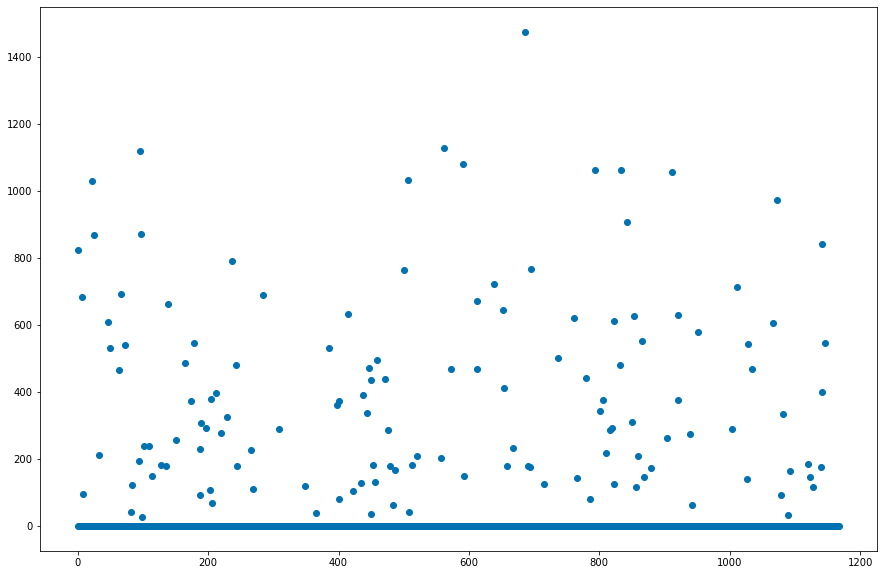

Scatter plot for BsmtUnfSF column


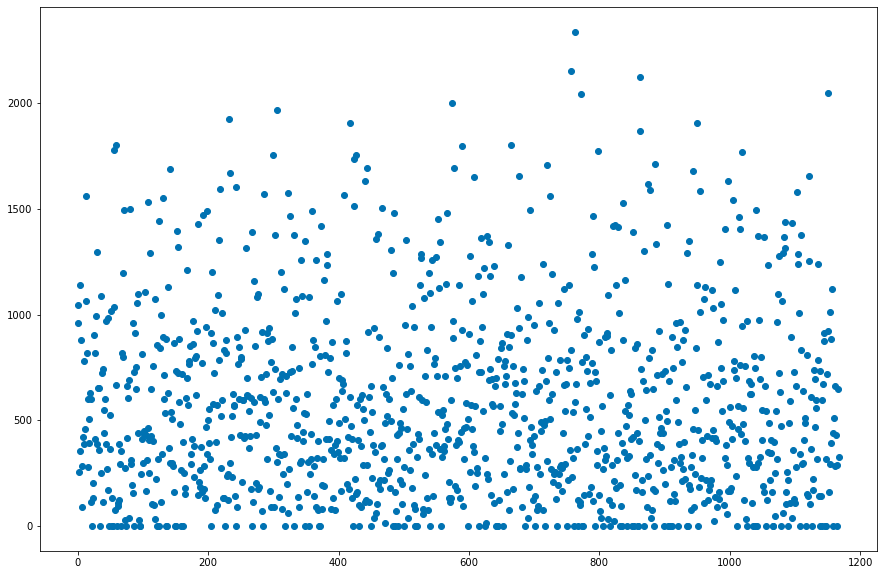

Scatter plot for TotalBsmtSF column


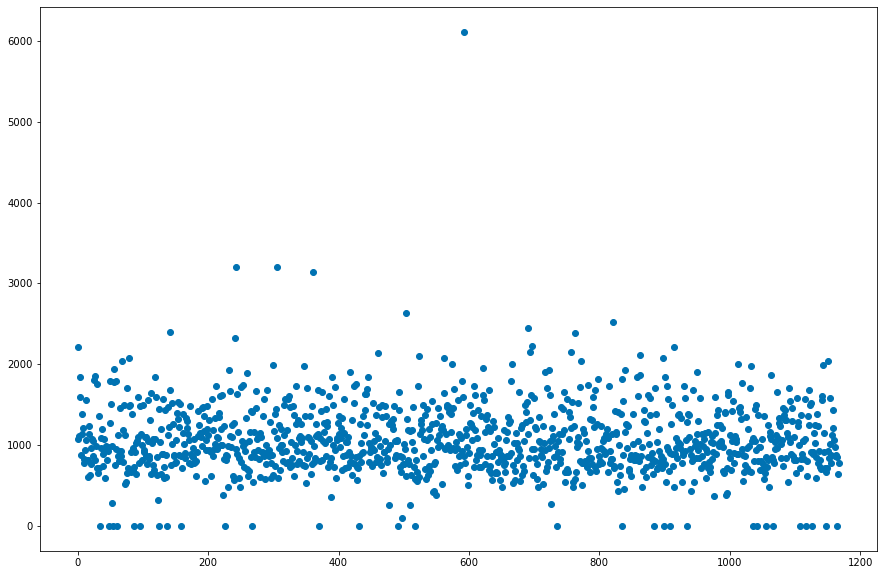

Scatter plot for 1stFlrSF column


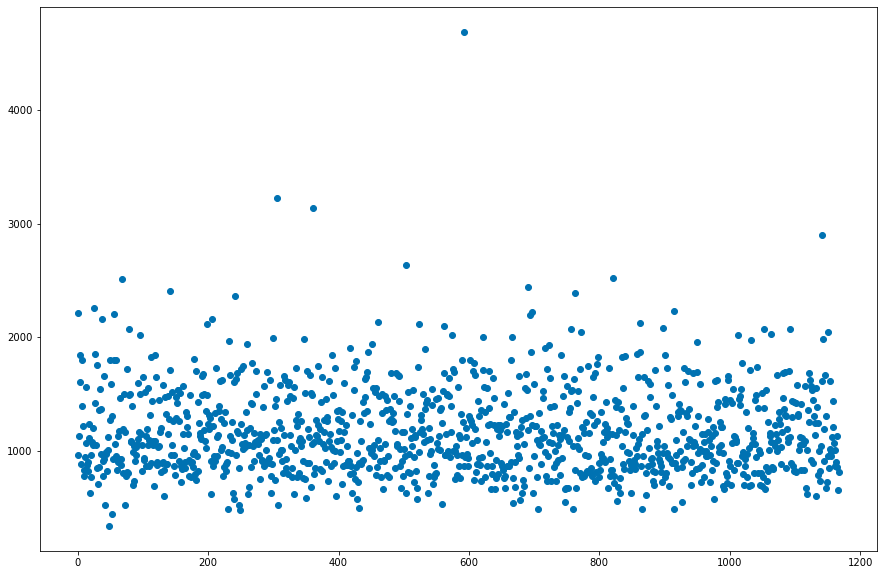

Scatter plot for 2ndFlrSF column


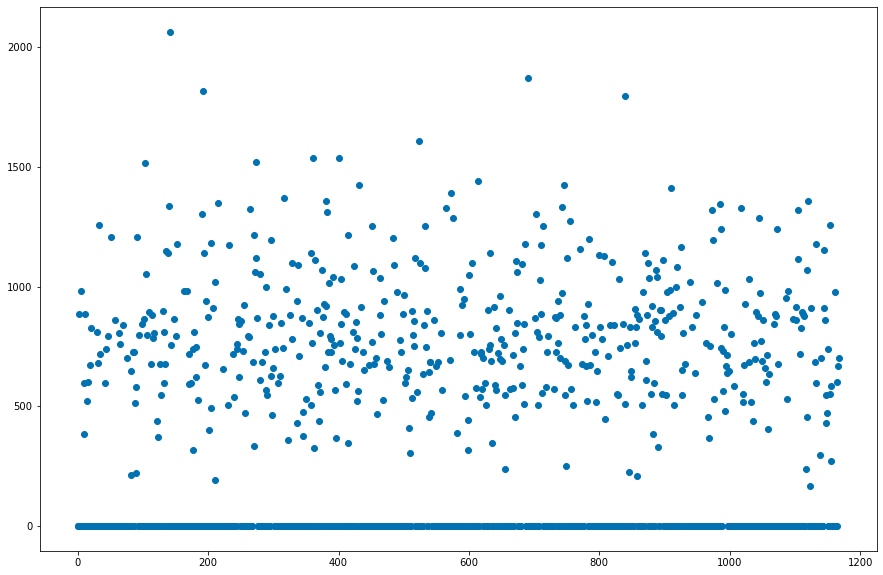

Scatter plot for GrLivArea column


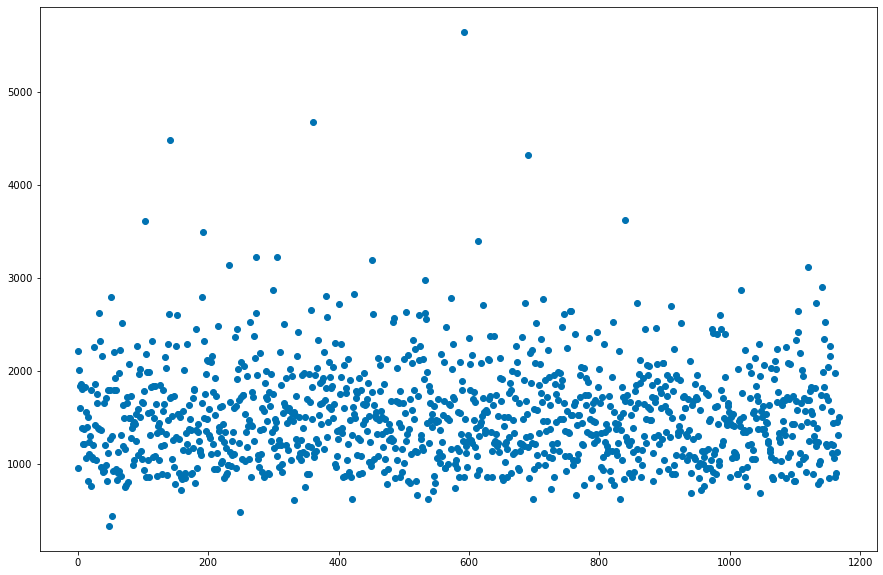

Scatter plot for GarageArea column


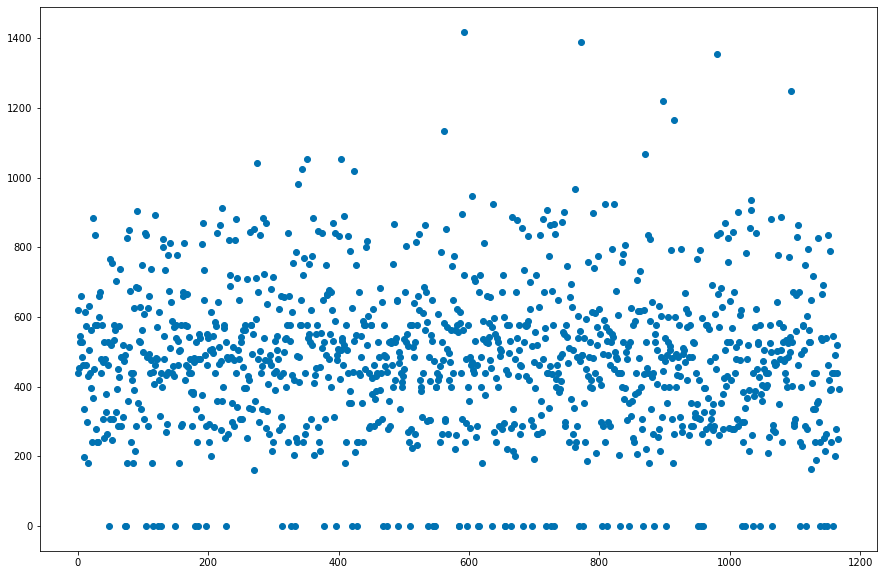

Scatter plot for WoodDeckSF column


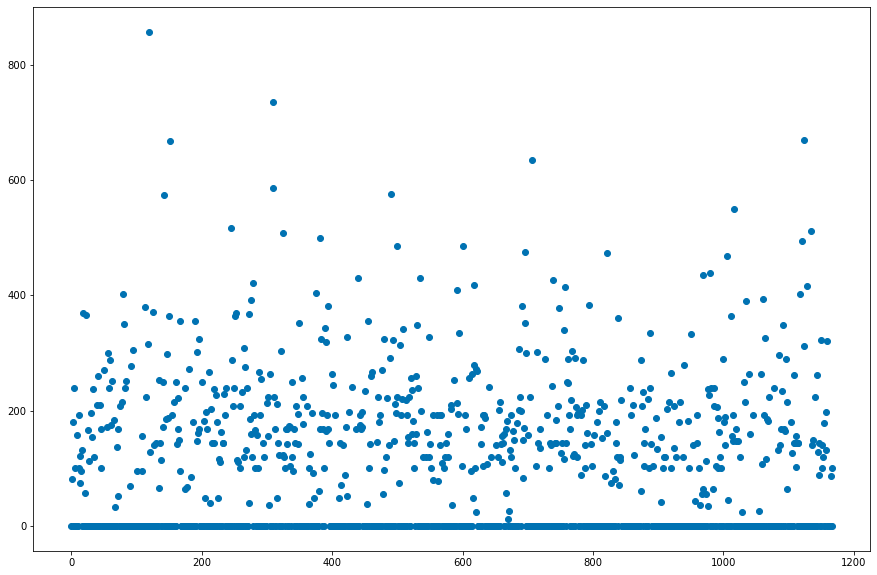

Scatter plot for OpenPorchSF column


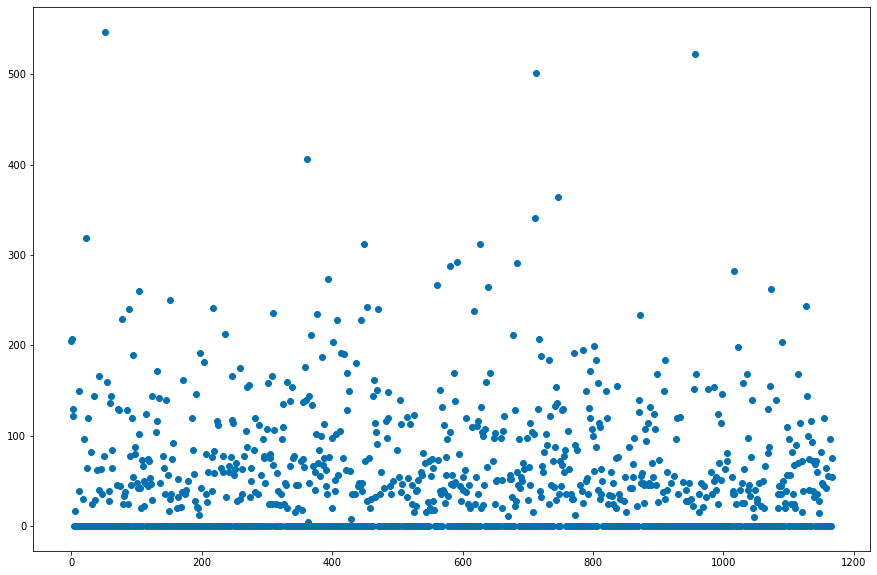

Scatter plot for EnclosedPorch column


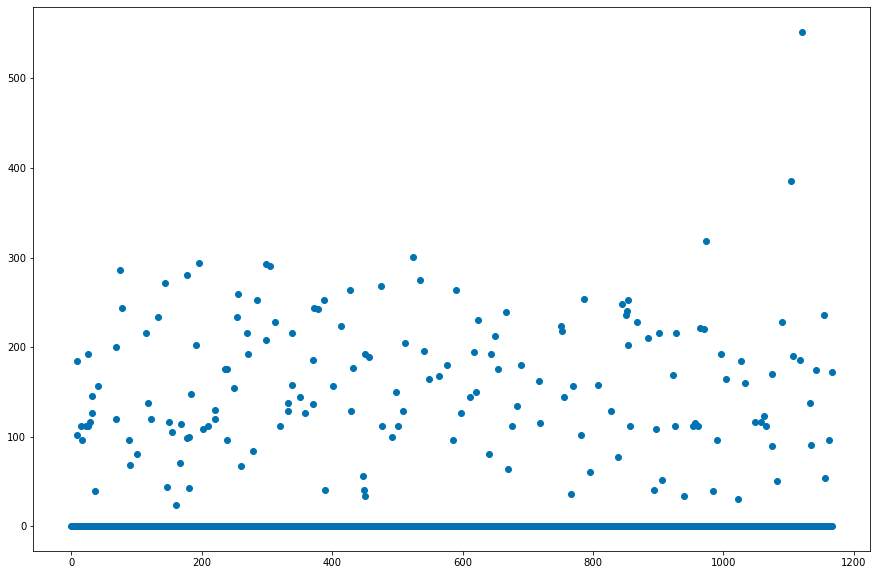

Scatter plot for SalePrice column


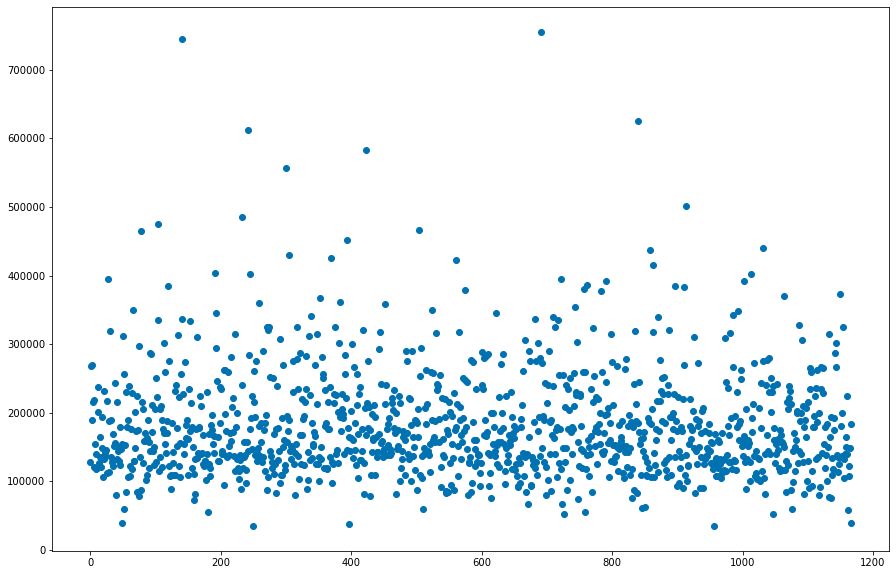

In [30]:
plt.style.use('seaborn-colorblind')
for j in df[tripleuniquevalues]:
    plt.figure(figsize=(15,10))
    print(f"Scatter plot for {j} column")
    plt.scatter(df.index, df[j])
    plt.show()

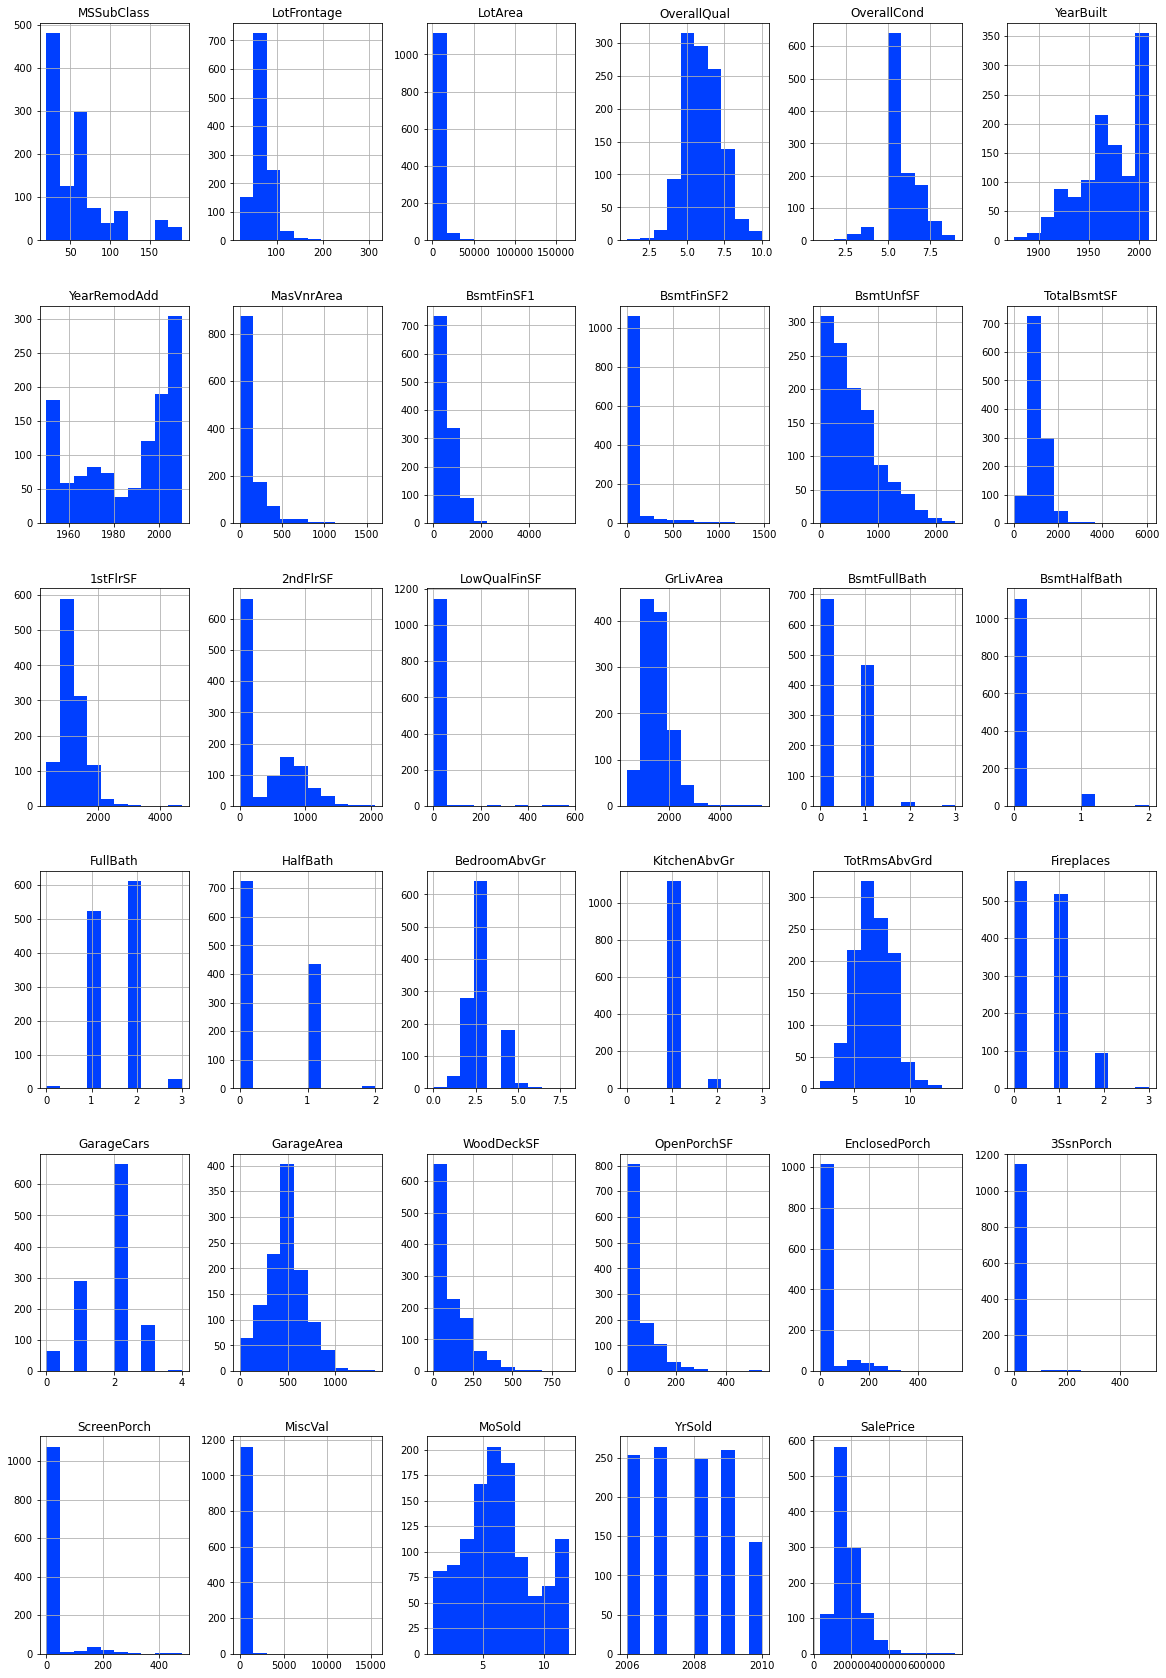

In [31]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,30))
plt.show()

#histogram for Numberical Data

In [33]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["mszoning_code"] = ord_enc.fit_transform(df[["MSZoning"]])
df[["MSZoning", "mszoning_code"]].head(11)

ord_enc = OrdinalEncoder()
df["street_code"] = ord_enc.fit_transform(df[["Street"]])
df[["Street", "street_code"]].head(11)

ord_enc = OrdinalEncoder()
df["alley_code"] = ord_enc.fit_transform(df[["Alley"]])
df[["Alley", "alley_code"]].head(11)

ord_enc = OrdinalEncoder()
df["lotshape_code"] = ord_enc.fit_transform(df[["LotShape"]])
df[["LotShape", "lotshape_code"]].head(11)

ord_enc = OrdinalEncoder()
df["landcontour_code"] = ord_enc.fit_transform(df[["LandContour"]])
df[["LandContour", "landcontour_code"]].head(11)

ord_enc = OrdinalEncoder()
df["utilities_code"] = ord_enc.fit_transform(df[["Utilities"]])
df[["Utilities", "utilities_code"]].head(11)

ord_enc = OrdinalEncoder()
df["lotconfig_code"] = ord_enc.fit_transform(df[["LotConfig"]])
df[["LotConfig", "lotconfig_code"]].head(11)

ord_enc = OrdinalEncoder()
df["landslope_code"] = ord_enc.fit_transform(df[["LandSlope"]])
df[["LandSlope", "landslope_code"]].head(11)

ord_enc = OrdinalEncoder()
df["neighborhood_code"] = ord_enc.fit_transform(df[["Neighborhood"]])
df[["Neighborhood", "neighborhood_code"]].head(11)

ord_enc = OrdinalEncoder()
df["condition1_code"] = ord_enc.fit_transform(df[["Condition1"]])
df[["Condition1", "condition1_code"]].head(11)

ord_enc = OrdinalEncoder()
df["condition2_code"] = ord_enc.fit_transform(df[["Condition2"]])
df[["Condition2", "condition2_code"]].head(11)

ord_enc = OrdinalEncoder()
df["bldgtype_code"] = ord_enc.fit_transform(df[["BldgType"]])
df[["BldgType", "bldgtype_code"]].head(11)

ord_enc = OrdinalEncoder()
df["housestyle_code"] = ord_enc.fit_transform(df[["HouseStyle"]])
df[["HouseStyle", "housestyle_code"]].head(11)

ord_enc = OrdinalEncoder()
df["roofstyle_code"] = ord_enc.fit_transform(df[["RoofStyle"]])
df[["RoofStyle", "roofstyle_code"]].head(11)

ord_enc = OrdinalEncoder()
df["roofmatl_code"] = ord_enc.fit_transform(df[["RoofMatl"]])
df[["RoofMatl", "roofmatl_code"]].head(11)

ord_enc = OrdinalEncoder()
df["exterior1st_code"] = ord_enc.fit_transform(df[["Exterior1st"]])
df[["Exterior1st", "exterior1st_code"]].head(11)

ord_enc = OrdinalEncoder()
df["exterior2nd_code"] = ord_enc.fit_transform(df[["Exterior2nd"]])
df[["Exterior2nd", "exterior2nd_code"]].head(11)

ord_enc = OrdinalEncoder()
df["masvnrtype_code"] = ord_enc.fit_transform(df[["MasVnrType"]])
df[["MasVnrType", "masvnrtype_code"]].head(11)

ord_enc = OrdinalEncoder()
df["exterqual_code"] = ord_enc.fit_transform(df[["ExterQual"]])
df[["ExterQual", "exterqual_code"]].head(11)

ord_enc = OrdinalEncoder()
df["extercond_code"] = ord_enc.fit_transform(df[["ExterCond"]])
df[["ExterCond", "extercond_code"]].head(11)

ord_enc = OrdinalEncoder()
df["foundation_code"] = ord_enc.fit_transform(df[["Foundation"]])
df[["Foundation", "foundation_code"]].head(11)

ord_enc = OrdinalEncoder()
df["bsmtqual_code"] = ord_enc.fit_transform(df[["BsmtQual"]])
df[["BsmtQual", "bsmtqual_code"]].head(11)

ord_enc = OrdinalEncoder()
df["bsmtcond_code"] = ord_enc.fit_transform(df[["BsmtCond"]])
df[["BsmtCond", "bsmtcond_code"]].head(11)

ord_enc = OrdinalEncoder()
df["bsmtexposure_code"] = ord_enc.fit_transform(df[["BsmtExposure"]])
df[["BsmtExposure", "bsmtexposure_code"]].head(11)

ord_enc = OrdinalEncoder()
df["bsmtfintype1_code"] = ord_enc.fit_transform(df[["BsmtFinType1"]])
df[["BsmtFinType1", "bsmtfintype1_code"]].head(11)

ord_enc = OrdinalEncoder()
df["bsmtfintype2_code"] = ord_enc.fit_transform(df[["BsmtFinType2"]])
df[["BsmtFinType2", "bsmtfintype2_code"]].head(11)

ord_enc = OrdinalEncoder()
df["heating_code"] = ord_enc.fit_transform(df[["Heating"]])
df[["Heating", "heating_code"]].head(11)

ord_enc = OrdinalEncoder()
df["heatingqc_code"] = ord_enc.fit_transform(df[["HeatingQC"]])
df[["HeatingQC", "heatingqc_code"]].head(11)

ord_enc = OrdinalEncoder()
df["centralair_code"] = ord_enc.fit_transform(df[["CentralAir"]])
df[["CentralAir", "centralair_code"]].head(11)

ord_enc = OrdinalEncoder()
df["electrical_code"] = ord_enc.fit_transform(df[["Electrical"]])
df[["Electrical", "electrical_code"]].head(11)

ord_enc = OrdinalEncoder()
df["kitchenqual_code"] = ord_enc.fit_transform(df[["KitchenQual"]])
df[["KitchenQual", "kitchenqual_code"]].head(11)

ord_enc = OrdinalEncoder()
df["functional_code"] = ord_enc.fit_transform(df[["Functional"]])
df[["Functional", "functional_code"]].head(11)

ord_enc = OrdinalEncoder()
df["fireplacequ_code"] = ord_enc.fit_transform(df[["FireplaceQu"]])
df[["FireplaceQu", "fireplacequ_code"]].head(11)

ord_enc = OrdinalEncoder()
df["garagetype_code"] = ord_enc.fit_transform(df[["GarageType"]])
df[["GarageType", "garagetype_code"]].head(11)

ord_enc = OrdinalEncoder()
df["garagefinish_code"] = ord_enc.fit_transform(df[["GarageFinish"]])
df[["GarageFinish", "garagefinish_code"]].head(11)

ord_enc = OrdinalEncoder()
df["garagequal_code"] = ord_enc.fit_transform(df[["GarageQual"]])
df[["GarageQual", "garagequal_code"]].head(11)

ord_enc = OrdinalEncoder()
df["garagecond_code"] = ord_enc.fit_transform(df[["GarageCond"]])
df[["GarageCond", "garagecond_code"]].head(11)

ord_enc = OrdinalEncoder()
df["paveddrive_code"] = ord_enc.fit_transform(df[["PavedDrive"]])
df[["PavedDrive", "paveddrive_code"]].head(11)

ord_enc = OrdinalEncoder()
df["fence_code"] = ord_enc.fit_transform(df[["Fence"]])
df[["Fence", "fence_code"]].head(11)

ord_enc = OrdinalEncoder()
df["miscfeature_code"] = ord_enc.fit_transform(df[["MiscFeature"]])
df[["MiscFeature", "miscfeature_code"]].head(11)

ord_enc = OrdinalEncoder()
df["saletype_code"] = ord_enc.fit_transform(df[["SaleType"]])
df[["SaleType", "saletype_code"]].head(11)

ord_enc = OrdinalEncoder()
df["salecondition_code"] = ord_enc.fit_transform(df[["SaleCondition"]])
df[["SaleCondition", "salecondition_code"]].head(11)

SaleCondition  salecondition_code
0         Normal                 4.0
1         Normal                 4.0
2         Normal                 4.0
3         Normal                 4.0
4         Normal                 4.0
5        Partial                 5.0
6         Normal                 4.0
7         Normal                 4.0
8         Normal                 4.0
9        Abnorml                 0.0
10        Normal                 4.0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 0 to 1167
Columns: 120 entries, MSSubClass to salecondition_code
dtypes: float64(44), int64(33), object(43)
memory usage: 1.1+ MB


In [38]:
df.drop(["MSZoning"], axis=1, inplace=True)
df.drop(["Street"], axis=1, inplace=True)
df.drop(["Alley"], axis=1, inplace=True)

In [39]:
df.drop(["LotShape"], axis=1, inplace=True)
df.drop(["LandContour"], axis=1, inplace=True)
df.drop(["Utilities"], axis=1, inplace=True)
df.drop(["LotConfig"], axis=1, inplace=True)
df.drop(["LandSlope"], axis=1, inplace=True)
df.drop(["Neighborhood"], axis=1, inplace=True)
df.drop(["Condition1"], axis=1, inplace=True)
df.drop(["Condition2"], axis=1, inplace=True)
df.drop(["BldgType"], axis=1, inplace=True)
df.drop(["HouseStyle"], axis=1, inplace=True)
df.drop(["RoofStyle"], axis=1, inplace=True)
df.drop(["RoofMatl"], axis=1, inplace=True)
df.drop(["Exterior1st"], axis=1, inplace=True)
df.drop(["Exterior2nd"], axis=1, inplace=True)
df.drop(["MasVnrType"], axis=1, inplace=True)
df.drop(["ExterQual"], axis=1, inplace=True)
df.drop(["ExterCond"], axis=1, inplace=True)
df.drop(["Foundation"], axis=1, inplace=True)
df.drop(["BsmtQual"], axis=1, inplace=True)
df.drop(["BsmtCond"], axis=1, inplace=True)
df.drop(["BsmtExposure"], axis=1, inplace=True)
df.drop(["BsmtFinType1"], axis=1, inplace=True)
df.drop(["BsmtFinType2"], axis=1, inplace=True)
df.drop(["Heating"], axis=1, inplace=True)
df.drop(["HeatingQC"], axis=1, inplace=True)
df.drop(["CentralAir"], axis=1, inplace=True)
df.drop(["Electrical"], axis=1, inplace=True)
df.drop(["KitchenQual"], axis=1, inplace=True)
df.drop(["Functional"], axis=1, inplace=True)
df.drop(["FireplaceQu"], axis=1, inplace=True)
df.drop(["GarageType"], axis=1, inplace=True)
df.drop(["GarageFinish"], axis=1, inplace=True)
df.drop(["GarageQual"], axis=1, inplace=True)
df.drop(["GarageCond"], axis=1, inplace=True)
df.drop(["PavedDrive"], axis=1, inplace=True)
df.drop(["Fence"], axis=1, inplace=True)
df.drop(["MiscFeature"], axis=1, inplace=True)
df.drop(["SaleType"], axis=1, inplace=True)
df.drop(["SaleCondition"], axis=1, inplace=True)

In [41]:
#removed the columns after encoding the object data and created a same columns with numerical data.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 0 to 1167
Data columns (total 78 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1168 non-null   int64  
 1   LotFrontage         1168 non-null   float64
 2   LotArea             1168 non-null   int64  
 3   OverallQual         1168 non-null   int64  
 4   OverallCond         1168 non-null   int64  
 5   YearBuilt           1168 non-null   int64  
 6   YearRemodAdd        1168 non-null   int64  
 7   MasVnrArea          1168 non-null   float64
 8   BsmtFinSF1          1168 non-null   int64  
 9   BsmtFinSF2          1168 non-null   int64  
 10  BsmtUnfSF           1168 non-null   int64  
 11  TotalBsmtSF         1168 non-null   int64  
 12  1stFlrSF            1168 non-null   int64  
 13  2ndFlrSF            1168 non-null   int64  
 14  LowQualFinSF        1168 non-null   int64  
 15  GrLivArea           1168 non-null   int64  
 16  BsmtFu

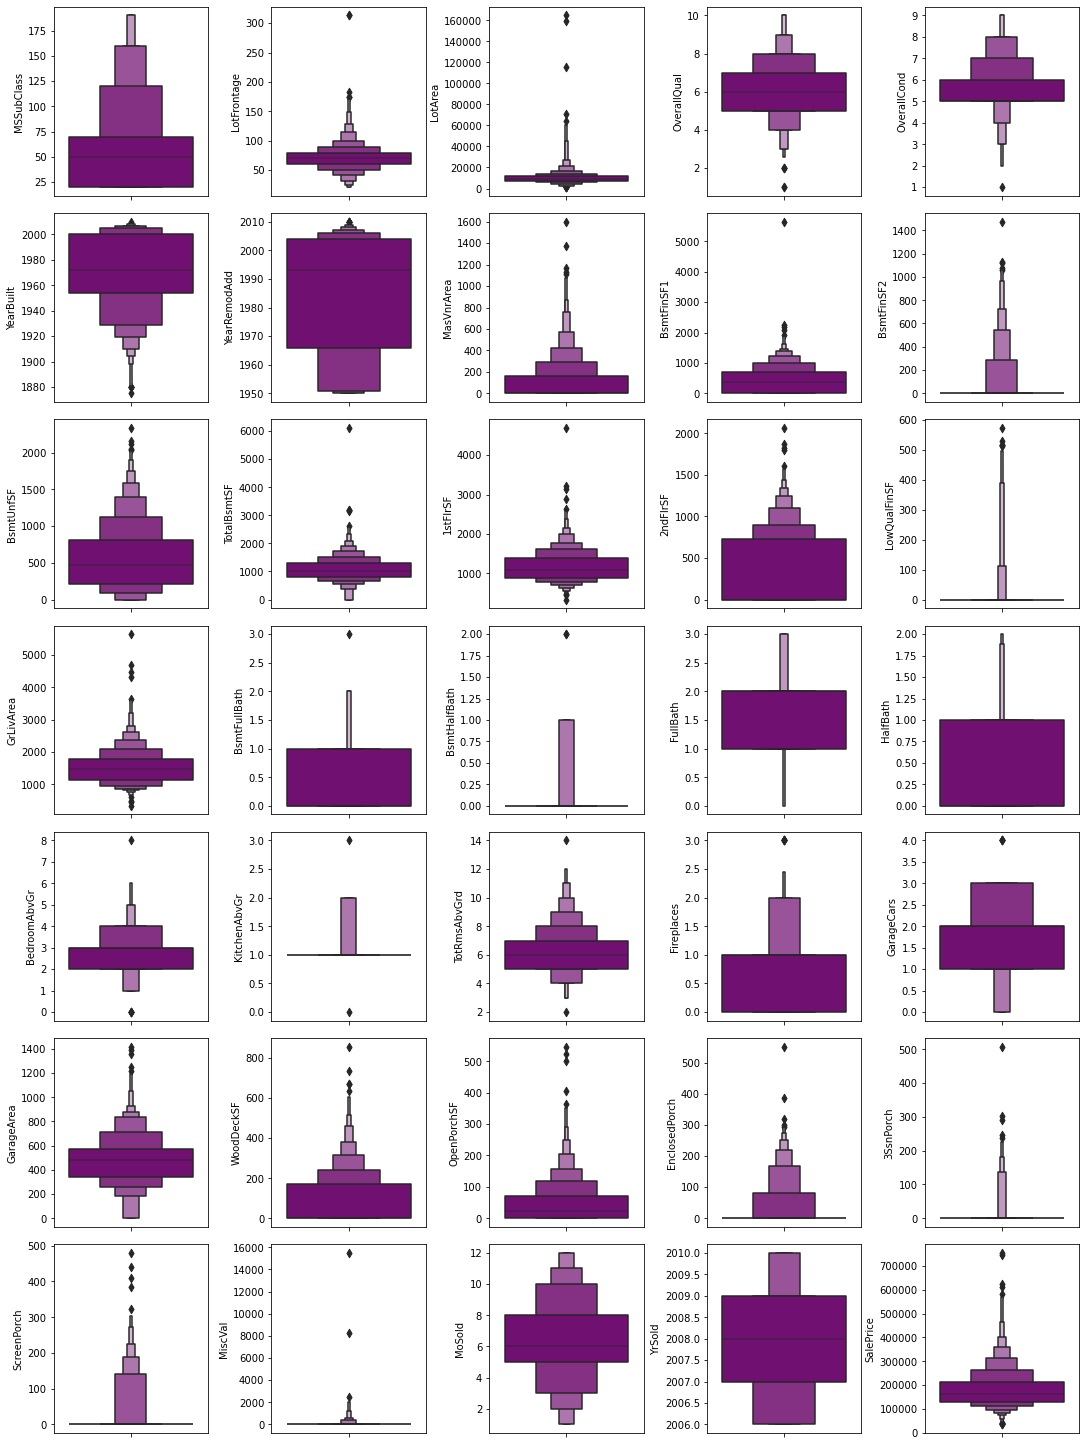

In [44]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=5, nrows=7, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in df[numeric_datatype].items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

#the below result shows that more than 50% of the data having a Outliers so decided continue without removing it.

In [45]:
df.skew()

#With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

MSSubClass             1.422019
LotFrontage            2.710383
LotArea               10.659285
OverallQual            0.175082
OverallCond            0.580714
YearBuilt             -0.579204
YearRemodAdd          -0.495864
MasVnrArea             2.835718
BsmtFinSF1             1.871606
BsmtFinSF2             4.365829
BsmtUnfSF              0.909057
TotalBsmtSF            1.744591
1stFlrSF               1.513707
2ndFlrSF               0.823479
LowQualFinSF           8.666142
GrLivArea              1.449952
BsmtFullBath           0.627106
BsmtHalfBath           4.264403
FullBath               0.057809
HalfBath               0.656492
BedroomAbvGr           0.243855
KitchenAbvGr           4.365259
TotRmsAbvGrd           0.644657
Fireplaces             0.671966
GarageYrBlt           -3.898694
GarageCars            -0.358556
GarageArea             0.189665
WoodDeckSF             1.504929
OpenPorchSF            2.410840
EnclosedPorch          3.043610
3SsnPorch              9.770611
ScreenPo

# Correlation Bar Plot comparing features with our label

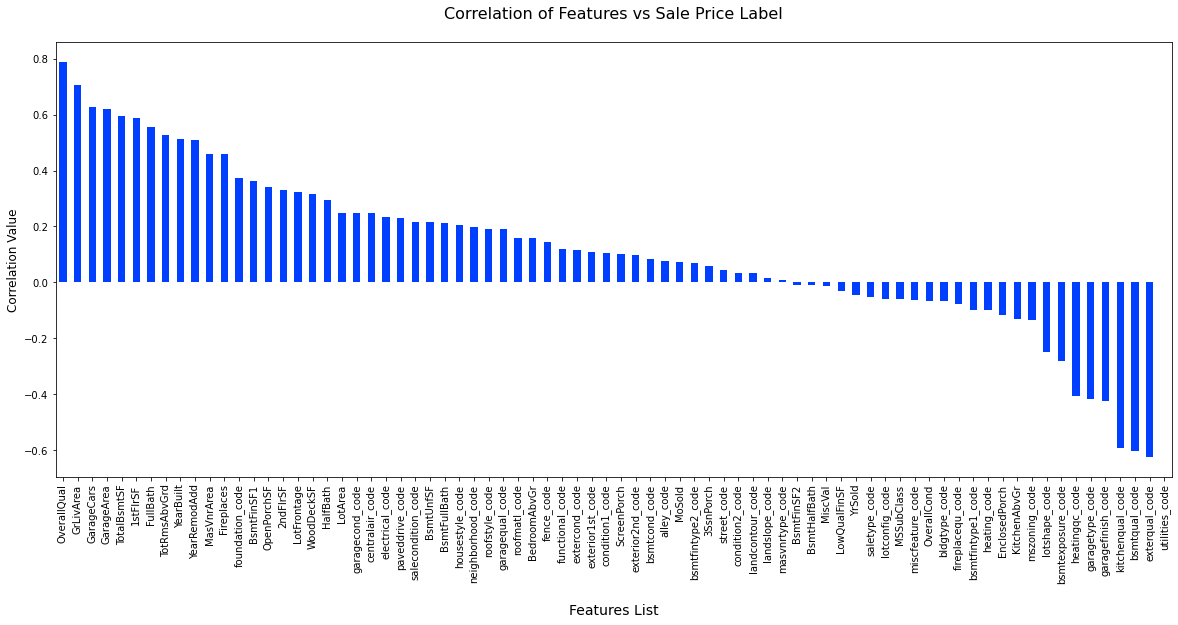

In [49]:
df_corr = df.corr()
plt.figure(figsize=(20,8))
df_corr['SalePrice'].sort_values(ascending=False).drop('SalePrice').plot.bar()
plt.title("Correlation of Features vs Sale Price Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [50]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']

# Features Scaling

In [51]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

#Scaling feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    1.508301     0.000000 -0.620616    -0.075169    -0.530217   0.168236   
1   -0.877042     1.070631  0.600903     1.364138     0.359572  -0.030885   
2    0.077095     0.936867 -0.063075     0.644484    -0.530217   0.831975   
3   -0.877042     1.516514  0.141424    -0.075169     0.359572   0.201423   
4   -0.877042     0.000000  0.686902    -0.075169     1.249361   0.201423   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -0.421565   -0.558343   -0.702161   -0.285392   0.864410     0.038239   
1     -0.710356   -0.558343   -0.202665    4.749787   1.053642     2.614679   
2      0.589202   -0.558343    0.902279   -0.285392  -0.700654     0.126458   
3     -0.373434    2.076985    0.562795   -0.285392   1.267363     1.770946   
4      0.733598    0.133430    1.732609   -0.285392  -0.475801     1.223537   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.541850 -0.793674     -0.125418  -1.074363     -0.816112     -0.235213   
1  2.678144 -0.793674     -0.125418   1.310934      1.101833     -0.235213   
2 -0.109619  1.222216     -0.125418   0.924437      1.101833     -0.235213   
3  1.724166 -0.793674     -0.125418   0.604250     -0.816112     -0.235213   
4  1.105232 -0.793674     -0.125418   0.145757     -0.816112      3.991376   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.793082 -0.770138     -1.082679     -0.209883     -0.965583    0.588509   
1  0.793082 -0.770138      1.365664     -0.209883      0.911999    0.588509   
2  0.793082  1.211186      0.141492     -0.209883      0.911999    0.588509   
3  0.793082 -0.770138      0.141492     -0.209883      0.286138    0.588509   
4  0.793082 -0.770138      0.141492     -0.209883      0.911999    0.588509   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     0.237777     0.29985   -0.171944   -0.762907     2.387850   
1     0.222250     0.29985    0.672371   -0.120585     2.417992   
2     0.282138     0.29985   -0.101973    0.664476     1.257525   
3     0.237777     0.29985    0.322517   -0.762907     1.136957   
4     0.237777     0.29985    0.243217    1.140270    -0.701705   

   EnclosedPorch  3SsnPorch  ScreenPorch   MiscVal    MoSold    YrSold  \
0      -0.364375  -0.125172    -0.273377 -0.087131 -1.617822 -0.605487   
1      -0.364375  -0.125172     3.795117 -0.087131  1.361470 -0.605487   
2      -0.364375  -0.125172    -0.273377 -0.087131 -0.128176 -0.605487   
3      -0.364375  -0.125172    -0.273377 -0.087131 -1.990233  1.651563   
4      -0.364375  -0.125172    -0.273377 -0.087131 -0.128176  0.899213   

   mszoning_code  street_code  alley_code  lotshape_code  landcontour_code  \
0      -0.021646     0.058621    0.016675      -1.373107          0.318473   
1      -0.021646     0.058621    0.016675      -1.373107          0.318473   
2      -0.021646     0.058621    0.016675      -1.373107          0.318473   
3      -0.021646     0.058621    0.016675      -1.373107          0.318473   
4      -0.021646     0.058621    0.016675      -1.373107          0.318473   

   utilities_code  lotconfig_code  landslope_code  neighborhood_code  \
0             0.0        0.606420       -0.226126           0.142224   
1             0.0        0.606420        3.295414          -0.024227   
2             0.0       -1.220661       -0.226126           0.475125   
3             0.0        0.606420       -0.226126           0.308675   
4             0.0       -0.611634       -0.226126           0.308675   

   condition1_code  condition2_code  bldgtype_code  housestyle_code  \
0        -0.037339        -0.023979       2.985495        -0.549930   
1        -0.037339        -0.023979      -0.403288        -0.549930   
2        -0.037339        -0.023979      -0.403288         1.030838   
3        -0.037339        -0.023979      -0.403288        -0.549930   
4        -0.0373

# Finding the best random state for building Regression Models

In [52]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

#Here we see that out of the random state value ranging from 1 to 1000 the best random state number found is 340 and we will use this in our ML models.

Best R2 score is 0.8895133158521755 on Random State 340


# Feature importance dataframe

In [53]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                      
OverallQual              0.567
GrLivArea                0.097
1stFlrSF                 0.031
TotalBsmtSF              0.028
BsmtFinSF1               0.028
MasVnrArea               0.024
GarageArea               0.024
2ndFlrSF                 0.019
bsmtqual_code            0.018
LotArea                  0.013
FullBath                 0.011
GarageCars               0.010
YearBuilt                0.009
neighborhood_code        0.009
GarageYrBlt              0.008
garagetype_code          0.008
LotFrontage              0.008
YearRemodAdd             0.007
MoSold                   0.007
exterqual_code           0.006
OverallCond              0.006
OpenPorchSF              0.005
BsmtUnfSF                0.005
kitchenqual_code         0.004
centralair_code          0.004
TotRmsAbvGrd             0.003
WoodDeckSF               0.003
bsmtfintype1_code        0.002
YrSold                   0.002
exterior1st_code         0.002
fireplacequ_code         0.002
landcontour_code         0.002
garagefinish_code        0.002
MSSubClass               0.002
lotshape_code            0.002
BedroomAbvGr             0.002
Fireplaces               0.002
mszoning_code            0.001
EnclosedPorch            0.001
saletype_code            0.001
garagecond_code          0.001
BsmtFullBath             0.001
HalfBath                 0.001
heatingqc_code           0.001
bsmtexposure_code        0.001
extercond_code           0.001
masvnrtype_code          0.001
exterior2nd_code         0.001
salecondition_code       0.001
housestyle_code          0.001
ScreenPorch              0.001
lotconfig_code           0.001
roofstyle_code           0.001
roofmatl_code            0.000
BsmtHalfBath             0.000
alley_code               0.000
miscfeature_code         0.000
fence_code               0.000
paveddrive_code          0.000
MiscVal                  0.000
garagequal_code          0.000
BsmtFinSF2               0.000
LowQualFinSF             0.000
functional_code          0.000
utilities_code           0.000
electrical_code          0.000
heating_code             0.000
bsmtfintype2_code        0.000
landslope_code           0.000
3SsnPorch                0.000
bsmtcond_code            0.000
street_code              0.000
foundation_code          0.000
condition1_code          0.000
condition2_code          0.000
bldgtype_code            0.000
KitchenAbvGr             0.000

# Machine Learning Model for Regression with Evaluation Metrics

In [54]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=340)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [55]:
#built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.


In [56]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 24450.992145552078
R2 Score is: 88.95133158521756
Cross Validation Score: 75.37421522245968
R2 Score - Cross Validation Score is 13.577116362757877


In [57]:
# Ridge Regularization

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 24384.088996243536
R2 Score is: 89.01171190976207
Cross Validation Score: 75.66075392124897
R2 Score - Cross Validation Score is 13.350957988513102


In [58]:
# Lasso Regularization

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 24475.030001884254
R2 Score is: 88.92959693724507
Cross Validation Score: 75.37415144768174
R2 Score - Cross Validation Score is 13.555445489563326


In [59]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 76633.41213348275
R2 Score is: -8.530872394841428
Cross Validation Score: -6.2196135410372255
R2 Score - Cross Validation Score is -2.311258853804202


In [60]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 62543.048104857946
R2 Score is: 27.710527744040427
Cross Validation Score: 47.92460187087371
R2 Score - Cross Validation Score is -20.21407412683328


In [61]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 41506.22877132564
R2 Score is: 68.16216566149387
Cross Validation Score: 64.04181550034377
R2 Score - Cross Validation Score is 4.1203501611501


In [62]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 40231.139456865574
R2 Score is: 70.08826296941496
Cross Validation Score: 63.461941681712105
R2 Score - Cross Validation Score is 6.626321287702851


In [63]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 34595.1729989324
R2 Score is: 77.88189165329096
Cross Validation Score: 79.78739827409618
R2 Score - Cross Validation Score is -1.9055066208052125


In [64]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 33262.51891928025
R2 Score is: 79.55311111528376
Cross Validation Score: 78.90999304267208
R2 Score - Cross Validation Score is 0.6431180726116708


In [65]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 24077.911164495334
R2 Score is: 89.28592743883011
Cross Validation Score: 84.67181508628198
R2 Score - Cross Validation Score is 4.614112352548133


# Hyper parameter tuning

In [66]:
# Choosing Extra Trees Regressor

fmod_param = {'n_estimators' : [100, 200, 300],
              'criterion' : ['squared_error', 'mse', 'absolute_error', 'mae'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 111, 340]
             }

#After comparing all the regression models I have selected Extra Trees Regressor as my best model and have listed down it's parameters above referring the sklearn webpage.

In [67]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 111, 340]})

In [68]:
GSCV.best_params_

{'criterion': 'mse', 'n_estimators': 100, 'n_jobs': -2, 'random_state': 42}

In [69]:
Final_Model = ExtraTreesRegressor(criterion='mse', n_estimators=100, n_jobs=-2, random_state=42)
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 82.2385387640393


In [70]:
filename = "HousingSalePrice.pkl"
joblib.dump(Final_Model, filename)

['HousingSalePrice.pkl']

# Importing and Pre processing the Testing Dataset to predict the SalePrice column for Surprise Housing Project

In [71]:
test_df = pd.read_csv("test.csv")
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [72]:
print("We have {} Rows and {} Columns in our dataframe".format(test_df.shape[0], test_df.shape[1]))

We have 292 Rows and 80 Columns in our dataframe


In [73]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [77]:
test_df['Alley'].fillna('No alley access', inplace=True) 
test_df['MiscFeature'].fillna('None', inplace=True) 
test_df['Fence'].fillna('No Fence', inplace=True)
test_df['GarageCond'].fillna('No Garage', inplace=True)
test_df['GarageQual'].fillna('No Garage', inplace=True)
test_df['GarageFinish'].fillna('No Garage', inplace=True)
test_df['GarageYrBlt'].fillna('No Garage', inplace=True)
test_df['GarageType'].fillna('No Garage', inplace=True)
test_df['FireplaceQu'].fillna('No Fireplace', inplace=True)
test_df['BsmtQual'].fillna('No Basement', inplace=True)
test_df['BsmtCond'].fillna('No Basement', inplace=True)
test_df['BsmtExposure'].fillna('No Basement', inplace=True)
test_df['BsmtFinType1'].fillna('No Basement', inplace=True)
test_df['BsmtFinType2'].fillna('No Basement', inplace=True)


mode = ["MasVnrType", "MasVnrArea", "Electrical"]
mean = ["LotFrontage"]

for i in mode:
    test_df[i] = test_df[i].fillna(test_df[i].mode()[0])
    
for j in mean:
    test_df[j] = test_df[j].fillna(test_df[j].mean())
    
#replaced the above columns NA cells as per the Data Description file.

#BsmtQual - No Basement
#BsmtCond - No Basement
#BsmtExposure - No Basement
#BsmtFinType1 - No Basement
#BsmtFinType2 - No Basement
#GarageType - No Garage
#GarageYrBlt - No Garage
#GarageFinish - No Garage
#GarageQual - No Garage
#GarageCond - No Garage
#FireplaceQu - No Fireplace
#Fence - No Fence
#Alley - No alley access
#MiscFeature - None
#PoolQC - Dropped the column since none of the property has pool facility or not provided since it is completely blank unable to find the necessary details
#ID - All 292 rows have unique values which is also not useful.
#PoolArea - Dropped the column since there is no Pool in the properties this become useless for us to use in ML.

#since there was an error message came removed the drop details to complete the project.

#replacing the object data type columns in Mode Value
#replacing the numberical data type columns in Mean Value.

In [78]:
test_df.dropna(inplace=True)

In [84]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
test_df["mszoning_code"] = ord_enc.fit_transform(test_df[["MSZoning"]])
test_df[["MSZoning", "mszoning_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["street_code"] = ord_enc.fit_transform(test_df[["Street"]])
test_df[["Street", "street_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["alley_code"] = ord_enc.fit_transform(test_df[["Alley"]])
test_df[["Alley", "alley_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["lotshape_code"] = ord_enc.fit_transform(test_df[["LotShape"]])
test_df[["LotShape", "lotshape_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["landcontour_code"] = ord_enc.fit_transform(test_df[["LandContour"]])
test_df[["LandContour", "landcontour_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["utilities_code"] = ord_enc.fit_transform(test_df[["Utilities"]])
test_df[["Utilities", "utilities_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["lotconfig_code"] = ord_enc.fit_transform(test_df[["LotConfig"]])
test_df[["LotConfig", "lotconfig_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["landslope_code"] = ord_enc.fit_transform(test_df[["LandSlope"]])
test_df[["LandSlope", "landslope_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["neighborhood_code"] = ord_enc.fit_transform(test_df[["Neighborhood"]])
test_df[["Neighborhood", "neighborhood_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["condition1_code"] = ord_enc.fit_transform(test_df[["Condition1"]])
test_df[["Condition1", "condition1_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["condition2_code"] = ord_enc.fit_transform(test_df[["Condition2"]])
test_df[["Condition2", "condition2_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["bldgtype_code"] = ord_enc.fit_transform(test_df[["BldgType"]])
test_df[["BldgType", "bldgtype_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["housestyle_code"] = ord_enc.fit_transform(test_df[["HouseStyle"]])
test_df[["HouseStyle", "housestyle_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["roofstyle_code"] = ord_enc.fit_transform(test_df[["RoofStyle"]])
test_df[["RoofStyle", "roofstyle_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["roofmatl_code"] = ord_enc.fit_transform(test_df[["RoofMatl"]])
test_df[["RoofMatl", "roofmatl_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["exterior1st_code"] = ord_enc.fit_transform(test_df[["Exterior1st"]])
test_df[["Exterior1st", "exterior1st_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["exterior2nd_code"] = ord_enc.fit_transform(test_df[["Exterior2nd"]])
test_df[["Exterior2nd", "exterior2nd_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["masvnrtype_code"] = ord_enc.fit_transform(test_df[["MasVnrType"]])
test_df[["MasVnrType", "masvnrtype_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["exterqual_code"] = ord_enc.fit_transform(test_df[["ExterQual"]])
test_df[["ExterQual", "exterqual_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["extercond_code"] = ord_enc.fit_transform(test_df[["ExterCond"]])
test_df[["ExterCond", "extercond_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["foundation_code"] = ord_enc.fit_transform(test_df[["Foundation"]])
test_df[["Foundation", "foundation_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["bsmtqual_code"] = ord_enc.fit_transform(test_df[["BsmtQual"]])
test_df[["BsmtQual", "bsmtqual_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["bsmtcond_code"] = ord_enc.fit_transform(test_df[["BsmtCond"]])
test_df[["BsmtCond", "bsmtcond_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["bsmtexposure_code"] = ord_enc.fit_transform(test_df[["BsmtExposure"]])
test_df[["BsmtExposure", "bsmtexposure_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["bsmtfintype1_code"] = ord_enc.fit_transform(test_df[["BsmtFinType1"]])
test_df[["BsmtFinType1", "bsmtfintype1_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["bsmtfintype2_code"] = ord_enc.fit_transform(test_df[["BsmtFinType2"]])
test_df[["BsmtFinType2", "bsmtfintype2_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["heating_code"] = ord_enc.fit_transform(test_df[["Heating"]])
test_df[["Heating", "heating_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["heatingqc_code"] = ord_enc.fit_transform(test_df[["HeatingQC"]])
test_df[["HeatingQC", "heatingqc_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["centralair_code"] = ord_enc.fit_transform(test_df[["CentralAir"]])
test_df[["CentralAir", "centralair_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["electrical_code"] = ord_enc.fit_transform(test_df[["Electrical"]])
test_df[["Electrical", "electrical_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["kitchenqual_code"] = ord_enc.fit_transform(test_df[["KitchenQual"]])
test_df[["KitchenQual", "kitchenqual_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["functional_code"] = ord_enc.fit_transform(test_df[["Functional"]])
test_df[["Functional", "functional_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["fireplacequ_code"] = ord_enc.fit_transform(test_df[["FireplaceQu"]])
test_df[["FireplaceQu", "fireplacequ_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["garagetype_code"] = ord_enc.fit_transform(test_df[["GarageType"]])
test_df[["GarageType", "garagetype_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["garagefinish_code"] = ord_enc.fit_transform(test_df[["GarageFinish"]])
test_df[["GarageFinish", "garagefinish_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["garagequal_code"] = ord_enc.fit_transform(test_df[["GarageQual"]])
test_df[["GarageQual", "garagequal_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["garagecond_code"] = ord_enc.fit_transform(test_df[["GarageCond"]])
test_df[["GarageCond", "garagecond_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["paveddrive_code"] = ord_enc.fit_transform(test_df[["PavedDrive"]])
test_df[["PavedDrive", "paveddrive_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["fence_code"] = ord_enc.fit_transform(test_df[["Fence"]])
test_df[["Fence", "fence_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["miscfeature_code"] = ord_enc.fit_transform(test_df[["MiscFeature"]])
test_df[["MiscFeature", "miscfeature_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["saletype_code"] = ord_enc.fit_transform(test_df[["SaleType"]])
test_df[["SaleType", "saletype_code"]].head(11)

ord_enc = OrdinalEncoder()
test_df["salecondition_code"] = ord_enc.fit_transform(test_df[["SaleCondition"]])
test_df[["SaleCondition", "salecondition_code"]].head(11)



SaleCondition  salecondition_code
0         Normal                 2.0
1        Abnorml                 0.0
2         Normal                 2.0
3         Normal                 2.0
4         Normal                 2.0
5         Normal                 2.0
6         Normal                 2.0
7        Partial                 3.0
8         Normal                 2.0
9         Normal                 2.0
10        Normal                 2.0

In [86]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 291
Columns: 119 entries, MSSubClass to salecondition_code
dtypes: float64(44), int64(32), object(43)
memory usage: 273.8+ KB


In [88]:
test_df1 = test_df.select_dtypes(exclude=['object'])

In [89]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 291
Data columns (total 76 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          292 non-null    int64  
 1   LotFrontage         292 non-null    float64
 2   LotArea             292 non-null    int64  
 3   OverallQual         292 non-null    int64  
 4   OverallCond         292 non-null    int64  
 5   YearBuilt           292 non-null    int64  
 6   YearRemodAdd        292 non-null    int64  
 7   MasVnrArea          292 non-null    float64
 8   BsmtFinSF1          292 non-null    int64  
 9   BsmtFinSF2          292 non-null    int64  
 10  BsmtUnfSF           292 non-null    int64  
 11  TotalBsmtSF         292 non-null    int64  
 12  1stFlrSF            292 non-null    int64  
 13  2ndFlrSF            292 non-null    int64  
 14  LowQualFinSF        292 non-null    int64  
 15  GrLivArea           292 non-null    int64  
 16  BsmtFull

In [90]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

MSSubClass   LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    1.508301  1.490436e-16 -0.620616    -0.075169    -0.530217   0.168236   
1   -0.877042  1.070631e+00  0.600903     1.364138     0.359572  -0.030885   
2    0.077095  9.368667e-01 -0.063075     0.644484    -0.530217   0.831975   
3   -0.877042  1.516514e+00  0.141424    -0.075169     0.359572   0.201423   
4   -0.877042  1.490436e-16  0.686902    -0.075169     1.249361   0.201423   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -0.421565   -0.558343   -0.702161   -0.285392   0.864410     0.038239   
1     -0.710356   -0.558343   -0.202665    4.749787   1.053642     2.614679   
2      0.589202   -0.558343    0.902279   -0.285392  -0.700654     0.126458   
3     -0.373434    2.076985    0.562795   -0.285392   1.267363     1.770946   
4      0.733598    0.133430    1.732609   -0.285392  -0.475801     1.223537   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.541850 -0.793674     -0.125418  -1.074363     -0.816112     -0.235213   
1  2.678144 -0.793674     -0.125418   1.310934      1.101833     -0.235213   
2 -0.109619  1.222216     -0.125418   0.924437      1.101833     -0.235213   
3  1.724166 -0.793674     -0.125418   0.604250     -0.816112     -0.235213   
4  1.105232 -0.793674     -0.125418   0.145757     -0.816112      3.991376   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.793082 -0.770138     -1.082679     -0.209883     -0.965583    0.588509   
1  0.793082 -0.770138      1.365664     -0.209883      0.911999    0.588509   
2  0.793082  1.211186      0.141492     -0.209883      0.911999    0.588509   
3  0.793082 -0.770138      0.141492     -0.209883      0.286138    0.588509   
4  0.793082 -0.770138      0.141492     -0.209883      0.911999    0.588509   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     0.237777     0.29985   -0.171944   -0.762907     2.387850   
1     0.222250     0.29985    0.672371   -0.120585     2.417992   
2     0.282138     0.29985   -0.101973    0.664476     1.257525   
3     0.237777     0.29985    0.322517   -0.762907     1.136957   
4     0.237777     0.29985    0.243217    1.140270    -0.701705   

   EnclosedPorch  3SsnPorch  ScreenPorch   MiscVal    MoSold    YrSold  \
0      -0.364375  -0.125172    -0.273377 -0.087131 -1.617822 -0.605487   
1      -0.364375  -0.125172     3.795117 -0.087131  1.361470 -0.605487   
2      -0.364375  -0.125172    -0.273377 -0.087131 -0.128176 -0.605487   
3      -0.364375  -0.125172    -0.273377 -0.087131 -1.990233  1.651563   
4      -0.364375  -0.125172    -0.273377 -0.087131 -0.128176  0.899213   

   mszoning_code  street_code  alley_code  lotshape_code  landcontour_code  \
0      -0.021646     0.058621    0.016675      -1.373107          0.318473   
1      -0.021646     0.058621    0.016675      -1.373107          0.318473   
2      -0.021646     0.058621    0.016675      -1.373107          0.318473   
3      -0.021646     0.058621    0.016675      -1.373107          0.318473   
4      -0.021646     0.058621    0.016675      -1.373107          0.318473   

   utilities_code  lotconfig_code  landslope_code  neighborhood_code  \
0             0.0        0.606420       -0.226126           0.142224   
1             0.0        0.606420        3.295414          -0.024227   
2             0.0       -1.220661       -0.226126           0.475125   
3             0.0        0.606420       -0.226126           0.308675   
4             0.0       -0.611634       -0.226126           0.308675   

   condition1_code  condition2_code  bldgtype_code  housestyle_code  \
0        -0.037339        -0.023979       2.985495        -0.549930   
1        -0.037339        -0.023979      -0.403288        -0.549930   
2        -0.037339        -0.023979      -0.403288         1.030838   
3        -0.037339        -0.023979      -0.403288        -0.549930   
4        -

In [92]:
 # Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset
Predicted_Sales = Final_Model.predict(X)
predicted_output = pd.DataFrame()
predicted_output['SalePrice']=Predicted_Sales
predicted_output.head(50)

SalePrice
0   144262.82
1   268000.00
2   269790.00
3   190000.00
4   202253.75
5   219210.00
6   159696.89
7   169081.78
8   140000.00
9   118500.00
10  119500.00
11  237000.00
12  201000.00
13  126500.00
14  135500.00
15  165000.00
16  120500.00
17  194500.00
18  148000.00
19  106000.00
20  231500.00
21  133000.00
22  142125.00
23  136500.00
24  146000.00
25  217000.00
26  112000.00
27  394432.00
28  113000.00
29  188700.00
30  319900.00
31  154526.68
32  190000.00
33  128500.00
34  164215.57
35  122000.00
36  168063.80
37  243000.00
38  156000.00
39   79500.00
40  168579.08
41  132000.00
42  149026.33
43  130000.00
44  149900.00
45  124500.00
46  188161.07
47  140784.75
48   39300.00
49  155000.00

In [93]:
final_test_data = pd.concat([test_df1, predicted_output], axis=1)
final_test_data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        20.0    86.000000  14157.0          9.0          5.0     2005.0   
1       120.0    66.425101   5814.0          8.0          5.0     1984.0   
2        20.0    66.425101  11838.0          8.0          5.0     2001.0   
3        70.0    75.000000  12000.0          7.0          7.0     1941.0   
4        60.0    86.000000  14598.0          6.0          5.0     2007.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0        2006.0       200.0      1249.0         0.0      673.0       1922.0   
1        1984.0         0.0      1036.0         0.0      184.0       1220.0   
2        2001.0         0.0         0.0         0.0     1753.0       1753.0   
3        1950.0         0.0       275.0         0.0      429.0        704.0   
4        2007.0        74.0         0.0         0.0      894.0        894.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0    1922.0       0.0           0.0     1922.0           1.0           0.0   
1    1360.0       0.0           0.0     1360.0           1.0           0.0   
2    1788.0       0.0           0.0     1788.0           0.0           0.0   
3     860.0     704.0           0.0     1564.0           0.0           0.0   
4     894.0    1039.0           0.0     1933.0           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0       2.0       0.0           3.0           1.0           8.0         1.0   
1       1.0       0.0           1.0           1.0           4.0         1.0   
2       2.0       0.0           3.0           1.0           7.0         1.0   
3       1.0       1.0           3.0           1.0           7.0         1.0   
4       2.0       1.0           4.0           1.0           9.0         1.0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         3.0       676.0       178.0         51.0            0.0        0.0   
1         2.0       565.0        63.0          0.0            0.0        0.0   
2         2.0       522.0       202.0        151.0            0.0        0.0   
3         1.0       234.0         0.0          0.0            0.0        0.0   
4         3.0       668.0       100.0         18.0            0.0        0.0   

   ScreenPorch  MiscVal  MoSold  YrSold  mszoning_code  street_code  \
0          0.0      0.0     7.0  2007.0            2.0          1.0   
1          0.0      0.0     8.0  2009.0            2.0          1.0   
2          0.0      0.0     6.0  2009.0            2.0          1.0   
3          0.0      0.0     7.0  2009.0            2.0          1.0   
4          0.0      0.0     1.0  2008.0            2.0          1.0   

   alley_code  lotshape_code  landcontour_code  utilities_code  \
0         1.0            0.0               1.0             0.0   
1         1.0            0.0               3.0             0.0   
2         1.0            3.0               3.0             0.0   
3         1.0            3.0               0.0             0.0   
4         1.0            0.0               3.0             0.0   

   lotconfig_code  landslope_code  neighborhood_code  condition1_code  \
0             0.0             0.0               21.0              2.0   
1             1.0             0.0               21.0              2.0   
2             4.0             0.0                4.0              2.0   
3             4.0             0.0                5.0              2.0   
4             1.0             0.0               20.0              1.0   

   condition2_code  bldgtype_code  housestyle_code  roofstyle_code  \
0              0.0            0.0              2.0             3.0   
1              0.0            4.0              2.0             1.0   
2              0.0            0.0              2.0             3.0   
3              0.0            0.0              5.0             1.0   
4              0.0            0.0

In [94]:
final_test_data.to_csv("Predicted_Sales_Data.csv", index=False)